Features Information:

1. Area (A): The area of a bean zone and the number of pixels within its boundaries.

2. Perimeter (P): Bean circumference is defined as the length of its border.

3. Major axis length (L): The distance between the ends of the longest line that can bedrawn from a bean.

4. Minor axis length (l): The longest line that can be drawn from the bean whilestanding perpendicular to the main axis.

5. Aspect ratio (K): Defines the relationship between L and l.

6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12. Compactness (CO): Measures the roundness of an object: Ed/L

13. ShapeFactor1 (SF1)

14. ShapeFactor2 (SF2)

15. ShapeFactor3 (SF3)

16. ShapeFactor4 (SF4)

17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv( 'E:\Pranav Yadav\Desktop\data.CSV')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

### EDA ( Exploratory Data Analysis )

In [4]:
df.shape

(13611, 17)

Rows: 13611

Columns : 17

In [5]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [6]:
# Check for correct data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

All features has correct data type

In [7]:
# Check for Null Values
df.isna().sum()/len(df)*100

Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
Class              0.0
dtype: float64

In [8]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

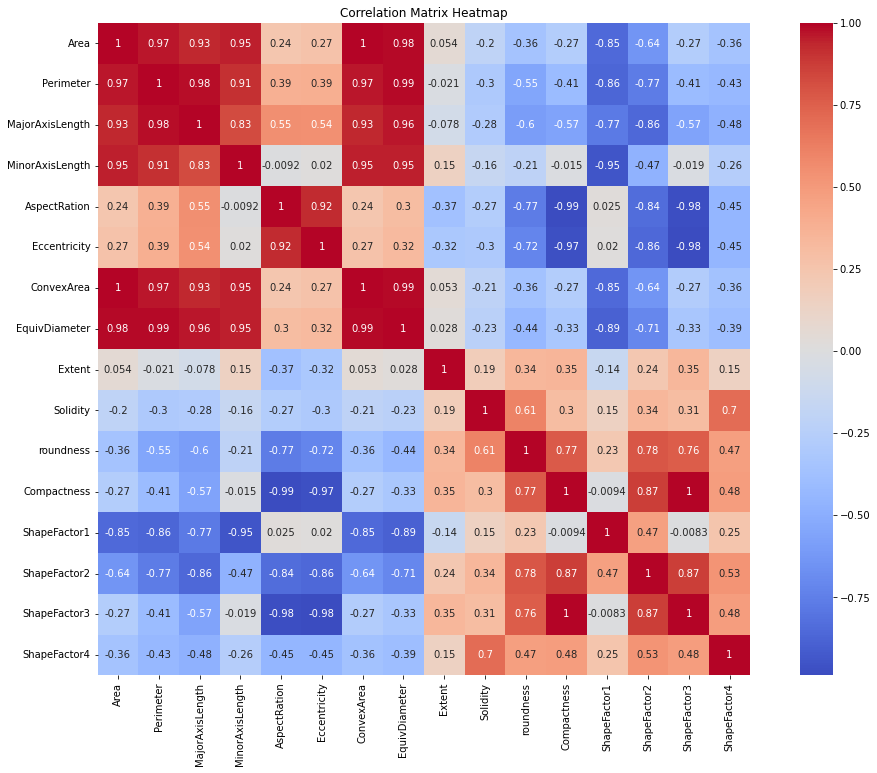

In [9]:
#checking correlation between variables

corr_matrix = df.corr()
plt.figure(figsize=(18,12)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Many columns are high correlated

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

1) Columns: Eccentricity and ShapeFactor3 are highly correlated with a correlation of -0.9810576972682232
----------------------------------------------------------------------------------------------------
2) Columns: Area and MinorAxisLength are highly correlated with a correlation of 0.9516015990172924
----------------------------------------------------------------------------------------------------
3) Columns: AspectRation and ShapeFactor3 are highly correlated with a correlation of -0.9785922752829953
----------------------------------------------------------------------------------------------------
4) Columns: EquivDiameter and Perimeter are highly correlated with a correlation of 0.9913804295989507
----------------------------------------------------------------------------------------------------
5) Columns: EquivDiameter and MajorAxisLength are highly correlated with a correlation of 0.9617333598415764
------------------------------------------------------------------------

These are the high correlated columns

In [11]:
# checking for duplicate rows

df.duplicated().sum()

68

Duplicate rows

68

In [12]:
# dropping duplicate rows

df.drop_duplicates(inplace=True)

In [13]:
#recheck for duplicates

df.duplicated().sum()

0

All duplicates succesfully removed.

Approx 0.49% of data is lost due to remove duplicates.

In [14]:
#Check the unique values of all variables to identify any suspicious values or typo's

for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    for value in unique_values:
        print(value)
    print()

Column: Area
Unique Values:
28395
28734
29380
30008
30140
30279
30477
30519
30685
30834
30917
31091
31107
31158
31178
31202
31203
31272
31335
31374
31530
31573
31637
31675
31682
31703
31748
31768
31811
31821
31823
31837
31915
31972
31992
31994
32015
32026
32038
32044
32057
32066
32109
32114
32167
32213
32218
32233
32251
32258
32262
32279
32323
32338
32355
32368
32376
32433
32465
32514
32518
32525
32578
32581
32615
32622
32698
32705
32713
32729
32774
32775
32795
32796
32799
32829
32836
32849
32870
32885
32920
32925
32934
32947
32951
32988
33006
33010
33013
33019
33051
33058
33062
33078
33089
33090
33143
33159
33168
33171
33194
33236
33248
33251
33276
33316
33319
33325
33330
33333
33338
33344
33382
33399
33421
33423
33427
33429
33431
33433
33446
33447
33459
33468
33498
33534
33538
33539
33547
33560
33576
33583
33584
33607
33620
33623
33631
33639
33717
33731
33736
33794
33809
33824
33838
33845
33849
33858
33860
33864
33866
33876
33930
33946
33961
33969
33972
33993
33996
34004
34027
34036


67856
67906
67959
67960
67986
67997
68015
68024
68035
68050
68056
68062
68087
68109
68118
68120
68131
68133
68136
68138
68153
68164
68167
68173
68187
68210
68218
68247
68269
68272
68282
68309
68384
68389
68451
68456
68460
68470
68478
68488
68500
68513
68551
68570
68572
68605
68616
68619
68638
68648
68676
68725
68732
68764
68770
68774
68804
68823
68838
68843
68852
68859
68862
68882
68888
68894
68901
68924
68936
68942
68957
68971
68978
68988
68999
69002
69013
69053
69112
69123
69221
69229
69232
69236
69303
69339
69354
69379
69386
69392
69417
69448
69473
69483
69509
69522
69525
69561
69570
69575
69580
69584
69589
69598
69651
69673
69714
69727
69728
69741
69773
69785
69806
69816
69824
69852
69856
69886
69892
69900
69923
69949
69963
69985
70002
70019
70023
70027
70040
70042
70046
70056
70066
70069
70082
70114
70135
70136
70213
70236
70249
70264
70292
70314
70341
70344
70374
70380
70413
70466
70477
70483
70518
70521
70522
70573
70574
70620
70648
70651
70657
70664
70675
70682
70692
70718
7074

81837
81862
81863
81887
81899
82011
82038
82040
82058
82073
82086
82095
82115
82124
82134
82174
82203
82219
82272
82389
82399
82415
82442
82455
82487
82497
82533
82553
82583
82602
82619
82638
82640
82691
82731
82734
82745
82762
82769
82787
82830
82831
82842
82843
82861
82870
82879
82892
82896
82950
82961
83001
83018
83039
83051
83064
83074
83091
83097
83108
83173
83266
83287
83296
83343
83431
83432
83444
83448
83461
83469
83522
83546
83551
83575
83577
83581
83589
83592
83600
83641
83706
83743
83749
83773
83787
83810
83874
83936
83969
84080
84099
84146
84156
84160
84166
84226
84265
84277
84307
84331
84341
84365
84382
84442
84459
84471
84511
84516
84527
84600
84609
84614
84629
84641
84648
84697
84699
84718
84766
84791
84870
84917
84919
84955
84964
84973
84995
85044
85119
85127
85130
85209
85226
85244
85311
85329
85330
85369
85382
85446
85453
85465
85592
85613
85618
85631
85666
85680
85681
85702
85716
85743
85767
85801
85822
85861
85998
86045
86069
86177
86232
86264
86321
86333
86338
8637

41163
41164
41175
41187
41191
41195
41196
41198
41201
41204
41225
41236
41241
41248
41249
41280
41287
41292
41293
41307
41308
41315
41318
41320
41325
41344
41362
41372
41410
41417
41418
41422
41428
41431
41445
41448
41449
41463
41468
41477
41480
41484
41489
41491
41492
41514
41517
41532
41551
41556
41560
41565
41570
41579
41581
41587
41602
41604
41606
41608
41609
41613
41627
41635
41637
41643
41674
41680
41683
41698
41702
41704
41706
41708
41711
41713
41714
41724
41727
41736
41739
41741
41749
41759
41776
41782
41784
41791
41818
41821
41822
41824
41829
41831
41838
41845
41847
41848
41851
41854
41861
41867
41885
41889
41900
41908
41912
41928
41936
41943
41944
41945
41955
41957
41967
41971
41973
41976
41982
41993
41995
42001
42021
42026
42037
42039
42040
42043
42044
42049
42058
42060
42061
42062
42065
42070
42079
42080
42088
42090
42095
42096
42106
42111
42116
42119
42135
42136
42140
42145
42146
42164
42181
42184
42188
42190
42196
42205
42206
42212
42215
42217
42234
42236
42238
42242
4224

50429
50431
50436
50440
50447
50453
50455
50456
50467
50477
50490
50499
50527
50537
50544
50545
50557
50570
50582
50587
50599
50656
50661
50675
50678
50685
50691
50704
50713
50721
50724
50725
50728
50788
50794
50811
50819
50828
50834
50839
50879
50914
50919
50923
50924
50946
50958
50961
50976
50986
51035
51042
51052
51074
51078
51091
51097
51118
51126
51131
51141
51146
51150
51161
51167
51172
51191
51195
51234
51259
51260
51277
51284
51285
51288
51290
51308
51321
51338
51381
51382
51401
51421
51437
51444
51456
51460
51494
51527
51547
51557
51560
51561
51566
51567
51579
51593
51609
51662
51680
51698
51714
51716
51718
51728
51761
51792
51798
51802
51806
51818
51836
51877
51881
51905
51935
51945
52034
52042
52047
52091
52093
52105
52113
52149
52156
52157
52158
52165
52183
52210
52233
52298
52303
52334
52369
52377
52384
52385
52426
52427
52430
52464
52467
52486
52492
52516
52533
52534
52562
52566
52637
52640
52652
52660
52663
52701
52710
52745
52774
52868
52893
52926
52950
53010
53184
5319

33889
33890
33893
33896
33903
33911
33912
33913
33914
33915
33924
33935
33938
33940
33950
33952
33956
33958
33978
33982
33988
33999
34001
34003
34006
34010
34014
34033
34044
34045
34048
34052
34054
34078
34079
34088
34089
34102
34103
34106
34114
34123
34124
34125
34129
34159
34161
34173
34174
34192
34197
34236
34241
34243
34244
34245
34248
34250
34258
34260
34266
34270
34278
34282
34283
34286
34288
34290
34304
34305
34306
34315
34322
34326
34343
34344
34359
34361
34366
34370
34374
34375
34385
34399
34402
34404
34406
34408
34413
34432
34437
34440
34444
34445
34446
34460
34465
34468
34470
34477
34479
34486
34488
34494
34495
34501
34506
34513
34514
34516
34518
34531
34550
34561
34563
34566
34568
34570
34571
34572
34584
34585
34588
34589
34590
34591
34606
34613
34618
34625
34627
34644
34649
34650
34653
34655
34664
34673
34681
34685
34690
34691
34697
34715
34723
34727
34728
34737
34738
34740
34741
34742
34749
34768
34776
34778
34790
34796
34807
34815
34817
34820
34821
34823
34827
34831
3483

704.92
710.41
704.918
717.612
762.943
700.346
715.089
705.654
707.153
701.909
723.21
707.456
712.28
719.145
721.729
713.378
732.35
706.192
703.597
706.381
703.614
719.457
701.769
705.63
710.146
713.032
715.604
709.411
709.963
715.843
701.048
709.54
703.058
709.687
705.456
710.319
704.621
706.425
716.131
709.287
725.536
708.533
709.442
704.69
710.914
702.785
718.19
718.737
719.605
705.936
705.689
715.527
720.955
706.076
784.252
709.443
703.703
704.969
718.102
721.068
709.22
711.412
706.251
705.779
710.385
714.965
734.036
708.856
711.559
707.978
728.181
797.002
714.189
711.884
711.112
710.718
716.158
719.241
723.764
717.555
704.398
714.519
714.493
702.846
709.931
741.248
715.718
707.74
728.126
716.173
709.625
715.273
725.607
708.534
716.517
712.975
710.915
712.049
706.341
724.328
715.538
720.599
710.756
718.184
723.426
705.316
713.967
721.004
711.562
741.296
710.617
706.244
713.214
718.151
705.036
714.602
711.163
716.994
711.247
727.147
714.422
704.737
709.626
717.447
716.198
711.692
718

992.583
974.133
950.295
965.276
972.588
971.942
947.305
971.606
1002.996
989.061
977.204
989.399
1002.965
993.13
963.789
1007.347
951.734
1018.346
1066.476
1026.847
996.026
942.187
983.751
998.256
1046.743
997.065
982.208
952.704
961.969
996.486
992.28
1025.614
978.83
1008.734
970.092
967.121
960.073
950.0
989.856
965.899
999.886
1029.742
1006.449
1028.037
979.067
993.072
972.487
951.177
1022.604
977.519
990.734
1023.845
972.463
1016.303
1062.512
1010.611
1034.115
1018.891
1048.882
1027.779
1014.158
1001.82
1027.994
1043.617
1030.26
1007.098
1016.103
995.08
1027.084
992.483
1012.38
971.208
963.416
1005.371
1028.773
960.565
1001.764
971.191
1087.234
977.412
990.631
963.98
984.886
1038.268
997.796
981.442
987.745
979.195
990.697
1004.419
974.54
998.511
1082.767
1001.027
974.289
989.333
989.617
1004.942
1016.789
1039.574
1036.017
1000.066
1013.236
1067.702
1062.545
1003.301
954.219
954.98
1032.092
1018.798
1000.168
984.123
1059.216
1010.288
959.372
1040.559
1087.705
1011.127
1008.429
974.

1667.608
1680.348
1729.088
1678.819
1682.466
1693.359
1638.311
1695.206
1672.373
1671.831
1648.761
1691.955
1716.411
1692.04
1685.806
1747.118
1668.132
1687.198
1702.646
1687.798
1672.222
1725.184
1689.617
1686.769
1739.161
1716.787
1747.665
1707.904
1690.464
1749.634
1773.379
1716.101
1706.597
1688.8
1780.967
1671.7
1713.493
1685.383
1715.349
1709.543
1715.46
1734.279
1732.071
1716.579
1735.247
1719.307
1685.938
1728.486
1722.932
1738.084
1754.602
1700.494
1780.349
1706.37
1739.277
1737.704
1746.64
1779.422
1734.416
1735.169
1795.101
1753.619
1752.359
1755.004
1726.086
1770.466
1752.441
1739.133
1748.332
1776.585
1769.746
1753.363
1849.699
1785.693
1763.646
1765.021
1836.047
1772.436
1767.457
1811.572
1795.577
1810.955
1845.855
1792.381
1812.571
1847.94
1817.278
1827.554
1770.662
1802.309
1796.132
1839.808
1812.548
1815.073
1787.859
1849.371
1869.885
1921.685
1895.94
1884.557
1919.868
1985.37
793.417
789.77
825.148
822.642
891.505
865.763
855.523
882.474
893.456
893.989
905.416
867.59

845.054
814.595
773.792
839.181
844.203
833.354
824.223
834.163
805.062
836.878
808.658
822.517
823.817
812.823
841.284
809.203
819.804
826.19
832.579
845.277
843.947
825.922
848.676
828.051
822.871
856.043
850.137
846.716
829.615
859.481
850.425
808.725
833.623
850.2
847.544
832.12
847.583
810.865
839.911
861.814
1005.548
841.088
832.162
846.28
853.492
826.44
878.718
837.605
842.585
836.404
865.765
820.466
840.075
855.291
873.211
841.526
827.481
824.056
888.846
846.153
854.181
834.295
838.238
835.028
851.184
848.018
842.281
848.858
834.56
838.042
859.94
840.696
853.65
854.451
855.192
834.651
840.956
857.771
828.517
870.017
860.356
859.282
859.129
862.123
844.252
839.116
827.009
817.888
842.448
858.374
847.435
841.037
838.333
859.402
856.672
855.704
863.075
847.12
862.115
832.979
856.55
850.826
832.722
855.563
848.807
854.523
832.69
842.976
879.449
844.864
872.732
849.522
863.421
853.266
840.976
852.78
974.023
864.954
875.771
844.028
862.883
875.9
854.757
864.849
845.203
864.065
881.17

1026.183
1006.247
1015.78
1008.248
1002.774
1019.868
1020.648
1010.572
1019.964
1035.842
1039.257
1001.222
1043.887
1047.596
1055.432
1002.393
1019.994
1032.54
1158.389
1044.101
1038.45
1044.414
1025.341
1034.565
1038.033
1039.08
1062.267
1031.916
1049.722
1043.841
1075.6
1057.414
1044.596
1036.913
1031.777
1016.057
1042.588
1044.34
1058.043
1036.202
1055.855
1057.643
1030.025
1028.413
1078.227
1078.716
1032.935
1089.592
1062.461
1031.852
1047.928
1035.57
1052.159
1073.45
1018.512
1089.552
1045.495
1048.268
1030.695
1028.344
1049.847
1033.907
1031.123
1032.23
1065.713
1043.465
1066.29
1044.55
1030.131
1041.966
1053.073
1074.074
1065.125
1069.053
1058.424
1035.257
1050.302
1063.859
1123.503
1094.771
1073.667
1081.163
1089.578
1046.449
1155.934
1075.301
1082.139
1074.908
1087.269
1077.293
1081.601
1078.935
1085.466
1092.049
1086.551
1106.158
1162.588
676.641
671.914
668.106
670.488
680.423
688.874
689.937
683.487
697.714
672.575
687.194
670.53
683.09
686.903
680.022
691.801
670.159
693.8

821.782
825.792
828.83
835.676
858.493
831.069
835.37
833.818
825.903
826.543
836.742
827.697
837.905
836.757
846.321
861.497
834.031
825.251
817.194
823.619
827.083
818.048
820.627
830.623
838.885
862.071
828.554
848.576
851.032
851.748
847.239
821.543
830.105
819.362
837.677
841.797
827.886
846.191
821.12
836.033
848.981
824.604
829.382
822.774
849.403
838.652
833.397
821.827
830.914
829.821
848.294
823.52
828.828
831.85
843.596
833.874
839.221
836.893
836.317
822.823
830.137
828.398
844.94
832.466
837.407
831.807
833.196
866.649
830.349
827.086
826.058
825.048
824.21
841.394
849.167
836.247
828.085
834.315
846.382
836.372
835.461
826.904
834.814
839.533
823.385
835.903
840.161
829.315
835.087
847.62
840.74
831.992
830.002
823.272
821.717
841.14
840.583
833.162
824.934
836.758
835.878
857.162
830.489
834.234
840.624
837.903
828.621
839.947
848.793
834.536
850.731
833.183
828.597
844.274
844.979
838.722
832.071
847.163
832.864
848.51
851.431
836.051
826.516
831.527
845.116
842.823
867

637.481
627.343
624.872
651.728
623.07
649.391
629.099
631.422
631.155
636.943
633.837
643.039
633.884
626.673
637.927
631.818
633.222
626.492
639.176
630.512
633.504
630.965
694.716
625.226
621.3
622.307
638.507
628.652
628.813
629.906
644.43
637.119
630.761
636.353
623.192
638.527
636.593
628.774
629.561
637.8
632.507
634.555
632.194
638.41
633.011
632.794
625.044
634.887
643.089
631.487
626.011
644.032
650.303
628.216
638.688
631.041
628.707
635.581
626.228
653.27
629.597
634.38
638.583
630.115
631.886
644.652
625.086
637.004
627.767
623.54
639.59
628.934
628.213
627.418
635.046
631.381
624.585
645.809
635.084
633.967
643.229
643.25
623.343
641.766
644.304
620.528
625.963
640.384
636.476
632.174
646.903
644.536
635.103
627.269
640.286
625.847
635.344
640.593
631.556
627.001
627.648
635.787
635.218
634.307
634.152
639.878
628.055
633.927
633.671
630.552
625.321
641.955
639.377
636.15
632.397
645.115
634.132
641.145
648.274
632.811
626.054
635.407
638.789
641.379
645.391
630.126
639.0

681.995
703.876
690.456
702.478
698.375
686.081
710.696
691.456
693.527
688.336
708.588
697.879
703.271
710.766
681.562
690.766
701.742
693.604
687.774
699.833
694.573
690.348
701.516
684.517
689.824
691.605
698.814
696.887
684.084
691.403
696.871
689.737
693.661
682.046
708.98
676.016
707.866
694.283
693.73
702.976
684.701
687.382
688.682
697.267
698.244
699.286
713.317
692.152
693.975
717.611
702.12
691.321
717.294
706.366
698.75
697.857
747.326
698.071
711.383
694.541
687.555
692.204
698.5
695.368
694.465
691.66
693.678
697.453
688.79
692.064
694.086
694.579
696.192
689.99
695.037
698.053
691.239
711.706
688.989
682.703
700.041
697.961
701.208
718.575
698.516
692.668
709.649
697.337
694.856
700.244
701.426
692.035
690.528
703.858
694.734
700.46
693.453
719.421
689.535
690.369
691.818
687.327
694.125
693.189
702.913
694.419
740.865
707.671
696.413
681.174
687.569
698.453
696.474
694.662
702.735
697.535
701.866
690.684
692.856
694.629
695.057
700.976
698.174
699.559
700.17
711.303
715

230.658067
220.9339754
227.9958451
231.1581283
229.2148642
229.8067605
238.2312433
245.0146708
230.9211333
231.7171471
229.7747022
232.4579361
233.9589857
224.1432457
232.4039146
232.6456666
229.7324979
228.6978291
234.60733
225.0874113
246.7254393
230.1579705
225.6494093
241.0431821
233.7407243
233.182837
236.5446412
230.3294856
224.7553177
231.9170486
217.0221026
235.0180104
226.9754434
233.4408877
231.4349165
226.5195392
235.9288048
228.1943707
231.8884211
233.1312208
229.3367837
227.0632245
234.6904502
225.7926672
235.5895195
226.4475067
231.2624473
233.6301362
230.7693155
227.2593515
228.8102714
228.3272478
234.5404192
221.0904959
223.1988366
231.22987
229.7370214
232.1753322
230.5865191
228.0476746
228.5222155
230.8566379
228.0326605
237.4905508
236.6108792
226.6361886
231.9569641
223.7224915
236.4262236
230.4335815
224.8250921
225.4135036
229.2969816
236.1931301
223.8000145
234.5232449
232.3224642
225.3698384
235.2555984
232.3946574
230.3106061
258.3197875
230.1591986
232.023556

255.8803594
250.4082226
250.8229574
251.8535653
260.5072784
243.2801926
246.8180146
244.8222746
243.0128936
241.0840446
248.9550624
255.2031052
254.5505596
243.5126003
252.3058054
247.637228
242.4914972
241.3352881
241.5768501
248.52265
241.8780857
258.5421323
249.8799202
245.885594
257.7444621
244.306105
239.8312735
235.3134449
251.6604812
241.7751437
248.1913972
241.3054992
250.7822313
248.7320798
244.5155219
250.6370332
247.8489448
251.9733742
249.1514244
253.7038801
247.5161406
246.336089
253.8341742
254.2456423
248.1300288
247.7344729
245.2697509
254.5845493
249.0066917
256.096468
245.3724594
241.6425026
246.145837
250.9005173
254.9119117
254.0004503
249.1619299
252.7945232
243.7752217
243.0275665
257.1827991
261.6340031
259.1594304
243.8445023
254.1591215
247.4283258
242.1603202
249.8854677
238.3108727
250.4261713
251.5902296
244.5157546
257.1489238
247.3995557
265.0177469
256.6452699
242.4137474
247.4818391
255.0806668
243.4054931
259.6170179
253.7961875
260.4767598
258.2334199


326.8366101
319.6881974
330.9432846
311.9078336
346.8323709
339.5660561
315.4936373
326.4419563
343.1227678
347.0655985
315.9444788
313.2609837
328.1323757
339.6134553
324.0394421
322.6941698
345.5850376
354.5460499
346.2734018
335.2396035
326.1756939
352.786447
345.440275
355.8043692
341.5122062
329.4250151
340.4333752
340.9225204
343.6359124
332.5452734
333.5431815
335.90117
342.4605385
330.2813373
329.2330424
289.5485579
343.0901208
330.4535312
317.0188129
324.5696765
338.0408857
332.9919625
352.7123243
324.2262804
341.437891
331.7551132
319.5159041
342.5758264
348.2718994
374.0041617
343.4058788
328.5385737
358.0763383
348.7394788
317.8193217
343.3965287
353.2945175
344.1535559
329.3700469
349.560119
327.3894952
324.4800674
319.2300624
327.0002503
346.4185229
347.1969328
358.499459
341.4329234
324.8758611
335.844087
349.1392395
351.9312622
343.159616
305.938941
355.3124322
361.6777858
340.330062
329.2752345
350.030228
311.7027778
348.6860621
361.7646633
343.7419182
360.8464531
331.

398.911407
442.6712769
405.8493977
410.561396
417.5269276
442.9813402
460.1698344
436.3324045
440.1625026
424.7418673
483.6912557
431.6200414
451.4416501
448.888428
434.9804617
428.8218966
407.9240222
447.6472123
436.3537019
469.2856553
456.791895
456.7220677
466.1359799
449.4549693
451.3612558
425.9237875
475.7724586
504.0249642
484.364424
493.241864
486.7062302
521.1492464
485.8925009
497.7676684
486.8595673
511.9757505
499.646493
481.2607823
517.7649124
523.6290209
495.1024098
523.2554269
509.4433176
526.8980615
519.1997446
507.9858904
519.7799999
499.3705441
522.1875739
540.6778226
483.7173648
510.6812515
512.8063507
509.8275207
502.613464
509.4100768
501.721529
473.7805979
508.6819485
524.8024563
517.4259023
500.3077756
538.2389592
525.900924
523.1006681
524.9234707
524.2311633
501.7293744
516.4426267
524.5884123
519.7756355
516.0199144
536.8875196
534.5994627
508.2398866
526.193572
524.9804748
545.1107486
535.8624458
524.9567463
543.2584514
539.4266472
530.0595389
540.1550175
526

398.3829604
389.1361329
390.0110517
420.3236302
396.7714804
397.5079681
399.4394506
412.8532672
404.7729715
408.0943638
405.4258689
412.0408752
416.041923
405.8628811
415.6538966
410.799255
397.3946579
399.9223342
389.143248
404.1658945
402.7551928
379.9428423
403.9120572
400.0174911
403.2854111
398.4862381
433.076159
397.8289474
397.4421476
417.0042341
401.1511692
410.0002519
406.2317176
388.726498
411.8746352
397.6397877
415.0111378
423.5727589
425.3361911
413.1876243
403.8680893
398.639195
420.9260079
403.3070199
414.24547
404.4510378
432.6433047
408.2238838
408.7938996
420.4341708
422.5695483
406.3527455
390.6159171
398.8860195
407.7809845
418.1548206
406.7324636
413.9246059
400.4098856
406.0462531
413.3412635
411.7016906
413.3195734
414.7265118
421.1066745
409.6716791
393.9101013
399.2665302
407.4378133
410.4178411
399.0801854
373.8992357
418.1523539
405.0652845
418.4576624
403.348774
391.0550708
419.0838849
402.4850746
410.7803943
407.1534413
421.2105687
404.9169924
404.5744014
4

358.5532487
344.7699023
383.7175553
356.9319216
354.044197
349.800953
351.8895493
341.8154886
366.9005057
355.6865339
358.1162752
351.75824
351.4447799
355.5471431
326.2953345
362.6321293
363.9755184
376.123116
351.4417653
360.7446403
360.9889612
352.9331426
366.7458829
346.6356706
340.9986705
373.8354779
360.6307342
350.3032667
343.0666475
372.9335252
351.8705181
380.8504605
353.4646149
332.2931057
359.0541561
345.3820688
368.3732966
363.7837935
347.8634023
349.0372067
371.1083603
356.678164
368.4560319
347.3505769
349.7882022
352.6501091
357.754131
351.7130231
373.1319416
363.8021625
356.6948346
353.3257855
364.5109008
356.7442101
358.5253123
341.2162902
362.0082361
352.6432965
366.7142971
355.2104461
353.2947436
363.49379
344.8079748
367.9231979
351.2384935
369.0260417
368.0108409
352.5693885
365.4696426
360.8226857
367.9592519
355.0271231
372.1063544
364.3993881
351.0768005
371.8962782
362.0029881
351.6781392
344.4956902
364.8307482
358.4586959
366.8439924
361.2987548
370.5664344
3

264.5359064
272.2276484
271.2325674
265.5290926
267.1270422
268.5293042
277.2243955
262.2792261
266.5843551
266.1868579
261.8106675
269.8273046
284.8498994
259.3168198
269.808532
263.5239703
278.2250605
270.5733023
277.8086923
245.9617179
264.9797763
284.3137373
271.9467429
279.9240682
271.5210907
258.216335
293.7875534
278.2250489
264.3512239
282.2922165
262.5437298
269.1635103
266.6676348
267.0816458
286.8789789
263.247378
262.5028769
276.3658087
273.7763156
264.8873785
264.4647442
267.3506124
273.1955881
283.105509
273.15351
268.7176338
270.498208
281.488396
273.744548
275.3327074
271.4252656
266.1000287
266.60833
259.0023968
276.5891229
270.1436725
262.025258
272.7856865
258.4415699
273.4725878
265.5571724
276.2176728
272.9233921
269.4453393
272.0210571
264.6326696
270.8328979
270.9853938
280.9108299
282.0458625
293.0184093
281.1918534
274.2813142
273.198418
269.9425883
266.6272652
264.859556
270.5623827
285.7756777
271.6189535
266.1526722
284.7889507
271.2597158
268.1948416
264.75

303.559451
311.15048
311.7337514
312.2212756
297.6950696
309.1636307
298.7365133
290.3709124
298.0036989
302.5886455
301.8587494
311.8727363
297.3335972
293.2392508
301.9931577
290.296352
303.6381726
303.4761285
303.2553426
286.4237156
302.8122726
307.0593315
303.9192783
298.7957659
292.6386155
304.1759816
291.7133434
313.6850611
296.2785174
291.1859395
298.1707362
299.1624058
292.4961359
295.6038877
320.7426524
300.468866
311.3791564
293.114743
314.5881849
306.0673646
297.9141611
311.0790016
308.9294395
311.3072319
310.5867369
312.2614048
306.5217757
314.2572504
304.5152524
311.0072436
304.2641965
305.4453825
299.969982
302.3272013
292.8849181
302.0138927
301.602174
294.2790429
313.6472271
305.7429184
296.9324933
293.3034561
303.2369332
311.2458358
303.0984817
302.8578218
314.6733569
292.9116015
310.5935738
301.8024792
301.0928283
313.6443978
296.1481332
307.8064073
309.4170817
294.3728085
307.3458406
298.4302641
297.923673
304.8508151
300.1999865
283.7428224
309.3095204
304.9506371
3

331.0306996
341.5233905
343.4271618
343.8404227
331.9782172
334.7523066
345.2874781
336.8428825
340.7572928
339.8361754
331.5814865
326.6817987
359.5163506
334.471822
328.5702802
350.1538625
348.1535408
330.7474713
340.096155
350.6316116
329.8096598
352.1032087
331.8137708
346.5358897
337.3914786
342.8480526
333.7072318
327.5206119
359.4040844
340.7778053
333.656059
327.8393634
326.2241745
342.1234187
364.4915248
329.681452
341.2663
349.0296893
358.5574862
352.9288191
354.2456832
328.4743517
346.4924872
358.3365275
336.0471587
337.9526496
346.6335391
342.5249306
350.8034385
346.4136862
332.7501819
343.5686694
341.5211885
332.0462682
336.5121927
330.1670418
348.2910301
340.8092135
333.3852971
315.9455
344.6786138
350.9195173
332.4978095
344.3845312
336.1980754
353.6603059
361.6974023
355.6386083
352.1789922
347.7550468
350.3590767
369.1918069
352.3944833
367.3525332
349.000132
365.2606061
359.1075928
356.0448175
337.8745209
360.3840144
360.9603498
353.8206459
366.6895234
351.9588609
390

239.9876965
235.7472269
244.8548149
236.5777213
239.4221353
236.3936939
227.8184094
233.8000818
240.5941928
230.3714326
233.0352006
237.818635
230.8329439
246.5684857
243.9750274
242.6871698
236.8743741
226.7241395
237.5167249
234.1916556
245.3380924
234.828706
247.9513812
250.6873072
256.8856508
231.8799753
243.0029818
236.5023064
236.7114228
244.2470155
231.2160892
227.9803771
227.474086
230.6839252
247.4153091
224.4950929
231.8941057
233.2801412
232.8524714
239.0421845
235.6881596
229.8764357
240.5443261
230.3177859
241.4036502
231.3154606
240.9320684
252.9319024
229.8971736
226.2659718
239.1682056
235.8028788
244.368005
234.7056284
230.7618014
237.7824776
254.3430983
237.0415392
259.9400776
235.3980569
240.1081842
246.2625965
236.9834375
233.4472425
231.2620901
243.4937652
239.4447437
242.3662291
250.322894
226.4472203
235.0512883
239.7110781
226.5666379
238.6303304
238.9270984
240.337716
236.9278062
236.4779965
241.8003246
247.3275146
229.312892
251.6450582
244.4088403
242.0132474

252.9303401
258.2219167
257.4026315
261.2592517
254.4636208
254.3248283
261.7285307
250.7097581
265.1196586
273.4600607
258.5481358
254.454012
260.626197
258.9551086
259.8671258
258.5587569
271.8202285
267.541086
261.0775794
263.2737943
269.095698
267.0238367
260.1679446
259.7326902
260.2901236
256.8210498
268.4366181
260.6489341
249.3616994
295.8537985
270.8438011
254.24474
263.0078589
258.3012597
256.4182425
255.3819574
237.5296825
261.0971889
276.1287602
260.7961094
274.2225823
256.1448565
263.6200054
259.0436208
258.4298642
265.3647556
272.5757184
248.8147513
260.769944
262.880889
264.9808393
250.3033689
252.9340109
266.4790377
273.0062527
267.8430402
265.271878
259.9490691
261.7911116
257.4429626
266.4221785
257.8889857
253.6918063
254.009914
258.8057419
276.2403999
256.4520818
257.9873373
268.2881126
263.8694651
260.0159416
257.5339055
260.9400059
257.4892336
273.9078212
263.3602558
267.0264891
256.3042215
256.7620265
258.6132909
249.7183953
267.8210136
256.9523422
250.0630138
27

193.9051263
187.9909129
182.9150412
193.432329
193.3776575
191.8892822
190.4997504
192.7075785
205.0983639
185.6779934
206.1931217
189.8509594
195.2244366
182.7040856
200.5136154
192.9328021
196.0478268
194.2379233
192.1767591
193.9656753
189.1084507
196.7334531
199.4579063
197.8947951
197.8137403
196.5917462
193.2548659
192.2740092
191.8374385
199.1153587
188.7911616
182.0148219
188.8736921
180.8837375
197.9525237
206.814546
196.2922116
194.9026697
185.50147
188.4149583
194.8065986
207.2346239
199.9267542
182.6927204
191.0743088
192.5751142
192.4767408
194.5500554
196.6680712
193.8591292
193.0809557
189.1972144
196.3316509
193.835087
194.6810895
194.3442126
185.621902
185.7046774
194.403861
196.3627615
204.6663388
201.8461467
200.469555
203.9796059
190.4901446
196.2778303
191.5025775
194.8376485
206.9200348
190.8682385
185.0490033
196.1359724
198.6801502
193.0761368
192.8749179
193.2829526
203.3922504
193.3137853
194.9151565
195.2178042
196.5813989
194.5318786
193.5712269
200.5306111


213.9227734
196.593161
206.8390513
204.1967966
203.7227969
202.0081256
190.2945711
211.6375304
208.1461163
218.6694528
204.4363878
202.8062424
208.3114239
202.968522
218.6627679
211.9477916
220.7663022
210.0972822
202.5948787
213.8427879
218.4494531
205.6476576
210.6660139
201.440147
213.5670835
210.1685413
214.330122
198.3264995
202.3444951
204.5684639
210.135433
207.2220042
206.9524152
217.1547026
207.1410008
202.6947764
207.8487847
213.423154
204.2958668
210.299408
210.2958866
203.7493651
213.2033637
203.8423848
212.346134
204.7260179
208.2624982
214.3562534
210.7816343
220.3236834
217.2073703
208.0100428
218.8442898
221.4859426
210.6264322
203.8245272
206.0544958
218.3461679
214.2718159
228.1029765
209.5352252
215.2035367
220.5112713
214.7831933
210.2681728
218.7177415
210.9512926
214.979129
215.7272214
191.4147962
206.5348797
213.9674526
216.6867686
219.1299765
214.2723373
199.032858
210.5971091
220.5798625
210.4505286
212.5174328
209.5186986
221.4744633
193.1196497
216.4566255
21

240.5130294
240.9037809
232.1322074
214.9557913
253.0661384
243.8804044
238.5087834
245.8604981
222.9781567
222.0912704
232.5676809
230.2220141
255.2594724
241.1931776
246.5565136
240.5559876
250.1699541
224.3231412
230.3304484
244.0281087
227.2306962
242.2025444
232.5483356
233.8952225
227.4918703
241.6575618
235.4532033
243.6287019
244.3591834
230.311324
253.3359902
242.6969575
250.020105
226.1422793
237.0123116
231.8006833
235.4399837
226.6177581
237.863792
254.0770123
248.4830485
232.8190821
229.1517604
240.8738472
239.0638114
253.653765
228.0712058
232.9329807
236.5103777
255.5808844
243.2780493
249.9429178
257.4166226
243.5444419
245.6283703
238.7005824
242.9688457
236.6784967
237.8680867
243.5502784
269.3799602
252.6546066
235.1590922
236.308153
244.4557801
247.5008261
248.6158763
235.5836317
228.9820536
239.0642829
270.189651
236.3442579
248.5069938
217.1072221
246.2047294
246.8182474
241.5708805
238.5738341
236.0557592
239.930232
231.0529832
238.6227999
233.0814857
237.6788411

223.3964339
218.4580783
231.3668827
218.724461
215.6830818
217.2274491
224.0565087
220.7396397
227.7026014
225.6963263
223.5914566
225.8931572
216.5017797
223.8322172
223.7845018
220.0732498
224.9648721
234.1842604
224.0461152
218.1168313
224.2826694
220.7569328
221.5445158
229.8258426
228.0035415
222.2408038
222.8892471
228.4246769
223.1687516
222.2367675
215.6127283
225.0748206
225.0825456
221.5486688
228.2109532
229.9273035
220.1960738
225.409806
240.0285348
224.6437061
231.005289
227.1051151
225.9048187
229.656314
219.2147418
234.4417579
221.0941039
226.3186333
227.3561727
217.5590453
227.2000155
227.0617879
238.7370585
227.5336849
228.1752131
221.897243
215.8187179
218.3806915
219.9548112
223.7605987
218.4844239
218.3846357
227.1814888
219.5707805
228.4791543
218.4324521
219.8800951
228.1223267
222.8151817
226.7409538
232.6215928
230.7822059
231.1731654
216.1529048
230.6562067
231.4040488
222.357838
224.8122633
227.875152
223.1710944
228.2138816
228.0131804
226.4845074
223.5987805

256.6516518
252.3160751
245.5375913
249.5827637
252.7778618
259.6364341
241.7607518
244.0358622
262.0567371
248.9393821
249.6707369
249.4252906
253.332608
252.7868177
246.6049413
263.0184459
256.064473
266.2234312
261.9445784
240.8544026
254.1225911
244.4848372
253.32504
241.9101475
251.9938988
255.7018344
251.8874406
245.0287579
255.6493563
259.1450371
255.6539528
253.8840322
247.1510757
266.4148514
252.6408365
256.9921582
256.996531
256.0625676
247.1421504
265.0758936
252.7527135
244.0709963
250.0715978
261.3718939
260.7669686
248.9569388
253.7914261
250.7253446
253.6943194
264.0923336
252.5221424
271.7476179
262.2569509
266.9790163
261.1475299
247.4841838
263.7291843
264.0191842
246.6383391
254.7085582
256.8470289
253.8619299
249.4321044
241.0775361
258.2008138
254.9645328
262.2302404
261.6907208
253.0981741
252.6742935
253.1646942
252.1136976
258.8263367
252.3535526
260.4755612
262.6408175
255.9049563
246.2945413
253.3797702
253.5383733
255.7139802
262.0564228
259.5863198
243.52993

192.1443589
192.7573674
190.5572426
196.3167195
177.70619
196.675975
196.4261554
183.4975882
193.9261376
184.2275062
191.4804021
189.4201677
189.8678798
183.5331656
193.7054087
188.7220645
187.9037186
200.0950542
183.1637049
182.0855177
187.0369179
187.601567
191.9307254
189.1331097
176.2822485
185.0411006
186.9731414
182.7159796
190.1773181
192.7922468
192.871049
185.1701016
194.8623613
195.0726649
187.4379286
188.0727382
185.8725666
195.3521964
191.5812266
186.4027804
194.8553716
188.0080582
187.9270204
178.9563204
191.8901584
205.6747948
188.784729
197.8380897
186.8180544
193.3643213
178.9490305
184.1530406
182.9316715
188.9401204
183.3261908
184.0895858
192.3351881
197.9117962
192.8021872
198.5954679
184.0545577
206.6538915
195.2014429
196.8590548
187.8260462
195.2010587
184.9630681
200.7587294
187.728971
195.8871357
200.2333228
196.5679635
195.0177999
188.3289886
189.0698965
188.4237235
209.0918517
182.2267305
189.6655497
188.3541151
187.2577266
188.5714667
198.0167964
191.0338698

185.1824735
181.783815
189.4005478
192.819817
193.2997925
189.0303216
186.0092921
175.3677635
180.7257045
183.204409
186.1666946
170.7036929
189.8432571
175.5005706
186.9834501
185.3604519
189.2769573
183.228814
187.9266446
177.1723573
188.8218465
190.6128594
189.6580816
190.1728942
184.3782563
184.9638009
189.1280152
193.2416194
186.3729721
177.7202562
182.9759506
192.5343996
190.672808
191.6463864
198.5576346
188.7481953
194.4406527
192.1554856
189.15212
184.8763207
181.4648433
185.6222941
190.5824323
179.3983854
185.812754
189.3102011
191.3260234
184.2718623
181.4379924
187.2325252
178.1516905
190.479229
187.096078
187.9172949
189.5463045
193.004773
181.6844468
182.1958652
186.084112
189.149037
187.9829307
191.264544
179.7147384
189.9168647
184.2382059
186.7506882
190.5816345
188.0462679
187.1060851
186.5372819
186.1102611
190.644562
185.8034161
188.5613363
185.9658951
182.919068
182.7716596
189.547831
180.4578791
179.271758
189.5660572
189.8355744
204.5506204
181.0396281
186.088860

197.0890391
192.9740847
192.3094888
185.3330451
190.0119091
195.3315507
191.7213931
197.5716885
193.6120325
189.3666183
191.3630171
197.91237
199.8104525
190.3298947
199.873103
194.2858321
202.4460449
201.749414
200.1510621
202.8816436
194.1148488
205.6287843
200.4927503
189.9617414
185.2102612
195.5944153
194.8388596
205.1168993
200.0375245
199.2753755
208.5365681
198.9583091
196.618249
199.8362509
202.8335896
196.2326909
199.883083
205.6393808
203.0874572
198.9142967
196.1862083
196.6804579
190.5340091
188.7270134
199.5730828
204.6521695
196.5396369
195.4154722
187.9306183
190.9799265
198.4019658
189.4978856
200.4595066
189.6906534
190.667231
199.1248209
194.2818935
188.5219748
191.3322304
200.2312465
202.052435
199.4703632
200.8561609
196.5937019
198.7283277
192.9005131
193.8525724
212.4174442
199.4956239
194.255757
190.4265884
188.4026068
195.0339039
194.7549779
203.8507406
186.370759
195.229854
208.0512039
197.3641072
192.8835326
183.7137712
202.5562334
193.5884903
198.9742535
200

149.7855249
152.0382049
144.823862
151.6086237
152.2554302
152.7942361
155.6768156
149.7871527
157.5683041
144.5519325
159.1765783
153.8789671
154.1616638
157.700083
148.6065969
158.5669993
155.5400623
151.0186234
157.2893366
159.8167063
151.9291669
162.3314257
157.6325859
163.3215209
154.4416766
149.1269212
146.5656302
154.3491449
154.6665122
151.0420751
156.0811044
154.8759482
154.8335586
156.0404649
156.3517374
162.6482099
159.5703025
163.680286
159.8084343
141.4044702
158.120668
153.5300396
160.2366923
152.147949
154.7434945
157.3307031
159.2992057
157.0444397
154.970178
151.4629612
156.9442433
158.6793154
159.5157076
150.6423758
155.3319184
156.2023968
159.0774533
147.336671
163.5326906
157.5772591
152.9888527
156.4196958
155.8782073
147.781341
159.8193731
152.472541
164.0232263
148.4848418
155.4945646
153.8536743
164.9016059
146.4372859
151.0462383
151.5905357
151.3921866
153.3572378
154.9497265
152.8464885
156.9066452
149.9074151
155.5633095
157.4583231
158.722127
152.9238085
15

160.6201245
171.1607195
159.9665422
165.4593715
156.3592873
166.2865294
165.7868619
167.3946603
162.9825024
165.8386389
162.9644259
170.6602807
166.3037032
168.4897961
166.2182438
166.4961596
166.3260584
166.8184319
161.8962686
165.4776468
162.4702254
165.0153761
157.7447956
163.5078702
170.8426629
171.1197673
162.2346851
176.0141183
164.181397
160.2294838
164.111623
165.2899296
158.1645121
168.8594862
166.732697
169.3369997
169.9603597
178.815936
167.6533825
164.3419371
176.5200436
164.9818829
159.9154209
168.1761978
170.0215219
169.1145768
168.6752973
172.7763916
173.0861476
167.052738
164.245181
160.1744636
167.097536
159.14108
161.0262144
166.5412733
169.604736
167.229045
173.8685559
164.8187085
168.8151005
166.3696338
171.5790356
166.752275
173.2571047
167.6708249
168.0090215
177.1902453
170.6875719
169.3750465
167.3290091
164.4122664
165.818335
163.3564716
154.0422782
168.2334833
164.0856386
171.8054585
172.2914798
167.8410974
167.8309927
171.221475
159.3551161
168.9845042
164.74

186.158153
175.2427818
185.7124368
185.1752411
182.729028
180.2852668
174.223088
183.5968536
175.9157134
182.8303832
183.1264127
168.9692311
181.7328929
179.5678319
169.7010225
178.9459394
184.4757032
176.3842859
174.6086133
180.6284812
185.9382943
182.6379759
183.9024275
182.6140138
184.3857737
177.5913628
179.6665852
178.0822378
174.6184563
178.3546308
182.754111
176.3091297
183.0159138
181.487496
198.190154
182.6703336
194.4377506
183.6256159
177.9396075
180.360902
174.4883418
174.3847613
182.7897977
180.9008923
181.29903
169.7466428
192.239816
184.7522549
173.1679229
196.3229979
173.8530483
190.7525632
183.3465288
179.6180068
183.6507878
177.7858714
178.9101076
183.8870658
178.6877616
180.0761833
184.0619233
183.6013624
182.1495701
184.1153837
177.824913
181.2382255
187.3745512
184.9020916
179.8273925
191.207899
181.1418258
186.4132501
188.6992052
177.3099133
183.8466439
186.8448877
184.4912404
184.6777416
180.1804474
181.2437758
179.2913679
186.7249656
190.7763646
176.7996396
185.

1.212794074
1.227922359
1.249770356
1.389310478
1.325741007
1.292952392
1.168984022
1.216949461
1.285112276
1.15067225
1.329472843
1.282047427
1.234293749
1.439012068
1.302928857
1.285191024
1.306394705
1.35694597
1.324507796
1.225515686
1.22473791
1.17300367
1.494601114
1.239861331
1.336412111
1.221788691
1.171991891
1.2181119
1.086473951
1.225687405
1.357467541
1.535813978
1.393222262
1.237309872
1.149344663
1.282786988
1.211261972
1.210345037
1.240968132
1.341746321
1.238985771
1.196962904
1.254760983
1.305321708
1.15153975
1.26463314
1.157757098
1.299748167
1.192098879
1.213809357
1.225268308
1.257704632
1.156975486
1.272153251
1.179280134
1.2743529
1.256088493
1.260995172
1.251671761
1.418032213
1.440776313
1.367737561
1.293993405
1.288254324
1.192262917
1.311340596
1.23156119
1.244197332
1.184887434
1.129084202
1.27111069
1.091698251
1.323883103
1.451140552
1.442091164
1.243039091
1.240196368
1.432586637
1.257531207
1.189015564
1.291782979
1.305995852
1.211340354
1.227976726
1.27

1.584714043
1.676745448
1.54196742
1.202424694
1.573888237
1.427501895
1.904779597
1.448537932
1.446238567
1.509093031
1.549023398
1.580362693
1.529383189
1.649002944
1.544634427
1.622041114
1.559126898
1.57548045
1.408223895
1.7372396
1.5496687
1.578844915
1.810195226
1.774281906
1.433323895
1.620806523
1.583233282
1.305647612
1.63159749
1.409070795
1.585929412
1.573895673
1.506493817
1.581856937
1.665407512
1.505664901
1.585426818
1.624809565
1.389581653
1.54837695
1.569750085
1.572983186
1.484388501
1.359475006
1.302681467
1.308834496
1.489993955
1.394310095
1.516539695
1.671978728
1.276986966
1.470842041
1.705404131
1.543333077
1.339313922
1.303590032
1.664222177
1.674716847
1.513777328
1.4596239
1.509219937
1.698066233
1.599598221
1.503711237
1.667585449
1.704872837
1.67999704
1.519692519
1.512331139
1.600634856
1.605185986
1.631802646
1.511379141
1.472704426
1.550165137
1.470034372
1.791034372
1.615038515
1.559782361
1.565062518
1.726036983
1.567894817
1.540178105
1.68189422
1.51

1.693580497
1.774845045
1.801078033
1.65614237
1.81185222
1.671877626
1.627533198
1.821274475
1.621004093
1.56185226
1.425298001
1.578287237
1.52176775
1.777137703
1.586206138
1.524021083
1.394842181
1.669294818
1.606922402
1.787613962
1.699635652
1.603101158
1.594774736
1.651385529
1.505104618
1.297228104
1.584499629
1.446594363
1.986207449
1.663574204
1.441760121
1.69321992
1.83458753
1.68623067
1.823564653
1.3325716
1.782917341
1.668954551
1.804491868
1.698366019
1.696395243
1.417422626
1.689660051
1.640321709
1.927430052
1.707373231
1.754206245
1.640832953
1.73724105
1.608212401
1.65944035
1.729475329
1.779900268
1.77428273
1.61103942
1.475429982
1.730552575
1.84381594
1.744886675
1.644805792
1.495551794
1.745818479
1.636895632
1.816917869
1.781905064
1.863115772
1.744131156
1.611703008
1.702504201
1.647063888
1.82425668
1.632111278
1.655208479
1.715461707
1.948192633
1.594507178
1.716259621
1.80061518
1.631632574
1.514925
1.856528519
1.594628501
1.576982751
1.98853934
1.497359021


1.832467126
1.82700691
1.746781872
1.772904646
1.633377273
1.779013672
1.765215301
1.807978942
1.681861281
1.707693861
1.550246797
1.665348224
1.590971319
1.684238357
1.634822843
1.772140058
1.879077917
1.799015286
1.692651703
1.766710828
1.861865228
1.756030474
1.735146167
1.637925062
1.730490804
1.690045381
1.711124301
1.865212197
1.707530141
1.715670889
1.853599408
1.712157604
1.601650285
1.689743909
1.680568066
1.798110921
1.635993428
1.617821364
1.769949533
1.819710219
1.751604964
1.664555503
1.84454699
1.593063587
1.792166278
1.629588626
1.863134835
1.711551492
1.772222589
1.84060768
1.777793355
1.797905832
1.661004413
1.749837475
1.618644674
1.673367627
1.681567968
1.647037176
1.822546328
1.705580964
1.793617065
1.514227473
1.790299228
1.68742103
1.620695959
1.718132144
1.762050871
1.667875584
1.648069323
1.667971354
1.767301892
1.71999953
1.624078494
1.652345162
1.703101098
1.776729128
1.790625325
1.600041242
1.69625241
1.675489194
1.688843356
1.875929725
1.729958295
1.77543251

1.976697317
2.098248873
2.180507214
2.0918096
2.175752614
2.13529603
2.10298359
1.925965735
1.917498191
2.022861247
2.083745535
2.079111868
2.233214747
1.932803616
2.297220875
2.067509052
1.909953426
1.935435028
2.01050144
1.861006263
1.848235669
2.194533852
1.882847992
1.921517838
1.630453396
2.212623563
2.027171577
2.195486777
2.105143789
2.111382514
2.184623019
2.192428925
2.068441347
1.932144127
2.153960227
2.05628002
1.865499631
2.071431632
2.104458205
2.115766255
2.137815979
2.092342611
1.722028791
2.194337124
2.172295333
2.061979276
2.000291634
2.056304299
2.159893857
2.087238863
1.967173698
2.052523256
1.772791828
2.109920923
2.144372757
1.954003704
2.133423038
1.922799292
1.924332675
1.808829559
1.84396369
1.912577316
2.041581059
2.103773286
2.111998571
1.95094943
2.132825118
2.19002672
1.98007223
2.003204408
2.118117377
2.188251173
1.943903637
2.130087309
1.964100826
2.07316539
2.131495339
1.981895797
2.006553494
2.189293087
2.000035838
2.16121177
2.003482985
1.84276429
2.200

2.150991567
1.774334511
1.63524728
2.211116282
1.92406094
1.989025441
1.980159621
1.997122279
2.096000621
1.890214156
2.009583437
2.107830617
2.188484486
2.064259821
2.120117003
1.874579521
1.616407689
1.448487483
1.30252797
1.371911784
1.594638197
1.560044849
1.648590077
1.491854201
1.545930823
1.34528769
1.562103164
1.372292186
1.525623324
1.517292492
1.391962662
1.623097677
1.297706618
1.530201942
1.406061752
1.423263706
1.497240991
1.398310809
1.468273702
1.526362663
1.511514988
1.439876746
1.607389373
1.555088952
1.433831312
1.572289665
1.564667318
1.679437779
1.564773342
1.409182025
1.476932832
1.509228354
1.605832157
1.430672013
1.562819515
1.610561144
1.649648948
1.693046593
1.445793471
1.578578751
1.64571178
1.570372623
1.512897555
1.485999247
1.518412207
1.513533013
1.424047157
1.428753273
1.507588962
1.587516187
1.590685928
1.522904897
1.609302576
1.541236438
1.577904621
1.434054302
1.544626689
1.506734744
1.727934965
1.343979058
1.488406931
1.569312457
1.523682
1.459333216


1.727542396
1.625572142
1.622493813
1.541256516
1.607432948
1.480819352
1.50769965
1.641101352
1.556301747
1.658708538
1.471433341
1.558793383
1.568233829
1.522718618
1.687881691
1.558922556
1.590302312
1.65483176
1.597462457
1.534192774
1.655800112
1.554013167
1.598474031
1.449866891
1.5715854
1.61651324
1.489977374
1.479666571
1.5869457
1.559274671
1.553615224
1.599236888
1.553273184
1.526896912
1.447866759
1.41171597
1.506755334
1.505195093
1.536442641
1.535336405
1.367158963
1.6793684
1.474424438
1.561240692
1.674179555
1.618691445
1.52919281
1.593852468
1.526694393
1.553337637
1.678428813
1.475154912
1.542043749
1.66871232
1.480073976
1.555625923
1.365248964
1.638002667
1.570919076
1.555781313
1.532892025
1.522861303
1.503297618
1.616338033
1.595663334
1.426067136
1.705581058
1.587320067
1.485937712
1.597816319
1.547456676
1.456593437
1.602561672
1.4244125
1.54540604
1.611275892
1.478836197
1.498393811
1.656078743
1.501403808
1.451296401
1.566635748
1.645903446
1.542372676
1.65984

1.434047152
1.522316629
1.58284064
1.558328696
1.535169111
1.708706937
1.674154233
1.689368497
1.632366355
1.725501914
1.752814199
1.680897666
1.523816156
1.693877654
1.57390824
1.646962685
1.632125275
1.520469406
1.517815541
1.529679844
1.440358369
1.754825039
1.728186341
1.77847991
1.602539144
1.575111137
1.579051189
1.57263993
1.706944631
1.630470385
1.657803005
1.682449545
1.686961373
1.682898897
1.659472386
1.747478659
1.64352446
1.722982291
1.654339523
1.580880063
1.474251474
1.689544762
1.596941823
1.679160507
1.7898617
1.572035916
1.842199989
1.586590205
1.596308848
1.566314322
1.728054065
1.626408628
1.598347684
1.678704671
1.643635733
1.660299764
1.663390028
1.653468478
1.660292674
1.672901022
1.784411653
1.59887599
1.714210222
1.712762934
1.568273103
1.498617138
1.581467864
1.605474378
1.706418159
1.728516948
1.726967275
1.608116959
1.632106784
1.742807749
1.658836232
1.686904924
1.687634734
1.602958537
1.556374529
1.88657992
1.629344434
1.573530695
1.783866555
1.756912075
1

1.411595864
1.561364122
1.511950702
1.549990105
1.650909892
1.351398594
1.451577405
1.512271672
1.35109559
1.503426021
1.505110079
1.524665417
1.479693961
1.474306619
1.541146069
1.613485932
1.386667628
1.672870449
1.57374734
1.543666681
1.582612476
1.49074497
1.486257519
1.483637608
1.488568645
1.619039856
1.516627239
1.428259575
1.453111523
1.818271054
1.412173629
1.382340074
1.513550546
1.447336255
1.513188266
1.375840726
1.628134171
1.65633748
1.512699293
1.387485076
1.473356987
1.433167092
1.392789201
1.583646844
1.382680201
1.532338045
1.4576761
1.496032781
1.340000599
1.402694482
1.529122926
1.567263338
1.594259871
1.369937295
1.502960978
1.510782248
1.598585315
1.499257098
1.47354225
1.511643749
1.533221601
1.307475729
1.383077998
1.505059705
1.53067554
1.426303655
1.487279656
1.463951773
1.58257387
1.379692665
1.476440201
1.500673447
1.528592376
1.449168716
1.394931862
1.397227134
1.515247644
1.521546358
1.306262468
1.504143908
1.406367157
1.579998397
1.618879417
1.46453183
1.

1.561240178
1.516923129
1.58923434
1.700532202
1.368712434
1.476730374
1.495361809
1.305190677
1.667820622
1.424548848
1.506377982
1.415700815
1.694049833
1.530422688
1.419788165
1.419583396
1.488325053
1.521788509
1.45423289
1.574246301
1.474346858
1.647802534
1.615577328
1.401135163
1.358776778
1.730071926
1.535673714
1.487814159
1.372448691
1.479662617
1.508171402
1.483103222
1.347749083
1.445349771
1.438101154
1.491570816
1.635048447
1.323598832
1.46559665
1.455633892
1.497257195
1.562034187
1.422124815
1.511687133
1.33514518
1.738292614
1.468259964
1.591493375
1.549182026
1.624804484
1.405881346
1.433585109
1.43514455
1.579905778
1.506785409
1.522362482
1.487856666
1.484330355
1.461177779
1.452512687
1.46369824
1.531449315
1.489881294
1.712846377
1.580814605
1.581820153
1.52961346
1.772967035
1.563572225
1.523943206
1.460101851
1.473113125
1.345939391
1.585776652
1.508407673
1.550934519
1.499382276
1.525503407
1.530127705
1.567128787
1.496741638
1.484957288
1.569852075
1.48323822


0.448903019
0.588365282
0.522480157
0.520175444
0.637220052
0.516138043
0.621001572
0.303273094
0.607696024
0.442693503
0.6384619
0.588756561
0.543808892
0.530484185
0.535842011
0.486151306
0.616255393
0.54667768
0.515908654
0.498328415
0.46793088
0.530804973
0.575596241
0.587351259
0.473606709
0.538686621
0.529237524
0.550708725
0.460233577
0.53274976
0.569797937
0.452185632
0.563582376
0.518987648
0.353836994
0.566352488
0.529912303
0.492559596
0.518178984
0.369995763
0.505431801
0.421848171
0.52966059
0.52757456
0.597950376
0.593081148
0.480682529
0.440779117
0.582426873
0.466327555
0.497013692
0.540110507
0.477854006
0.618486935
0.528093987
0.471666862
0.587584681
0.559059342
0.50961126
0.589522187
0.619435383
0.646827292
0.604309903
0.482473841
0.602708675
0.442251584
0.490774479
0.563915151
0.587801025
0.539222369
0.546225424
0.595136326
0.449779934
0.576827653
0.54635901
0.563704561
0.459431581
0.620151121
0.503674085
0.583377426
0.528982779
0.50998793
0.496101592
0.543480298
0.

0.702158783
0.65060157
0.634130891
0.62700595
0.583861092
0.668550096
0.585251365
0.71529176
0.523928276
0.65833137
0.691350982
0.563180704
0.522794555
0.611597283
0.667862582
0.539662903
0.692014797
0.710339538
0.490267196
0.603393407
0.492210166
0.537954265
0.687796372
0.683044265
0.547551694
0.447293062
0.560089523
0.622702181
0.668049763
0.501461059
0.62892866
0.513601753
0.736305093
0.648225026
0.581157219
0.669854098
0.613270932
0.506961821
0.64991326
0.560275708
0.626501145
0.619879098
0.574744996
0.559483457
0.575576453
0.580682857
0.544341831
0.591455984
0.604346666
0.634145585
0.603895324
0.514794568
0.46361942
0.650629777
0.585133318
0.516832572
0.643719708
0.609038618
0.659436788
0.634194707
0.591729831
0.262774375
0.718398431
0.58840543
0.6106276
0.614433034
0.463124497
0.70566526
0.675959318
0.577527462
0.534280868
0.590080366
0.585236563
0.664820216
0.672548832
0.500876329
0.652485598
0.605248953
0.634603809
0.674662656
0.568526031
0.65894863
0.674616079
0.641303429
0.56

0.776350386
0.766764321
0.766162709
0.809521743
0.817348701
0.78692973
0.738193295
0.781748028
0.691787738
0.769665476
0.767507982
0.682100631
0.705523751
0.643773488
0.663209717
0.709192421
0.751446172
0.804588824
0.791948046
0.792506783
0.76736848
0.657864774
0.605549367
0.691897368
0.73979299
0.758097312
0.621230424
0.769050196
0.774081668
0.737407168
0.796324879
0.752346421
0.792649318
0.729490836
0.624215102
0.829272588
0.766430373
0.820404274
0.818868464
0.790033936
0.805744733
0.794576836
0.785298798
0.754964474
0.7506315
0.793176261
0.784549736
0.749470906
0.847558349
0.708419462
0.678043723
0.731898426
0.761102987
0.71679524
0.707918936
0.797860316
0.738187105
0.816576078
0.770420637
0.770439822
0.76157691
0.792241659
0.821541332
0.769438534
0.762550428
0.728430665
0.735608655
0.644407553
0.764314228
0.799293197
0.817203505
0.757379861
0.763859482
0.755420206
0.729238221
0.816358345
0.757088556
0.806841072
0.700559959
0.760032859
0.817365546
0.790222281
0.734864032
0.571592244

0.81215638
0.827394006
0.829753522
0.795653988
0.800637964
0.824074406
0.819347873
0.799010301
0.81829119
0.824651761
0.846225277
0.814008133
0.816781044
0.825695756
0.800525428
0.798242385
0.831173766
0.815103675
0.749896111
0.815604146
0.791617374
0.806067865
0.810379178
0.79965139
0.834644135
0.776011749
0.830500162
0.808958166
0.805666725
0.840043892
0.807539844
0.806667535
0.761493515
0.807655115
0.8042812
0.827869879
0.849084242
0.838527391
0.83398249
0.82699329
0.840034319
0.840715973
0.81077781
0.834696241
0.803696273
0.839100443
0.834931945
0.808952045
0.822861059
0.809094372
0.787935299
0.796779868
0.794505548
0.845091229
0.795463677
0.796564729
0.828776044
0.824082123
0.808619565
0.823507361
0.803183122
0.805825673
0.811705007
0.823113853
0.810919058
0.795786853
0.815388241
0.802738013
0.823494205
0.785168752
0.809068494
0.823898513
0.794166905
0.789999847
0.815271176
0.803468112
0.808011828
0.805174838
0.858550792
0.830647173
0.820112637
0.811823668
0.846156827
0.815186079


0.791361816
0.809285557
0.805799709
0.792435643
0.823823058
0.83041672
0.85058974
0.822437377
0.820730975
0.783032098
0.823717123
0.818679815
0.832271686
0.812664074
0.806550666
0.798522604
0.842432829
0.831527143
0.818249953
0.824569374
0.83781356
0.821727642
0.816749523
0.814248307
0.826360971
0.838718853
0.824979447
0.789499695
0.814020775
0.860008855
0.813373764
0.823818773
0.811334579
0.827054939
0.836906421
0.824606728
0.805059952
0.81144769
0.835042011
0.812252745
0.820426089
0.8523908
0.8271189
0.822090349
0.822190374
0.839061241
0.818901554
0.822945251
0.798591564
0.828677319
0.816654639
0.809665348
0.783199753
0.829679425
0.828308741
0.827926189
0.804875582
0.852047712
0.848828915
0.811477467
0.840035139
0.831240405
0.791583671
0.846018499
0.825970469
0.807579349
0.779998261
0.86664487
0.86629575
0.81420382
0.833792348
0.799338516
0.84877176
0.775853025
0.807721576
0.850787944
0.873331364
0.848053424
0.757604032
0.857688897
0.813672998
0.844264335
0.839148028
0.864911383
0.77

0.855664503
0.87530844
0.876701651
0.876033103
0.805638828
0.891661919
0.872342021
0.875526446
0.878595597
0.877686075
0.845954462
0.870242148
0.871715206
0.878620065
0.885402155
0.835467682
0.874063228
0.830590903
0.840136409
0.86232214
0.889947787
0.870497491
0.895673883
0.871507332
0.867020454
0.875143852
0.901132084
0.870753257
0.879282398
0.865149483
0.885092129
0.869664302
0.861680656
0.870138613
0.873762459
0.863595319
0.861896481
0.875204569
0.861079151
0.837496751
0.883615989
0.871999178
0.857576553
0.861095198
0.847757146
0.865661024
0.891035966
0.878536568
0.884511503
0.895568447
0.830062799
0.845404976
0.879434599
0.879013415
0.871920159
0.888550983
0.900587195
0.873102576
0.886071118
0.875051729
0.881992593
0.87751083
0.858730398
0.866270267
0.883229276
0.886859816
0.885707695
0.850185565
0.896132377
0.866304237
0.877727867
0.863118411
0.886650483
0.865454069
0.8567877
0.890413782
0.870025081
0.887102401
0.85359694
0.872199671
0.867440097
0.890609441
0.882317203
0.82828133

0.790634043
0.759593683
0.807637477
0.742315242
0.763403358
0.756049677
0.74513159
0.721251379
0.790820239
0.787744237
0.766601781
0.74831018
0.756137585
0.735212861
0.80023498
0.743603309
0.776700189
0.76444632
0.738997634
0.757125212
0.761705287
0.763127732
0.766914472
0.739719397
0.769056896
0.75198102
0.768048315
0.784206359
0.785676533
0.747250699
0.798994409
0.805523789
0.750469166
0.743603722
0.629830327
0.795694396
0.767718961
0.732781536
0.784862773
0.736295041
0.769102925
0.840758803
0.698065443
0.764909989
0.777886363
0.796016991
0.769588705
0.764119708
0.753761659
0.759591731
0.787904802
0.750183776
0.769972173
0.771848166
0.755707012
0.770545099
0.759868917
0.718366103
0.761482498
0.783924726
0.757674189
0.806559868
0.72121392
0.806027985
0.741112365
0.744642007
0.737562122
0.743670257
0.788978148
0.763961588
0.800376048
0.724456443
0.753986288
0.791217885
0.786315908
0.763052747
0.745221287
0.725765254
0.773232832
0.821154102
0.802945783
0.754160315
0.792921509
0.74367315

0.776130987
0.784034079
0.755836831
0.790155303
0.758764694
0.802091043
0.766209233
0.811733793
0.747116426
0.782196616
0.830377455
0.766117317
0.746857132
0.75574742
0.779099901
0.820285682
0.768012367
0.729736592
0.776617679
0.806571571
0.801781557
0.773060302
0.775515401
0.782091716
0.80977779
0.77338266
0.778655447
0.80866717
0.779938661
0.735420637
0.776036036
0.780147273
0.77550427
0.766409462
0.759364984
0.774922839
0.787136616
0.804179608
0.783326306
0.796679321
0.781708371
0.769049552
0.750923706
0.763167568
0.801043842
0.80331668
0.778886916
0.781254671
0.801225642
0.773014816
0.781720686
0.733024341
0.776417496
0.798876929
0.753155711
0.730160708
0.778162107
0.767280139
0.768275778
0.804424845
0.824063312
0.786636988
0.754337575
0.761997263
0.782011692
0.759560686
0.808814414
0.775495256
0.757278915
0.710127163
0.757578191
0.752393623
0.834740934
0.731305374
0.7344978
0.779086626
0.795740061
0.746606991
0.784522817
0.812938093
0.770726171
0.807661944
0.729715759
0.758279941


0.67537149
0.741712608
0.801917595
0.699291517
0.773395945
0.769313436
0.743081638
0.662799586
0.770290386
0.6847223
0.800527173
0.727557028
0.750941236
0.774025611
0.751083829
0.739725019
0.753835051
0.77399323
0.742725579
0.722218618
0.693887452
0.769826061
0.73761972
0.729432018
0.730029908
0.7344117
0.751081681
0.712409851
0.789353769
0.718031312
0.757105987
0.787279371
0.797949007
0.712605308
0.715040356
0.688918644
0.773971392
0.776678521
0.677050937
0.774035894
0.736721035
0.655498015
0.62782275
0.683160646
0.802397482
0.749697392
0.75504142
0.645526487
0.739008193
0.763886885
0.6332987
0.728005767
0.636351616
0.753336831
0.754038966
0.749357427
0.658926424
0.685384315
0.738875837
0.756929143
0.708848766
0.732014659
0.755090989
0.741633366
0.577869223
0.759608974
0.788855303
0.739954318
0.708208122
0.607153372
0.67544736
0.768822574
0.774460485
0.778430201
0.733530376
0.749053206
0.723255647
0.704043706
0.729813722
0.727363277
0.683595272
0.748784184
0.788118359
0.776012521
0.75

0.758587581
0.767918861
0.769773342
0.728628263
0.682655092
0.731439406
0.720942288
0.708406443
0.75311072
0.716593484
0.723239098
0.731984929
0.756929162
0.756479675
0.727650004
0.714914916
0.716084281
0.742034582
0.794266783
0.745076105
0.727864718
0.796373267
0.74720726
0.739674965
0.796925306
0.751069805
0.732404696
0.746826158
0.754946906
0.804211307
0.75741888
0.755779961
0.743075173
0.765022475
0.711820622
0.76533392
0.73595643
0.773804322
0.733860135
0.723005588
0.755934858
0.771316527
0.687062568
0.748332989
0.780233669
0.756555117
0.741117358
0.770230602
0.749940376
0.71554191
0.670206025
0.787640159
0.783172152
0.794282173
0.70647693
0.728347566
0.763477147
0.677829723
0.69945501
0.657979801
0.762162776
0.701533464
0.66423735
0.7594291
0.753701497
0.733879298
0.744371158
0.774565544
0.785716334
0.747842585
0.732850122
0.788865568
0.798190763
0.708739143
0.734367919
0.698589575
0.694609658
0.766178058
0.736257706
0.750268471
0.745560586
0.758204898
0.708291411
0.757170905
0.7

0.757080741
0.674321466
0.777836664
0.816787735
0.775608898
0.74452947
0.762686426
0.788152791
0.780717242
0.748556461
0.737303951
0.764345629
0.800072124
0.7874075
0.779323297
0.759566714
0.761080567
0.699533855
0.692741921
0.78167568
0.747834569
0.731248293
0.786575083
0.797562481
0.694729975
0.720060304
0.762614865
0.780543407
0.7702435
0.765045803
0.713216263
0.765002201
0.735702218
0.734064781
0.741054787
0.786693016

Column: ConvexArea
Unique Values:
28715
29172
29690
30724
30417
30600
30970
30847
31044
31120
31280
31458
31423
31492
31474
31520
31573
31558
31593
31599
31604
31791
32197
32045
32009
32026
32093
32020
32173
32052
32168
32274
32238
32184
32246
32258
32391
32375
32349
32308
32395
32301
32481
32567
32393
32521
32585
32566
32710
32514
32612
32563
32623
32615
32672
32720
32806
32608
32775
32767
32843
32811
32842
33000
32901
32851
33016
32902
32994
33021
33020
33066
33120
33062
33091
33111
33087
33154
33225
33245
33198
33376
33252
33401
33336
33524
33461
33458
33374
33289

71461
71505
71973
71620
71331
71605
71521
71394
71769
71731
71737
71580
71947
71865
71546
71668
71745
71425
72221
71492
71776
72048
71445
71996
71974
71443
72065
71718
71978
72371
72790
71854
71954
72038
72151
72074
72273
72459
72032
72219
71867
72335
72505
72466
72146
72336
72426
72195
72235
72192
72555
72582
72741
72747
72348
72680
72498
72557
72551
72590
72935
72753
72262
72475
72499
72843
72669
72503
72960
72432
72758
72443
72868
73128
72858
73088
72418
72706
72987
72779
73142
72554
72768
73042
73141
72675
73033
72769
73023
73314
73244
73431
73373
73105
73218
72745
73278
73318
73422
72712
73185
73183
73332
73330
73400
73453
73688
73563
73410
73538
73640
73011
73699
73750
73565
73587
73037
73305
74162
73521
73840
73542
73768
74018
73844
73709
73969
73795
73835
73683
73772
73608
74004
74089
73831
73788
74246
73784
73854
74384
73876
74400
74942
74095
73829
74443
74227
74271
74208
74371
74191
74538
74275
74217
74002
74566
74289
74911
74557
74320
74387
74746
74190
74288
74236
74256
7504

65794
66097
65266
65352
65496
65489
66064
65397
65580
65615
65973
66119
66378
65696
66001
65737
65980
65780
66871
65819
66261
66339
66724
65965
67706
66351
66604
66312
66623
66471
66519
66337
67513
66585
66564
66508
66684
66670
67226
67572
66576
67054
66822
66646
66621
66793
66955
67488
66817
68260
67144
67073
67161
67126
67815
67110
67497
67547
67609
67804
67002
67348
67151
67416
67422
67219
67382
67790
67640
67380
67255
67832
68019
67764
68362
67716
67361
67724
67836
67521
68092
67677
67410
67791
67787
69064
67877
67627
67661
68035
67922
68392
68002
68239
68032
67890
67944
67723
68471
67725
68530
67865
68181
68914
68119
68045
68676
68657
68200
68542
68000
68315
68436
68144
69557
69374
69075
68784
68128
68609
69713
69220
68387
68881
68420
68581
68428
69060
69042
69284
69449
68565
68501
69235
68695
69501
68706
68767
68997
69399
68693
69070
69372
68739
69027
69048
68964
69047
69740
69707
69335
69414
69822
68866
68885
70414
69606
69905
69595
69306
69433
69077
70183
68994
69205
69082
6970

48814
48588
48712
50202
48578
48629
48670
48678
48462
48842
48686
48787
48665
48563
48911
49256
49336
48750
48932
48804
48852
49133
48904
48680
48857
48884
48781
48832
49001
49146
48993
48996
48920
48946
49171
48990
48870
48942
49563
49075
49103
49144
49003
48948
49032
49090
49042
49454
49121
50026
49372
49298
49318
49119
49294
49190
49603
49198
49333
49301
49362
49472
49160
49426
49367
49435
49263
49402
49613
49323
49313
49393
49261
49511
49513
49441
49592
49474
49392
49642
49448
49410
49469
49899
51176
49545
49643
49645
49635
49606
50287
49674
49660
49927
50011
49791
49971
49991
49773
49835
49987
49821
49825
50023
50009
49963
49901
50004
50103
50001
50089
50013
49965
50025
49964
49997
50056
49943
50140
50100
50075
49949
50137
50133
50160
50060
50101
50090
50308
50084
50172
50498
50112
51012
50274
50426
50401
50263
50404
50222
50347
50523
50423
50364
50333
50720
50472
50305
51337
50428
50702
50708
50696
50449
50626
50860
50848
50675
50735
51359
50705
50690
50914
50540
50698
50997
5063

44276
43906
43977
43879
44019
44030
43849
44004
44108
44072
43891
43893
44080
43866
43952
44067
43961
44408
43901
43983
44126
43936
44192
44079
44022
44372
44199
44001
44055
44109
44110
44010
44176
43979
44114
44295
44222
44169
44068
44121
44322
44587
43994
44293
44743
44193
44349
44155
44082
44204
44390
44153
44248
44282
44342
44102
44197
44188
44247
44232
44234
44260
44443
44253
44709
44341
44357
44336
44275
44339
44411
44441
44938
44456
44330
44362
44437
44410
44424
44524
44412
44383
44347
44403
44823
44550
44495
44489
44415
44657
44764
44551
44457
44427
44490
44529
44531
44623
44708
44599
44480
44738
44525
44593
44621
44554
44619
44614
44837
44729
44664
44651
44655
44731
44588
44907
44707
44620
44594
44559
44830
45049
44788
44766
44960
44836
44718
44887
44673
44564
44865
44755
44630
44679
44645
44791
44726
44659
44800
44862
44866
44835
44817
44701
44719
44769
44776
44926
44826
44663
44847
44844
45272
44894
45162
44737
44840
44858
44898
44815
44811
44868
44802
44925
45107
44955
4560

31276
31300
31225
31299
31324
31312
31228
31292
31278
31236
31403
31251
31288
31325
31318
31450
31311
31389
31235
31388
31424
31374
31354
31375
31427
31532
31404
31419
31317
31518
31397
31339
31416
31345
31337
31392
31500
31430
31472
31464
31395
31517
31546
31484
32029
31470
31476
31522
31446
31553
31519
31588
31585
31576
31538
31826
31587
31554
31597
31547
31638
31589
31563
31570
31656
31575
31854
31627
31551
31660
31641
31533
31648
31629
31596
31646
31595
31652
31609
31626
31598
31666
31688
31637
31620
31640
31659
31631
31883
31621
31617
31623
31758
31862
31665
31725
31720
31724
31677
31734
31681
31744
31670
31752
31698
31782
31704
31772
31812
31668
31802
31809
31842
31740
31904
31771
31786
31861
31768
31770
31749
31874
31760
31787
31880
31777
31930
31814
31945
31932
31792
31964
31850
31981
31769
31849
31860
31982
31898
31766
31977
31829
31870
31958
31863
31832
31906
31893
31979
31914
32083
31927
31856
32017
31936
32458
31908
31941
31916
31971
32036
31879
32011
32023
31992
32006
3194

207.6340314
207.6462953
207.652427
207.6830826
207.8485452
207.8975459
207.9434735
207.9679641
207.9771473
208.0414186
208.0505986
208.0750765
208.1454347
208.1729597
208.2188266
208.2249414
208.2463418
208.3135861
208.359422
208.3808087
208.4083026
208.4602256
208.4632795
208.524348
208.6098138
208.6464313
208.6952446
208.734897
208.7409967
208.792837
208.8141792
208.8355193
208.8385677
208.8538091
208.9056214
208.9513274
209.0183449
209.0427095
209.0609812
209.0792512
209.0914304
209.1279635
209.252737
209.264906
209.2679482
209.2740324
209.3135751
209.319658
209.3409465
209.3470286
209.3591921
209.3683143
209.4078393
209.4139194
209.4260791
209.4686324
209.4929447
209.5081384
209.511177
209.5354844
209.5597889
209.5962405
209.6144638
209.6509059
209.6569789
209.6843055
209.7176998
209.8724584
209.8906578
209.8936909
209.9573755
209.9604076
209.9695037
209.9785994
209.9846629
209.9967896
210.0058841
210.0907472
210.1058977
210.1210471
210.1331659
210.1937492
210.2028352
210.2603707
2

228.0275346
228.03591
228.0387017
228.0470767
228.0498683
228.0805737
228.0917382
228.0973203
228.1252286
228.1559238
228.1782449
228.1866148
228.2005639
228.2033537
228.2173017
228.2647189
228.3483722
228.3567358
228.3623114
228.3734622
228.3790374
228.3818249
228.404124
228.4319948
228.445929
228.5406585
228.5657274
228.5712979
228.5740831
228.5852236
228.6019332
228.643702
228.6687596
228.7132997
228.72165
228.7244334
228.7327832
228.8051362
228.8301761
228.8635585
228.9024983
228.9191848
228.9497736
228.9859186
229.005379
229.0164985
229.0276174
229.0415153
229.0943196
229.0970984
229.1082135
229.1165494
229.1554462
229.1776701
229.1915589
229.2082243
229.2165566
229.2221113
229.2332202
229.2415516
229.2471056
229.2665438
229.2720973
229.2804273
229.3165202
229.3748122
229.3775876
229.380363
229.3859137
229.3970148
229.4025651
229.4053402
229.4081152
229.4275398
229.4414135
229.4497373
229.4636096
229.466384
229.4802553
229.4941258
229.5246379
229.5301851
229.5523727
229.5579192
22

288.6931141
288.6953193
288.7261899
288.7460335
288.7768987
288.7923301
288.8430273
288.8562512
288.9025301
288.924565
289.0281068
289.0435248
289.0457273
289.1228041
289.1954577
289.2416823
289.2967019
289.4594989
289.6595696
289.6683608
289.6705585
289.6837446
289.6859423
289.6903375
289.7320886
289.7430748
289.8287524
289.857306
289.8726798
289.9429499
289.9736877
289.9758831
290.0219833
290.0461281
290.0746603
290.1207448
290.2436011
290.2501813
290.2918519
290.5242204
290.5307942
290.5461324
290.5746155
290.6622383
290.6863299
290.69728
290.6994699
290.7016599
290.7432658
290.8133255
290.8439713
290.8527266
290.859293
290.8702365
290.8855569
290.9074416
290.9446419
290.9949642
291.0255908
291.0846475
291.1021434
291.2923441
291.4190756
291.6265341
291.6876516
291.7923947
291.816393
291.8207561
291.8687462
291.8774708
291.9232707
291.9494388
291.9538
292.0410089
292.054088
292.0998603
292.1957407
292.2109916
292.2545609
292.2589175
292.263274
292.3699883
292.4265964
292.4287735
292

479.0776905
479.4575895
479.8000374
479.9897386
480.0852241
480.21516
480.2814402
480.2986716
480.6683345
481.049624
481.1475455
481.220312
481.363167
481.3724247
481.5020132
481.6183487
481.8601837
482.0358674
482.3804443
482.4860124
482.6245355
482.6667442
482.67202
482.7287315
482.8263124
482.9054176
483.0240511
483.2441049
483.2599133
483.3402646
483.5101439
483.6970739
483.7905118
483.9207683
484.0444138
484.2469137
484.3428743
484.3441887
484.3612756
484.4966346
484.5439356
484.6661086
484.9602484
485.1072514
485.250274
485.4706301
485.5296371
485.793114
486.2214505
486.5081072
486.5787638
486.6481019
486.7789015
487.1684764
487.2076781
487.2181313
487.3095877
487.3226515
487.3526969
487.4519642
487.6439106
488.1188818
488.7171572
488.7914017
488.942461
488.9632931
489.5748406
489.7243583
489.977784
490.4076581
490.5270728
490.8592043
491.0433367
491.2053679
491.9293185
492.0173113
492.1583259
492.5022837
492.6250676
492.7904543
493.0371392
493.1959338
493.2617604
493.6139774
493

320.9737961
321.0273434
321.0352756
321.0491565
321.08683
321.098726
321.1106216
321.1165692
321.1998242
321.2592789
321.2830576
321.2890021
321.3345723
321.344478
321.4019252
321.4256934
321.4771852
321.4851063
321.5108485
321.5563873
321.6038991
321.615776
321.681091
321.690986
321.7087963
321.7582643
321.8195939
321.8235503
321.8868453
321.8908008
321.9362859
321.9521053
321.9995588
322.0450285
322.0885152
322.1201382
322.1438535
322.1537343
322.2347457
322.2545015
322.2999352
322.3078361
322.3137616
322.3572121
322.4105297
322.4164533
322.45989
322.479632
322.5191124
322.525034
322.5289817
322.5625352
322.6592287
322.6730397
322.7006599
322.7322229
322.7539207
322.7578656
322.7933676
322.797312
322.8466131
322.848585
322.8959068
322.919565
323.140292
323.1934804
323.1974199
323.2328736
323.2624153
323.288016
323.3057383
323.3451178
323.362837
323.3825239
323.4612594
323.5183307
323.549814
323.6540805
323.8841349
323.9037901
323.9352359
323.9882938
324.0138371
324.0767044
324.096347

263.6836458
263.6860601
263.7126162
263.7246862
263.731928
263.7536521
263.7681339
263.7874416
263.8236399
263.8381178
263.8791342
263.9153199
263.9322048
263.9466768
263.9587361
264.0696563
264.1009949
264.1106368
264.125099
264.1275092
264.1901689
264.1973979
264.2070363
264.276904
264.2913571
264.2937658
264.3034007
264.3347116
264.3419366
264.3515697
264.3587943
264.4334369
264.4888033
264.5056516
264.5176855
264.5321254
264.5850651
264.5874711
264.5970953
264.6067191
264.6596438
264.6692654
264.674076
264.712558
264.7221776
264.7390111
264.758248
264.8207585
264.8351819
264.8760439
264.8832542
264.9337207
264.9457352
264.9553463
264.9601518
264.9769701
264.9841777
264.9937874
265.0490367
265.0538405
265.1859094
265.2075144
265.2123153
265.2171161
265.2195164
265.2243171
265.2507191
265.2555192
265.2819182
265.2891174
265.2939168
265.3491037
265.3682964
265.3730944
265.38269
265.3946842
265.4090764
265.4282648
265.4738316
265.5050045
265.5265835
265.543366
265.5457634
265.5601474
2

233.8359943
233.8441617
233.8577734
233.8686621
233.8849943
233.8904381
233.9122121
233.9312626
233.9367054
233.9557539
233.9829634
233.9911257
233.9992877
234.0128903
234.0237718
234.0292124
234.0428133
234.0455334
234.0509734
234.0618532
234.1026478
234.1053672
234.1135252
234.1706231
234.216835
234.2521673
234.2657553
234.2902116
234.3092314
234.3336832
234.3363999
234.3472664
234.349983
234.3907275
234.3934435
234.3988755
234.4097391
234.4178865
234.4477578
234.4912002
234.4939151
234.49663
234.5102037
234.5210622
234.5427776
234.5509204
234.5590629
234.561777
234.599771
234.6187657
234.6296192
234.6486115
234.6784534
234.6947293
234.7001543
234.7082916
234.711004
234.7137163
234.7516858
234.7788031
234.7950719
234.8248953
234.8330283
234.8384501
234.841161
234.8465826
234.8492934
234.8709784
234.8818202
234.8845306
234.8899512
234.898082
234.9116326
234.9251824
234.9631177
234.9658271
234.9956288
235.0091737
235.0118826
235.0389699
235.0416784
235.044387
235.0498039
235.0579291
23

256.1868045
256.2116531
256.2191073
256.2215919
256.2340148
256.2364994
256.2663116
256.3010882
256.3408272
256.4724183
256.5170943
256.5617625
256.6014611
256.6064229
256.6113847
256.6361922
256.71804
256.7949036
256.8097777
256.8196934
256.8296086
256.859352
256.9039607
257.0055405
257.0154486
257.074889
257.1491702
257.1739259
257.3941461
257.413932
257.4262974
257.5350872
257.5400311
257.5696925
257.5894648
257.6784217
257.6957153
257.6981857
257.7006561
257.7179483
257.7624084
257.8290841
257.8858684
258.0462782
258.0586133
258.1350777
258.2213812
258.2411037
258.2583596
258.2608247
258.361871
258.364335
258.371727
258.4554884
258.4628778
258.5096724
258.5244479
258.5835415
258.6253913
258.6278528
258.6967664
258.7066097
258.8812661
258.8886433
258.9181502
258.9378196
258.9451953
259.0386018
259.0607195
259.1467148
259.2179464
259.4487006
259.5100369
259.5909786
259.6498294
259.7968981
260.2229274
260.2596214
260.3354393
260.3378847
260.34033
260.3427754
260.5481008
260.592078
260

195.789231
195.795734
195.8054881
195.8087394
195.8314967
195.8444997
195.8510008
195.8542513
195.8575018
195.8607522
195.8672528
195.870503
195.8835034
195.9127512
195.928998
195.9452436
195.9647364
195.9744821
195.9842273
195.9874756
195.993972
196.0037162
196.0264509
196.0361935
196.0524302
196.0556773
196.078406
196.0816527
196.088146
196.0913926
196.1238554
196.1400847
196.1595582
196.1952546
196.2212115
196.2309444
196.2439209
196.2536528
196.273115
196.2828454
196.3412175
196.3509445
196.360671
196.373639
196.3768808
196.3898477
196.4092964
196.4287432
196.4352251
196.4384659
196.4611503
196.4741116
196.487072
196.5065111
196.5097508
196.5129904
196.5162299
196.5291876
196.5324269
196.5486226
196.5583393
196.5745328
196.5777713
196.5810098
196.6295807
196.6392935
196.6490057
196.652243
196.6910866
196.7072692
196.7105056
196.7169781
196.7266866
196.7331586
196.7655155
196.7687509
196.7719862
196.7752215
196.784927
196.7946321
196.8011019
196.8237445
196.8334476
196.8399161
196.8

214.4959462
214.5760667
214.5790336
214.5909006
214.6027669
214.6086999
214.6324299
214.638362
214.641328
214.6591231
214.6650545
214.6739512
214.7065694
214.7095345
214.7154645
214.7362181
214.7510409
214.7658626
214.7747552
214.7777193
214.7895753
214.8103218
214.816249
214.8725491
214.8873625
214.8932876
214.9466058
214.9525293
214.9614141
214.9643756
214.97326
214.9851052
215.0235977
215.047282
215.1212786
215.1360748
215.168623
215.2041245
215.2425778
215.3519844
215.3638088
215.3844999
215.4022336
215.4051891
215.4288314
215.4436066
215.4761083
215.5588178
215.5824433
215.6149241
215.6326388
215.6385434
215.6414957
215.6444479
215.6503521
215.6621602
215.6769193
215.679871
215.7152884
215.7182396
215.7388967
215.7743044
215.815606
215.8451023
215.8510011
215.8686964
215.892288
215.9394634
215.983681
215.9925234
216.0249425
216.0308364
216.0544103
216.072089
216.1103879
216.1192251
216.1251164
216.1398439
216.1575157
216.1604608
216.2281881
216.2429086
216.2487965
216.2664593
216.

0.775878268
0.783402062
0.767813119
0.776177636
0.753495013
0.749260618
0.760464186
0.752613654
0.74893617
0.757808918
0.760273562
0.789588438
0.783886256
0.769065955
0.743146138
0.784277766
0.79569398
0.786833402
0.768581865
0.792386104
0.781273716
0.77011564
0.774331246
0.776608974
0.764910168
0.787760417
0.756570067
0.767744924
0.73011799
0.758567164
0.779889525
0.774837398
0.793873896
0.778403756
0.740277131
0.774295689
0.777196056
0.784911949
0.750599945
0.784486658
0.769106772
0.793180118
0.744093567
0.737672927
0.798173001
0.775361436
0.788287265
0.796986519
0.778566041
0.814345722
0.769326834
0.778536486
0.758568648
0.782158356
0.776747967
0.75827381
0.76436
0.755918593
0.780773788
0.757936901
0.792330017
0.783110073
0.783767165
0.72155553
0.781161907
0.782999182
0.790601115
0.752812525
0.783817538
0.742331407
0.735279432
0.749799283
0.778455285
0.753699331
0.780469419
0.787974098
0.78515833
0.764131388
0.778558376
0.77801899
0.771279163
0.79630437
0.725663717
0.794324626
0.775

0.753012629
0.678224206
0.732859482
0.78745784
0.793013989
0.714025994
0.80264035
0.728763197
0.718876439
0.770262407
0.75650636
0.744564926
0.799135418
0.705449937
0.799356793
0.736759259
0.79728995
0.765376698
0.770131125
0.70937357
0.771157453
0.770016592
0.746971468
0.776356108
0.825295283
0.698243133
0.735802469
0.735789226
0.716571429
0.749476086
0.81489331
0.792024428
0.768225416
0.72307653
0.79567355
0.733237678
0.759226573
0.766035752
0.794047819
0.716419226
0.77012987
0.777991724
0.757718389
0.676639966
0.696062896
0.71932917
0.691917725
0.737893134
0.799787499
0.669640456
0.675290876
0.724256813
0.698392432
0.690261026
0.710926404
0.718082055
0.779775433
0.776504144
0.720880877
0.791268254
0.716443265
0.769390471
0.783211857
0.799152963
0.774646758
0.746002753
0.816207925
0.771745778
0.722120681
0.742050327
0.715650826
0.788982867
0.735401782
0.703269393
0.71911928
0.726482312
0.737716315
0.717159429
0.705840456
0.697447823
0.765312794
0.684573099
0.728204173
0.704904436
0.7

0.772772331
0.7876585
0.803076622
0.769956802
0.793829576
0.810796221
0.791620225
0.746377746
0.791232957
0.802588284
0.776065793
0.765541602
0.689189782
0.773870857
0.811301465
0.802651198
0.801309121
0.803330338
0.710932953
0.770723716
0.76832057
0.779620456
0.77128708
0.829286711
0.722231086
0.706377778
0.797352985
0.732232592
0.80306699
0.780163629
0.809086478
0.781190885
0.765492498
0.762905615
0.779761905
0.813312962
0.772009662
0.793393875
0.819035353
0.808871326
0.757296271
0.805809408
0.778638941
0.788833688
0.814059782
0.800064412
0.792175056
0.801960492
0.826351745
0.852268603
0.715631625
0.782834863
0.796883362
0.787153384
0.72670638
0.814061179
0.73386308
0.811566616
0.731154889
0.731066371
0.687674127
0.810972101
0.799528763
0.781488477
0.727658499
0.748809415
0.806868661
0.842464138
0.700840386
0.793909266
0.774477277
0.816059813
0.824574493
0.813894188
0.818308726
0.786258305
0.793868703
0.795014504
0.699228748
0.776744186
0.85841985
0.803990861
0.736846549
0.784889499


0.756732782
0.765599637
0.81195019
0.697443899
0.794399849
0.767979798
0.732413222
0.749344763
0.741983318
0.773789904
0.777446191
0.814868367
0.767982961
0.803007598
0.753831218
0.683653578
0.681953405
0.768331584
0.802251194
0.706495411
0.814817193
0.798891885
0.812297286
0.802370417
0.719850718
0.782315439
0.801012903
0.831403968
0.775142276
0.821359349
0.817614714
0.798125209
0.791668396
0.655949189
0.803621434
0.796965016
0.758361876
0.715327715
0.761416515
0.758463936
0.784543205
0.750513055
0.738025123
0.808349989
0.729376181
0.753004097
0.750603805
0.807989854
0.66259747
0.743482065
0.680053345
0.753000787
0.800096158
0.803587924
0.789886922
0.680162015
0.66951049
0.750100328
0.798522855
0.767564807
0.722671569
0.734431568
0.778997725
0.772559723
0.804671113
0.792954545
0.666328125
0.781134916
0.824406008
0.73412615
0.754341506
0.737430865
0.686668693
0.749746292
0.75101626
0.763576593
0.808770933
0.780101259
0.792337338
0.775730251
0.770723104
0.741473055
0.760679112
0.8143537

0.634857372
0.635903808
0.801714186
0.578019723
0.615577005
0.723487443
0.668419804
0.626222584
0.725024304
0.810743036
0.696940989
0.603966639
0.749844918
0.786026133
0.630483096
0.718525854
0.586177849
0.801720328
0.73872093
0.804431081
0.809004679
0.804761829
0.720826069
0.590445786
0.578840204
0.602949538
0.681992337
0.608726308
0.681075734
0.7746892
0.602313546
0.681993311
0.66262117
0.793728603
0.789389789
0.796110747
0.748946851
0.627558048
0.774902818
0.682830229
0.63846048
0.680418555
0.678224135
0.588022698
0.643388601
0.689801317
0.638555722
0.630240185
0.64423804
0.705775999
0.783629315
0.81649106
0.805920328
0.801089151
0.735415769
0.80176908
0.649657534
0.602978543
0.797380538
0.591158565
0.622027853
0.79102843
0.6318305
0.669682018
0.739851467
0.676965292
0.769774244
0.822736309
0.742186935
0.72694051
0.819409417
0.637593145
0.725719374
0.783088459
0.695292208
0.623044011
0.642468013
0.722430629
0.721120678
0.800834462
0.708875234
0.668785338
0.787908472
0.80495356
0.688

0.771856007
0.777535675
0.7585
0.780041126
0.773427553
0.72083597
0.811290538
0.803889183
0.781839572
0.769569245
0.749989746
0.779342523
0.833925642
0.775597468
0.810134418
0.755120544
0.771973798
0.803637957
0.778827777
0.754125989
0.792760181
0.793600138
0.711606867
0.768946357
0.798360514
0.7824932
0.76706426
0.732498509
0.763826173
0.792372153
0.711026396
0.677148616
0.781129124
0.79047782
0.754753162
0.693571964
0.821461856
0.809297146
0.729289592
0.726368159
0.722079439
0.794497966
0.752903971
0.812051932
0.751607815
0.800099014
0.685953461
0.746803172
0.803858451
0.780804096
0.805519481
0.761632904
0.70362949
0.709941855
0.709738898
0.787832008
0.691406105
0.725522606
0.731256124
0.820175824
0.774892134
0.796334186
0.806281141
0.757899854
0.714359317
0.736264168
0.721203031
0.748090233
0.784950959
0.744724734
0.738690008
0.787523059
0.696290257
0.796904812
0.771120911
0.797891298
0.744187426
0.813542477
0.807081807
0.743527508
0.719237005
0.762177129
0.752248928
0.780024814
0.7

0.723601734
0.69884224
0.68465173
0.675107831
0.793214235
0.821721162
0.772528795
0.765509488
0.694289952
0.777328075
0.81562137
0.740217391
0.662496316
0.663332743
0.804850546
0.800623108
0.801354241
0.77916183
0.708857368
0.708281499
0.707784544
0.754900644
0.796772594
0.73501634
0.722177627
0.664780283
0.806795768
0.688405465
0.808886972
0.66881631
0.814995837
0.821351041
0.780609149
0.792939519
0.793655829
0.811824081
0.738729727
0.682681818
0.729445847
0.682097458
0.741162737
0.711011924
0.819616399
0.755542522
0.769594456
0.760451977
0.809667457
0.807441627
0.801784825
0.78567447
0.778900112
0.800553623
0.751269458
0.810871518
0.72083959
0.794094876
0.810625382
0.765224468
0.795804689
0.692608616
0.788979763
0.678394904
0.699259879
0.796272788
0.777305428
0.809844002
0.711425781
0.786845268
0.684264728
0.800435799
0.705763824
0.711541187
0.714380573
0.714240556
0.710591269
0.664740734
0.744215896
0.738736385
0.651614669
0.709268782
0.718711276
0.704292206
0.723996161
0.797452521


0.803628389
0.734706275
0.7792668
0.776280323
0.763892397
0.821535225
0.730853986
0.728136653
0.77240566
0.708121679
0.721934524
0.743198529
0.686760962
0.721361586
0.736555067
0.724136905
0.755510027
0.776243622
0.790852431
0.737948159
0.717494333
0.804455446
0.717654332
0.759277709
0.741014189
0.755523238
0.736727799
0.803877041
0.803942865
0.756438034
0.759445687
0.692913832
0.783910256
0.758856008
0.706665511
0.758662369
0.689828121
0.762959502
0.785698252
0.794428247
0.727464058
0.783759619
0.761699355
0.744864209
0.759811957
0.831488814
0.824241814
0.755453149
0.754778241
0.714488636
0.827328234
0.701684019
0.802672649
0.737102938
0.717769123
0.718499127
0.76063666
0.737647691
0.747245449
0.804660081
0.747524752
0.698448957
0.72933702
0.758681884
0.741724231
0.713386234
0.716507937
0.773584906
0.770511628
0.762785703
0.787260985
0.771686523
0.692727475
0.747896382
0.743095984
0.783896971
0.74328278
0.723694919
0.732498677
0.721240346
0.694670079
0.794247577
0.713426111
0.70800792

0.70735816
0.733442012
0.712911404
0.728085992
0.690004162
0.72846901
0.735702777
0.824920145
0.802153603
0.80217906
0.799188538
0.799705673
0.780999108
0.821346675
0.797515434
0.711567114
0.728228228
0.81256442
0.733263574
0.804110567
0.693998812
0.813384913
0.81289142
0.698564911
0.80120849
0.792595941
0.808737988
0.753857546
0.7828125
0.689121658
0.705517087
0.752339899
0.722979775
0.785664562
0.789748588
0.77784888
0.699292035
0.801394347
0.800141743
0.782139765
0.776231158
0.80328202
0.668866049
0.753986984
0.753029113
0.718467548
0.773607511
0.749988148
0.791416567
0.784945437
0.752144673
0.790430526
0.771898166
0.796036915
0.783104515
0.712680939
0.726890756
0.80140731
0.713644969
0.773872663
0.79127936
0.725226669
0.786995627
0.744629847
0.758182601
0.792181173
0.799561138
0.809322034
0.714282496
0.726749914
0.733166909
0.697909791
0.773893741
0.729407979
0.81141528
0.723209404
0.696764848
0.731724742
0.731054328
0.716962391
0.708561995
0.765373494
0.719481814
0.811333282
0.713

0.749397941
0.716497301
0.69947504
0.805554936
0.720816033
0.763353131
0.789442623
0.707760141
0.70460398
0.770630654
0.777569731
0.757484277
0.783567525
0.797264203
0.698782609
0.730506626
0.79418094
0.718026603
0.709791994
0.804291273
0.796797921
0.782166018
0.799823165
0.755847953
0.71202046
0.79432484
0.743877383
0.717112299
0.793804262
0.80214887
0.77460752
0.754604167
0.755652899
0.800888673
0.704178814
0.792953277
0.811959493
0.715925253
0.768483769
0.762431404
0.713524042
0.77770392
0.768206453
0.700994881
0.775837003
0.759119813
0.730065175
0.716236483
0.777468409
0.781933678
0.800727513
0.762233507
0.693712781
0.767116927
0.713061048
0.736327175
0.786035452
0.759226017
0.75913597
0.741947986
0.819803988
0.759595116
0.749290036
0.681790955
0.719792922
0.79007286
0.77225142
0.728126436
0.764070852
0.773531658
0.773338423
0.804858139
0.69033747
0.725282149
0.710577017
0.795205122
0.733372158
0.7749321
0.732770209
0.754856978
0.823191346
0.684281513
0.795947712
0.807381215
0.7649

0.99113629
0.991405254
0.99145948
0.991676382
0.989238881
0.988597984
0.990230834
0.991976145
0.989911011
0.991654926
0.991252302
0.989592063
0.990959045
0.989727786
0.992438819
0.992306234
0.982599137
0.990060233
0.991400525
0.988434164
0.991779562
0.992396775
0.980916745
0.989966826
0.990100879
0.991064197
0.991684216
0.99061514
0.992248062
0.99206092
0.989549666
0.991606391
0.989791246
0.988971973
0.992872378
0.99265857
0.992741109
0.990096612
0.990633327
0.992557036
0.992264151
0.991892256
0.991973929
0.991014984
0.99224326
0.991363539
0.990671541
0.992727469
0.988495267
0.99198084
0.991100954
0.992783672
0.991635963
0.990891749
0.991025607
0.99147964
0.99172043
0.990550336
0.989490053
0.990925931
0.988327577
0.988566379
0.992129368
0.990773275
0.991148544
0.987837477
0.990246255
0.991867955
0.993416279
0.992564158
0.992910658
0.992271361
0.989457912
0.98466372
0.990254351
0.991316467
0.990070656
0.991079083
0.991267077
0.992490882
0.991936348
0.989525158
0.992364162
0.989132176
0.

0.990595734
0.990930237
0.987545488
0.981533404
0.989958273
0.990236312
0.990543689
0.992588558
0.989115488
0.991318135
0.989286678
0.986206764
0.985757826
0.991930836
0.989596306
0.987592342
0.989287688
0.991762987
0.990782102
0.989644551
0.99268666
0.991888017
0.991092067
0.992594124
0.989158928
0.990438664
0.991419351
0.992183711
0.992443607
0.991108971
0.988831663
0.993299274
0.992749602
0.990141362
0.990688021
0.987673934
0.99083039
0.990113819
0.991762798
0.992973984
0.989956103
0.992650635
0.989245577
0.991331814
0.992932987
0.980359323
0.989733527
0.990658628
0.981918008
0.991721768
0.98688693
0.992011769
0.988201817
0.992050616
0.976555328
0.987691941
0.975050479
0.978399964
0.98477586
0.986290015
0.98147339
0.981915752
0.987944493
0.979657089
0.982506051
0.986703707
0.98583653
0.9857805
0.982227686
0.980412135
0.983859649
0.984874712
0.982154944
0.981813713
0.990299478
0.983861083
0.987837893
0.990917088
0.98173304
0.980683926
0.983266884
0.984289397
0.977772003
0.980027109
0

0.985563576
0.978403038
0.977847853
0.983578619
0.979762359
0.9753912
0.983752444
0.985059705
0.981981982
0.981046306
0.985039864
0.982952327
0.980759202
0.989233472
0.97909103
0.980637523
0.979124557
0.978364087
0.976345527
0.983154114
0.989817762
0.9782318
0.976610999
0.989028196
0.982272141
0.980128987
0.985590873
0.982405682
0.990809066
0.98480137
0.987063545
0.98067502
0.982871914
0.983664997
0.985189374
0.971802132
0.982536585
0.980930513
0.985564688
0.979115466
0.984359211
0.984371641
0.982824612
0.98139505
0.980145309
0.98243086
0.987052625
0.984165458
0.961840107
0.981829284
0.988393765
0.988167559
0.981914748
0.98725407
0.980654623
0.986317786
0.984583135
0.982149635
0.97775601
0.988196135
0.981764994
0.979739756
0.982090458
0.981710808
0.976597901
0.988540901
0.981848105
0.98336391
0.985342445
0.978649249
0.988776909
0.991653886
0.986608953
0.991057753
0.990213333
0.989774911
0.986424996
0.98809013
0.989338249
0.990273524
0.992243356
0.987989529
0.989309511
0.989707808
0.989

0.990808824
0.989837508
0.991523591
0.971045768
0.982707119
0.982246857
0.988764953
0.979477463
0.990835347
0.983273292
0.990623314
0.985042792
0.991000108
0.971726309
0.981134343
0.98273718
0.986444227
0.99003273
0.989796193
0.985381214
0.988017517
0.992484044
0.990390956
0.991058805
0.988162345
0.977665945
0.984017533
0.990638367
0.980485597
0.97954192
0.981896896
0.984337655
0.989192089
0.985849057
0.989990071
0.989380673
0.986757002
0.988660249
0.982008457
0.989326512
0.97236042
0.976152413
0.9841329
0.982459637
0.991036737
0.987953255
0.969288017
0.97814713
0.988452656
0.972563698
0.989299598
0.987652839
0.98137773
0.990250027
0.987074875
0.984586995
0.989133623
0.970769492
0.984594562
0.991065705
0.981238596
0.987309949
0.971305201
0.988013516
0.984992708
0.990415634
0.98375566
0.990034639
0.9861476
0.982836591
0.988839375
0.982929377
0.988145392
0.992326888
0.989145905
0.990740987
0.984225084
0.986668789
0.976988849
0.985507438
0.975404785
0.989638064
0.989157731
0.984881552
0.9

0.98837162
0.98024313
0.988515793
0.985972878
0.9867954
0.986305255
0.984415427
0.991314076
0.986201594
0.98740049
0.986062506
0.989809796
0.987024817
0.982847238
0.988727369
0.989049541
0.987751301
0.990580784
0.986467654
0.986448004
0.988228393
0.985320213
0.987933056
0.989714934
0.984750816
0.98928167
0.990123457
0.988982999
0.981081785
0.986122301
0.956698452
0.98845494
0.986866225
0.986846611
0.987623712
0.987408079
0.988227231
0.975102909
0.988424528
0.988763592
0.983555992
0.982943752
0.987768874
0.984651098
0.984697246
0.989311474
0.988321461
0.985516234
0.988920335
0.989121927
0.985266777
0.985902538
0.987150491
0.989679566
0.987660987
0.985749356
0.987800244
0.986084769
0.988063104
0.989032323
0.987926037
0.989232247
0.988739324
0.987893559
0.990449112
0.990469326
0.986597527
0.98742515
0.988157763
0.990830647
0.987254922
0.98980469
0.987732631
0.987260766
0.989432681
0.988862498
0.98943901
0.9852111
0.989797141
0.988081001
0.982316131
0.989902618
0.97257508
0.985155196
0.987

0.992442053
0.987937464
0.984464771
0.988662132
0.989909399
0.985225882
0.982402654
0.990488296
0.98209791
0.984650394
0.980965444
0.987385612
0.98958392
0.985694785
0.982995794
0.992797893
0.983262216
0.969991989
0.988638087
0.988049345
0.977641338
0.983636115
0.974442147
0.9872014
0.98407034
0.968666463
0.988365179
0.989762108
0.985456497
0.988407122
0.991477575
0.99002126
0.986433627
0.989629649
0.986870475
0.982972088
0.978097468
0.990116016
0.988559171
0.988774082
0.988899442
0.989648645
0.98393067
0.981706425
0.986895072
0.987017946
0.989177107
0.99003498
0.989384476
0.988448412
0.988698431
0.991942053
0.988553047
0.977527125
0.989293672
0.986003917
0.987227908
0.982353612
0.987581363
0.985801275
0.988141053
0.978879602
0.986811063
0.983404015
0.988756708
0.98533111
0.989535181
0.982320815
0.987173692
0.985439491
0.986250914
0.989632927
0.988882634
0.982750426
0.989185393
0.987283982
0.984434712
0.987495813
0.985952321
0.987581445
0.983750208
0.987896831
0.987229672
0.986575692
0

0.986334968
0.988111167
0.990568527
0.990484353
0.983718545
0.982220285
0.990116624
0.988900831
0.98914045
0.988382034
0.986997921
0.991229034
0.989923825
0.984974885
0.989448283
0.987997722
0.98845387
0.989062774
0.988023297
0.986123555
0.988933932
0.990019522
0.989889686
0.989913608
0.988938053
0.98887307
0.982848685
0.985273584
0.990025867
0.987493167
0.98920233
0.986028336
0.984847494
0.988881593
0.992509446
0.987541801
0.991573219
0.986744699
0.988580679
0.974768169
0.984047184
0.987337903
0.990605908
0.988009959
0.990389457
0.990844978
0.990067602
0.989786545
0.990633139
0.983679944
0.988794233
0.991588724
0.991241323
0.987306711
0.988104852
0.990464318
0.989925479
0.989126875
0.989689821
0.990036925
0.987041272
0.98611927
0.989588108
0.988359927
0.989546734
0.989526968
0.990717484
0.986347232
0.987658889
0.987659695
0.991652828
0.992716535
0.98822095
0.987963608
0.989040917
0.98759926
0.986676809
0.986874701
0.989283614
0.990556985
0.991270378
0.989370508
0.988982995
0.989221087

0.985341884
0.988192097
0.970023342
0.987657924
0.98630194
0.986550073
0.987760709
0.988301903
0.988680345
0.988271014
0.986722543
0.987098112
0.987878285
0.984943123
0.988246006
0.985331081
0.984283069
0.9873778
0.96055852
0.988317371
0.99015919
0.988291074
0.987278192
0.98883073
0.987069496
0.987313188
0.98877744
0.985659264
0.989720395
0.989313605
0.984097784
0.984958718
0.972652469
0.986916881
0.989668744
0.987458126
0.987499489
0.986700392
0.984292341
0.986944104
0.988922046
0.98799412
0.987437288
0.988204082
0.988688799
0.989547181
0.990283335
0.982542126
0.987784022
0.98116639
0.986205218
0.989176432
0.985978847
0.988425456
0.988347544
0.989882984
0.988681082
0.988362191
0.988042156
0.985925746
0.990134384
0.95785877
0.987024012
0.988825911
0.987107986
0.987587936
0.985602517
0.987116837
0.982793278
0.989721593
0.988364577
0.988167353
0.985625705
0.989451562
0.98591039
0.990900635
0.98731833
0.985186672
0.990396643
0.982507405
0.987012465
0.989089299
0.990445475
0.988095717
0.98

0.990157108
0.987882412
0.986734566
0.991442466
0.987296396
0.987267754
0.986370203
0.989540013
0.984516048
0.988700387
0.988265274
0.985970309
0.989077059
0.98904627
0.98973196
0.98588191
0.989483627
0.988800453
0.986606023
0.990053823
0.987971861
0.990024231
0.985405575
0.987325093
0.989218583
0.985193301
0.985594388
0.989966029
0.98655341
0.98482668
0.988634223
0.98474094
0.991343763
0.988885051
0.988606403
0.984866487
0.987491379
0.986627834
0.991846628
0.991910098
0.985458298
0.988489164
0.985645933
0.990229036
0.986325803
0.989266547
0.990355617
0.988340751
0.988743611
0.986084618
0.990887953
0.986889042
0.988312339
0.989957003
0.983636194
0.988442384
0.990739578
0.985757566
0.988320391
0.972918849
0.987618035
0.990033847
0.989324066
0.990130342
0.988427012
0.98651517
0.988460456
0.991593212
0.987535535
0.98735284
0.988340835
0.991907152
0.988189714
0.990200989
0.990512572
0.986344505
0.984503843
0.990359032
0.986747326
0.988722274
0.991075902
0.984969659
0.98875492
0.991915774
0

0.990364508
0.986812259
0.989867189
0.988509391
0.988196462
0.988513942
0.990450746
0.989665927
0.98651496
0.991848617
0.989258946
0.988346033
0.990489525
0.990569776
0.988298545
0.992142234
0.990572515
0.98767805
0.989293249
0.989295225
0.98630713
0.989455648
0.989143324
0.98792296
0.990740496
0.990375742
0.990430496
0.990561063
0.986426171
0.991321093
0.982972379
0.987544998
0.992238034
0.989132723
0.989707005
0.989447646
0.989609911
0.989273884
0.991516046
0.988111172
0.988916903
0.987180832
0.99014066
0.989699661
0.99069009
0.991003078
0.989729446
0.989573758
0.987913269
0.984973213
0.989605208
0.99129726
0.988286164
0.99198107
0.988447635
0.98871255
0.988920611
0.991441997
0.98955005
0.989008113
0.989502893
0.983941074
0.988340784
0.973880789
0.98867737
0.987412186
0.988341698
0.986386397
0.989353911
0.989925686
0.988064457
0.988917061
0.989021043
0.990604308
0.989234669
0.988513549
0.990168135
0.988230689
0.990092021
0.990325786
0.989138665
0.984692154
0.989321149
0.990019334
0.9

0.966439959
0.960284518
0.954445779
0.951816836
0.951805478
0.959112345
0.939989487
0.972078313
0.944511346
0.928909988
0.953703341
0.960006867
0.956299952
0.924810138
0.954565765
0.958133577
0.965422626
0.962481026
0.968652763
0.968312622
0.954486107
0.924773139
0.965639328
0.954372508
0.954255376
0.963087575
0.958033354
0.971721592
0.95472202
0.947403672
0.97565549
0.921259702
0.922160738
0.970866111
0.861718087
0.939797076
0.898239962
0.953046898
0.937618578
0.969259687
0.934121761
0.973484312
0.966826103
0.967600589
0.944485641
0.951914229
0.961055212
0.931626043
0.96711071
0.926399882
0.973762446
0.970515985
0.9754539
0.941348652
0.934906809
0.953047197
0.855833889
0.956868897
0.952595276
0.950172221
0.959563622
0.962271534
0.918108307
0.959790925
0.966117082
0.941437912
0.945614767
0.972590418
0.974962127
0.955174904
0.916775805
0.924926014
0.959259756
0.959876385
0.972077749
0.951525262
0.969966226
0.950935749
0.953382342
0.958281311
0.949093903
0.952809118
0.902396242
0.9195178

0.966630509
0.906112895
0.932364015
0.966685384
0.92916087
0.928145554
0.937558862
0.947608303
0.899264797
0.894359746
0.93379564
0.937530431
0.963071896
0.735457435
0.952433522
0.920306871
0.964628925
0.898614649
0.972625846
0.947416077
0.963435188
0.910555965
0.955307032
0.914939894
0.9205147
0.941772261
0.920286824
0.902302598
0.950011559
0.942619095
0.929834632
0.888407807
0.923510985
0.942293224
0.94316551
0.756043844
0.874808167
0.938398252
0.957862843
0.965967315
0.931993242
0.925876604
0.957731538
0.875595888
0.97520368
0.962284787
0.950538724
0.932028868
0.7472766
0.964472017
0.95249144
0.967245979
0.948259163
0.963951199
0.884241017
0.962224432
0.930045892
0.968493098
0.911861871
0.897787893
0.929081967
0.921061316
0.948050578
0.90489054
0.965241394
0.92179931
0.9276107
0.954222279
0.942162825
0.924833526
0.932007283
0.919020079
0.925344882
0.960419371
0.917478182
0.932642273
0.942560273
0.844051145
0.939329768
0.943008177
0.923414954
0.909445321
0.907889474
0.925127389
0.960

0.785888568
0.820844809
0.778929491
0.82327696
0.902623617
0.791914451
0.803784831
0.59370828
0.802332081
0.792073188
0.819415136
0.806171096
0.742587991
0.762845424
0.786061708
0.804103329
0.775229024
0.792949099
0.868108168
0.821034319
0.832931681
0.809513503
0.775269403
0.823369868
0.792876017
0.815240808
0.756932515
0.854193924
0.696215229
0.786259683
0.811990377
0.779191883
0.775391983
0.794833696
0.680451038
0.781982276
0.822266905
0.810542298
0.861276118
0.700166661
0.824751578
0.728919916
0.82029003
0.837773963
0.752891971
0.857255036
0.761194435
0.784757321
0.831940538
0.874591829
0.655003273
0.815518115
0.872711395
0.837875525
0.755421247
0.77589542
0.750619701
0.804747598
0.803598186
0.727558776
0.767524648
0.812568479
0.758756284
0.834949517
0.8019977
0.860900525
0.726118042
0.842270076
0.89129538
0.806860788
0.81937133
0.745590425
0.730433764
0.867099004
0.747958508
0.835610929
0.737975076
0.789343462
0.813504304
0.804931938
0.827607191
0.771485067
0.846015434
0.734482266


0.846018281
0.841250681
0.800608913
0.818158083
0.844041175
0.812645178
0.85129381
0.808589147
0.852245288
0.830133715
0.8426819
0.841711787
0.87306219
0.844984659
0.854259127
0.81257626
0.869807907
0.858761116
0.819567274
0.832261514
0.83390506
0.824473979
0.873862678
0.876394652
0.875617945
0.836434276
0.848735304
0.876820533
0.836580224
0.888440059
0.849088559
0.847117433
0.839986594
0.814302852
0.867910833
0.876016096
0.846770428
0.850110704
0.846566328
0.883081768
0.781862221
0.81092359
0.851817272
0.87960978
0.8178113
0.823556004
0.822103125
0.8096459
0.802307623
0.880242101
0.852675705
0.815183713
0.842208726
0.819977079
0.833990961
0.843536402
0.858354391
0.839928213
0.824042527
0.833060676
0.807598253
0.837241098
0.884530946
0.84069712
0.849304864
0.892153292
0.843327544
0.873251672
0.852057827
0.850772298
0.81234391
0.83920759
0.84462504
0.802271173
0.830380989
0.877706955
0.85638243
0.886298059
0.838969971
0.869683598
0.763026757
0.874626711
0.858341169
0.849467212
0.8759153

0.825979682
0.780421893
0.824239602
0.89259853
0.783827303
0.82849186
0.818692781
0.816291885
0.85279231
0.818131358
0.779799079
0.848240479
0.798274966
0.852912666
0.794824862
0.781738439
0.759683036
0.828141176
0.781155175
0.810692294
0.855631034
0.806158098
0.83953595
0.710660737
0.835262166
0.812745526
0.757984561
0.821330544
0.770428456
0.840590474
0.822369058
0.810130812
0.805612354
0.795279073
0.795116142
0.834566112
0.788849143
0.808049875
0.806753278
0.805640067
0.791247662
0.822943934
0.837497751
0.775907238
0.819930582
0.810315909
0.792390513
0.823083151
0.800790058
0.848697821
0.841258957
0.847130133
0.804742445
0.810032854
0.780062209
0.812351061
0.828376096
0.773996509
0.816734164
0.788343134
0.829033693
0.919013606
0.789106523
0.826367309
0.78008447
0.823306599
0.827702466
0.780965218
0.801222303
0.739732414
0.878262793
0.855313909
0.744275779
0.812384597
0.797063592
0.786453148
0.805943653
0.783762639
0.760383875
0.820076525
0.831012841
0.777866749
0.823818546
0.8487416

0.789219533
0.748304333
0.802756094
0.754082039
0.817386418
0.811659393
0.819971335
0.766751707
0.819376042
0.794468426
0.756392449
0.776922623
0.795153241
0.757154721
0.790845481
0.804600771
0.762258937
0.776643194
0.788973293
0.776426531
0.773815896
0.801737436
0.822567764
0.851158456
0.791546818
0.798880373
0.787170501
0.71410809
0.811713715
0.780199376
0.82442434
0.843294168
0.790454865
0.75009722
0.796931348
0.779688824
0.757621357
0.810740067
0.811235676
0.751534561
0.789026074
0.819745153
0.838223037
0.812831125
0.785866084
0.785348663
0.808417015
0.790523352
0.760755179
0.794538108
0.717878905
0.746131925
0.793135123
0.780544028
0.794024403
0.769454897
0.808081431
0.757940336
0.78740751
0.818317416
0.777143097
0.785777546
0.752140532
0.789939603
0.814585716
0.766231817
0.815904529
0.770644026
0.782079144
0.791744455
0.779007948
0.798612234
0.762450526
0.787692817
0.81420443
0.756958402
0.800342614
0.805718138
0.82426884
0.839111642
0.781460082
0.757865401
0.788808932
0.81234854

0.884221773
0.907533713
0.891446683
0.882388653
0.925163616
0.866754675
0.908149492
0.889978845
0.86743173
0.908787106
0.8780132
0.872589137
0.880350526
0.871833317
0.917628972
0.862959685
0.885527054
0.848318169
0.885018564
0.870106677
0.931157713
0.807032008
0.884132853
0.89911557
0.882264821
0.854018727
0.887871643
0.906338021
0.89182266
0.912426992
0.893049071
0.901521555
0.909921331
0.886995003
0.917885724
0.881480646
0.862920211
0.86111597
0.87775289
0.908050751
0.852042946
0.884771763
0.872772941
0.882919431
0.890220198
0.885605687
0.884223948
0.885503302
0.917911025
0.867837749
0.884141857
0.923192878
0.910413578
0.920391932
0.903507858
0.894666591
0.876901355
0.890373492
0.911454386
0.883433322
0.888250155
0.860822522
0.904253814
0.900490784
0.87705405
0.904189709
0.87030364
0.874599102
0.910169666
0.88333491
0.835828787
0.899400863
0.804496594
0.900011377
0.898441215
0.889269599
0.875957836
0.890640259
0.886759007
0.867162531
0.902171313
0.898907083
0.855535977
0.895941083
0.

0.884550435
0.864220789
0.891033832
0.855436048
0.89559689
0.879653088
0.862613698
0.870911146
0.848180717
0.872171137
0.870441439
0.872166953
0.862498487
0.872997504
0.902481633
0.873404801
0.896643556
0.876613751
0.914531972
0.931874249
0.848216572
0.90185678
0.872182137
0.86126084
0.851780137
0.883880324
0.891412474
0.889431335
0.89787597
0.876918576
0.87710662
0.841194887
0.858602414
0.874348721
0.885089642
0.901513417
0.879400024
0.872494988
0.889011226
0.900113627
0.890936559
0.880412349
0.881560759
0.888265178
0.809322766
0.907780843
0.892754965
0.904729663
0.862840832
0.887044801
0.864144575
0.871754099
0.895377618
0.822511671
0.881236875
0.892316391
0.895237599
0.867209252
0.859005999
0.890066109
0.904698209
0.861475739
0.8773744
0.882280083
0.898475869
0.867283617
0.876324967
0.890087736
0.888496343
0.870506953
0.886545292
0.869906228
0.855828217
0.867701112
0.889078946
0.874689838
0.905125458
0.858061359
0.87526525
0.882911151
0.889372763
0.862314127
0.870441004
0.882057878


0.925589583
0.907169356
0.923325897
0.8909897
0.900904362
0.936902945
0.903495023
0.904816187
0.906904042
0.911962215
0.913209233
0.884189121
0.91358641
0.930227325
0.915041575
0.874810022
0.939182945
0.863172339
0.912479029
0.930042099
0.893634795
0.915246977
0.909599331
0.907289125
0.92592947
0.867710101
0.915448811
0.92094838
0.925184027
0.864881552
0.943611223
0.941709006
0.913167222
0.910814417
0.917678852
0.939199136
0.873515827
0.861828517
0.918061402
0.955302463
0.919353868
0.910987596
0.922191895
0.892256594
0.926499095
0.909998811
0.925269261
0.856369047
0.937055674
0.924459883
0.895699798
0.889134624
0.88459982
0.945681572
0.902885736
0.926611544
0.891292791
0.914908125
0.916560272
0.898923891
0.904400171
0.939704521
0.936291591
0.898759808
0.899729058
0.930185384
0.92359595
0.91345555
0.882941153
0.935782379
0.896748339
0.877233725
0.901953787
0.916971029
0.926741936
0.927572604
0.903670048
0.865585958
0.944070287
0.920575318
0.926857254
0.891831853
0.897472234
0.914383646


0.914062897
0.912166157
0.889630731
0.894739625
0.879708766
0.861238357
0.935402481
0.90958004
0.905214523
0.934135109
0.887323975
0.937269105
0.880054312
0.915071475
0.884222677
0.894745993
0.927126196
0.864240134
0.91303111
0.907638546
0.921406373
0.86951503
0.896585921
0.883093584
0.864841026
0.940705702
0.915804151
0.887379871
0.908377384
0.923895728
0.892330284
0.90602693
0.917256291
0.888360278
0.933084085
0.918888013
0.91426661
0.895500668
0.900641036
0.934883291
0.915247797
0.901018788
0.919753784
0.909403346
0.940694737
0.870678783
0.957661394
0.873521706
0.908061396
0.888414825
0.909692456
0.886047231
0.934110514
0.926944474
0.923501249
0.90092614
0.92677579
0.898458258
0.895859777
0.861012529
0.914527096
0.909728672
0.850885616
0.88887179
0.916937374
0.85175998
0.878394103
0.897775191
0.900409749
0.785442953
0.900218802
0.867115868
0.909731423
0.928445165
0.916015746
0.899654235
0.90782871
0.910373504
0.921274549
0.917798712
0.912597063
0.902822342
0.920575827
0.925701465
0.

0.941356056
0.902040847
0.912931934
0.921062412
0.88841692
0.946320488
0.947872803
0.911211291
0.88995837
0.898595039
0.903669695
0.909440889
0.891808578
0.910372609
0.903911129
0.926332106
0.932516916
0.9268109
0.905142879
0.916363955
0.902772219
0.894119318
0.9545666
0.896980387
0.89221145
0.900311181
0.919053976
0.907369539
0.877665888
0.92904279
0.931298758
0.895450181
0.908689911
0.931489499
0.910957891
0.906101858
0.896827076
0.928631332
0.901003446
0.902063072
0.936358009
0.881650837
0.893418841
0.930335038
0.888775404
0.936083459
0.948665399
0.912691478
0.920347405
0.920379413
0.860995462
0.916032941
0.89308593
0.93621424
0.905580377
0.86755582
0.884700428
0.867087135
0.885754642
0.925097234
0.908302398
0.913921554
0.905924803
0.911981504
0.902122507
0.936612051
0.882632526
0.903202572
0.923049804
0.898745712
0.896760232
0.904051721
0.894214261
0.928392867
0.900843008
0.912985311
0.905319999
0.92654092
0.884317963
0.900963087
0.885589828
0.906956028
0.880578625
0.855023198
0.90

0.804362642
0.894389716
0.879281216
0.923175577
0.863607654
0.857589342
0.879396192
0.857499777
0.922427314
0.894384189
0.932180127
0.885573721
0.855342076
0.902140293
0.922762401
0.867013571
0.889080028
0.850926389
0.900917687
0.887082339
0.90362478
0.836791081
0.853649264
0.862489384
0.886978434
0.873608346
0.872878544
0.915210962
0.87229183
0.854280306
0.875052722
0.898772102
0.859612796
0.885085082
0.884253561
0.848506101
0.897175553
0.857281407
0.891625789
0.861160531
0.876384713
0.900089708
0.886213858
0.92657909
0.912531126
0.87305648
0.919701827
0.929927243
0.884453189
0.856313218
0.864681918
0.915378696
0.90028176
0.957530224
0.879883768
0.903273063
0.925657623
0.900079584
0.882951249
0.916134652
0.883676893
0.901187666
0.904841489
0.803034993
0.865806192
0.896387437
0.909331483
0.919586776
0.898003728
0.834055698
0.882630996
0.924239249
0.88059447
0.890447153
0.874802246
0.927615048
0.808574723
0.903838079
0.893190214
0.816379321
0.929930004
0.902402097
0.840733662
0.89428884

0.79008323
0.799357213
0.809871291
0.833459146
0.781000635
0.771671697
0.821164355
0.773706764
0.759074713
0.843522453
0.771393852
0.830735319
0.775095659
0.870915039
0.773611533
0.801328688
0.803459139
0.781754646
0.767254267
0.814360627
0.765498402
0.751690478
0.833098639
0.755622661
0.808737697
0.776161705
0.811519786
0.862897354
0.848090451
0.841567573
0.73796271
0.761481112
0.753562897
0.82582649
0.808788195
0.875640511
0.728165186
0.793086473
0.844681774
0.839748626
0.800721986
0.801126544
0.775407206
0.828033067
0.794728808
0.809440792
0.784366828
0.83507957
0.77288874
0.791769746
0.790094797
0.86238176
0.812567461
0.831351888
0.791220825
0.758606492
0.767231455
0.788557945
0.760123912
0.771307186
0.808045524
0.833421964
0.786005219
0.758410963
0.870080982
0.801412276
0.814019555
0.781253903
0.822428082
0.76231299
0.770051868
0.805692256
0.751919831
0.83615971
0.767965418
0.8151118
0.760589154
0.787432335
0.843486965
0.797657026
0.843887864
0.79599733
0.746815665
0.813694186
0.8

0.75884153
0.777835958
0.749629849
0.751483865
0.790562144
0.749983205
0.758559573
0.78444628
0.713443448
0.756875969
0.743874511
0.755795217
0.735584127
0.743630158
0.741841132
0.771827904
0.737669107
0.745182388
0.777700655
0.760249181
0.767438306
0.759222598
0.771923475
0.716580942
0.761830197
0.75016875
0.75095202
0.792478394
0.791375705
0.768649233
0.763715916
0.754141786
0.749987163
0.744210861
0.769724242
0.769889024
0.782520759
0.75238408
0.758681557
0.780966953
0.77622388
0.771486007
0.750560568
0.753959854
0.752941698
0.760816898
0.782572058
0.759781318
0.753681442
0.772129439
0.753451745
0.764745799
0.766369636
0.741316809
0.766985138
0.717843304
0.796565515
0.737496345
0.761292554
0.780633028
0.770259436
0.763554005
0.747648441
0.742306405
0.792366271
0.757112541
0.782230802
0.765449579
0.751099572
0.749191595
0.743756648
0.730675103
0.78998346
0.755211523
0.754543109
0.759279671
0.748070997
0.758522682
0.750433422
0.775885345
0.761764601
0.743665944
0.784737063
0.752688783

0.693067761
0.752838809
0.682389546
0.696168894
0.711439934
0.70068255
0.706001877
0.674312923
0.682186218
0.706432326
0.681827241
0.696714409
0.687040807
0.679277268
0.652148018
0.662348096
0.672559061
0.697613158
0.704314961
0.725696176
0.693515787
0.65990721
0.711297574
0.682556348
0.691954132
0.744004308
0.688558616
0.699802147
0.675641821
0.702368677
0.712469074
0.69436066
0.711326967
0.714399233
0.69400534
0.699012667
0.690106556
0.697172552
0.685666358
0.67980939
0.696970222
0.701491727
0.746832222
0.678452956
0.719841908
0.744711629
0.713955122
0.708159473
0.702109117
0.738780381
0.70452558
0.662387603
0.70303725
0.696122181
0.674362738
0.675898422
0.686958385
0.755982118
0.649038704
0.692637555
0.728150502
0.724611314
0.681790256
0.723483242
0.690105095
0.693216296
0.705700505
0.659401795
0.686175447
0.710901236
0.722938544
0.772414196
0.680556614
0.69868867
0.669390923
0.703306213
0.69329678
0.68014708
0.676405104
0.668714819
0.694751992
0.721647381
0.677917381
0.692878996
0.

0.682119856
0.701407764
0.713806942
0.702405985
0.689323394
0.716160653
0.695207027
0.669092239
0.670912868
0.727074817
0.686146153
0.674444146
0.673591354
0.68589093
0.693777908
0.670691284
0.698959265
0.694715259
0.688445853
0.669660785
0.7093296
0.723136352
0.727980374
0.6940275
0.684239529
0.697128923
0.702066009
0.681084263
0.687846735
0.689791635
0.694775872
0.672969109
0.679913993
0.67432386
0.715965569
0.769471707
0.69254215
0.696705797
0.695364444
0.681339408
0.680136836
0.683850487
0.757229613
0.728150529
0.679113123
0.697258995
0.696759981
0.692021749
0.680056148
0.745730244
0.778358579
0.667020153
0.717423742
0.707252292
0.701461654
0.705916354
0.689092807
0.726034229
0.703088955
0.687782031
0.674330987
0.691180625
0.685732628
0.728204081
0.785372748
0.82368498
0.874813102
0.852964925
0.790569355
0.799975144
0.777527201
0.81696316
0.802560288
0.860295545
0.798482624
0.852745316
0.808269996
0.810239193
0.846329145
0.783810022
0.87632418
0.807334489
0.841913723
0.837703963
0.

0.810668136
0.772031395
0.79193952
0.767182832
0.779342707
0.778614045
0.815965198
0.776706668
0.772320788
0.81831873
0.801832016
0.776496234
0.805729313
0.796069091
0.784469946
0.842054281
0.780258635
0.820036018
0.759179426
0.744748711
0.788608639
0.744898686
0.81823039
0.79449656
0.783903267
0.81433936
0.838394441
0.778018473
0.799271253
0.804362354
0.864278858
0.814364387
0.79281089
0.80313002
0.804661006
0.78927194
0.845590065
0.787756194
0.78527079
0.789381154
0.784165902
0.763082985
0.782374596
0.824972133
0.81316776
0.787024662
0.808129699
0.780666073
0.818869033
0.787407099
0.763166886
0.757002651
0.784001461
0.847929073
0.76372378
0.805545148
0.763591149
0.814392796
0.757091798
0.776621081
0.796768714
0.792663164
0.821515838
0.751070962
0.8146754
0.81888523
0.76403881
0.793208194
0.781989023
0.81894682
0.787203294
0.76136001
0.785503822
0.811165021
0.801608229
0.78283476
0.798387093
0.833396202
0.784525028
0.809897983
0.807837249
0.817626755
0.780165919
0.780875404
0.77375488

0.772834255
0.789388028
0.803408504
0.807460398
0.770656105
0.723680405
0.800135565
0.773009001
0.755981056
0.736168526
0.748121087
0.74546935
0.804235975
0.762449258
0.737772498
0.786872341
0.78262089
0.763125537
0.773114944
0.755274648
0.764949519
0.796396242
0.772429833
0.777832955
0.800050023
0.789482238
0.805140633
0.763326111
0.780111585
0.797576691
0.841851962
0.772117758
0.758856291
0.80170483
0.774116527
0.793427893
0.754285564
0.738566712
0.751323419
0.759089533
0.769314402
0.764404308
0.725495211
0.762070672
0.73325038
0.771910407
0.738897849
0.751643642
0.758222049
0.800371673
0.751738158
0.751487754
0.767672749
0.741491698
0.772598794
0.704454087
0.76283028
0.709830149
0.878228437
0.844015537
0.87923312
0.872685744
0.809658166
0.854141008
0.88417697
0.849323486
0.858706759
0.857299205
0.863412178
0.832564076
0.839919403
0.843208918
0.795330424
0.866038456
0.887383514
0.834039644
0.881187575
0.828009197
0.826157484
0.816584995
0.805776172
0.843260469
0.845003102
0.765855549

0.857883095
0.797585416
0.793507947
0.791410141
0.823819553
0.812064324
0.830668303
0.840967703
0.826304023
0.826146885
0.853839408
0.812818593
0.783644918
0.793060833
0.806822449
0.785776022
0.807576823
0.814926292
0.779618086
0.790133211
0.853064086
0.771261559
0.841237873
0.765635337
0.799701163
0.8602925
0.839911346
0.843980044
0.805191381
0.777192191
0.780233689
0.840233533
0.799895149
0.823142084
0.833033313
0.78526473
0.844527595
0.858781332
0.820175119
0.791076834
0.832203712
0.797100204
0.789746974
0.812596957
0.787050825
0.830855838
0.798787798
0.856726974
0.838688127
0.810086986
0.823681051
0.795783948
0.821370931
0.821351805
0.816069615
0.844776381
0.82105929
0.85491645
0.872439518
0.813524748
0.771423626
0.821807557
0.80560878
0.839711543
0.846478307
0.833899238
0.877580773
0.820324909
0.831815801
0.833341674
0.782582895
0.883366438
0.800312022
0.792247876
0.840306707
0.835067101
0.789081165
0.818598904
0.83282623
0.832126902
0.786260666
0.844349414
0.79700712
0.847213177


0.796717379
0.81509761
0.82005211
0.834339856
0.841886714
0.871700295
0.815757158
0.819046115
0.825739722
0.798654454
0.758315221
0.777513557
0.852615084
0.856681254
0.793920414
0.820447904
0.84356561
0.745439427
0.81817484
0.823916983
0.863725305
0.790568495
0.822209099
0.805498711
0.846457774
0.805093138
0.815761422
0.790933842
0.838939707
0.806811607
0.794965403
0.852621556
0.816956466
0.819132649
0.823182225
0.796279857
0.862379856
0.857193243
0.824063095
0.809818978
0.774484519
0.843655133
0.81860031
0.822472622
0.818434508
0.817292643
0.786924519
0.807495474
0.837514498
0.847671476
0.805388302
0.824116715
0.799647076
0.787665096
0.814956992
0.839203561
0.810575924
0.80715152
0.779411925
0.821998803
0.803233523
0.824924778
0.768721594
0.790511421
0.822740827
0.859334072
0.795643457
0.825836523
0.808198447
0.856921601
0.786426399
0.818115144
0.859384304
0.82461835
0.802193217
0.787883935
0.805972344
0.835567924
0.818473419
0.83697334
0.792058302
0.797887321
0.845791632
0.812668947


0.847413353
0.831875184
0.803118451
0.789754289
0.797425756
0.800773794
0.836460161
0.80186515
0.822252163
0.822729703
0.817457451
0.784997193

Column: ShapeFactor1
Unique Values:
0.007331506
0.006978659
0.007243912
0.007016729
0.00669701
0.007020065
0.006924899
0.006979152
0.00695891
0.007045074
0.006907529
0.006770006
0.006900329
0.00694797
0.006806181
0.006830968
0.006911118
0.006892534
0.006793627
0.006918465
0.007007885
0.006780389
0.006882685
0.007261095
0.007474432
0.006629811
0.006804053
0.006922531
0.006955411
0.007041108
0.006716811
0.00700351
0.007064502
0.006778015
0.006683582
0.006654394
0.0066316
0.006650945
0.007212236
0.007006752
0.006745324
0.006735449
0.007373438
0.006990948
0.006933347
0.006775904
0.00687552
0.006914025
0.006863577
0.00685191
0.006844939
0.006902816
0.006759243
0.006724978
0.006846785
0.006839117
0.006848062
0.006768286
0.00677818
0.006936777
0.006810774
0.006804317
0.006790737
0.006920149
0.006969046
0.006888192
0.00668854
0.007212031
0.006881589
0.

0.006111185
0.006145618
0.006244052
0.006145427
0.005923631
0.005822995
0.00628866
0.006085699
0.005923306
0.006261093
0.006155065
0.00631633
0.006227231
0.006103096
0.005574995
0.006566784
0.006089482
0.00615187
0.006168441
0.005810557
0.006507559
0.006372235
0.006054113
0.005949055
0.006090907
0.006070639
0.00632746
0.006353838
0.005881394
0.006290409
0.006126637
0.006215106
0.006359767
0.006023469
0.006298268
0.00636239
0.006238503
0.006018622
0.006055813
0.006106051
0.006439914
0.006292571
0.006208619
0.005905307
0.006028747
0.006188409
0.005854384
0.00629794
0.006179203
0.006064438
0.006546301
0.006233294
0.006192019
0.006234559
0.006361307
0.00627963
0.006036773
0.006032702
0.005903094
0.006664827
0.006068845
0.0062989
0.006021522
0.005898165
0.006009874
0.005673963
0.006033579
0.006338449
0.006744381
0.006419886
0.00605205
0.005830387
0.006155827
0.005981731
0.005980754
0.00605401
0.00629698
0.00604695
0.005943959
0.00609553
0.006210455
0.005831217
0.006106296
0.005843461
0.0061

0.00490716
0.005342556
0.005033175
0.005393478
0.005209066
0.004862829
0.005141411
0.004859524
0.005151553
0.00549041
0.005038382
0.004816092
0.005405167
0.005312337
0.00475881
0.004902687
0.004970629
0.00522489
0.005185662
0.004994506
0.005058117
0.005132223
0.005334667
0.00530489
0.005070107
0.005192717
0.004858158
0.005366024
0.004973389
0.005037522
0.005172694
0.00529165
0.005442489
0.005071444
0.005038142
0.004848788
0.004893569
0.005179767
0.005040834
0.004968005
0.005136569
0.005536806
0.005360654
0.005158688
0.00521745
0.004852296
0.004735137
0.005109831
0.005182098
0.005017645
0.005218194
0.004962658
0.005096947
0.005135338
0.004788547
0.005156829
0.005387218
0.004792537
0.005405811
0.005179482
0.005032879
0.005051617
0.00536853
0.005145782
0.004731036
0.005225924
0.005176071
0.005082832
0.005117443
0.005136074
0.005110962
0.005010488
0.005122264
0.004712818
0.004992348
0.005132801
0.005377522
0.005166015
0.005535062
0.004660109
0.004683249
0.00497815
0.00522732
0.005255342
0.

0.005817318
0.00587425
0.005613764
0.005630128
0.005804119
0.005749049
0.005613953
0.00573455
0.005797802
0.005968779
0.005714178
0.005750345
0.005785572
0.005609685
0.005622792
0.00583259
0.005729683
0.005342253
0.005716071
0.005565125
0.005647943
0.005673997
0.005626462
0.005854073
0.00546562
0.005835405
0.005658772
0.005640673
0.005893407
0.005659147
0.005641641
0.005400873
0.005655847
0.005627289
0.005795755
0.005984829
0.005871093
0.005838702
0.005828009
0.005896907
0.005902953
0.005680345
0.005834984
0.005618732
0.005875303
0.005845117
0.005675924
0.005734823
0.005641949
0.005523596
0.005584023
0.00556556
0.00591096
0.005564295
0.005595052
0.005806463
0.005798729
0.005659076
0.005746579
0.005593653
0.005621613
0.005659982
0.005747187
0.005652415
0.005561026
0.005695553
0.005613475
0.005739532
0.005512823
0.005656076
0.005739759
0.005542729
0.00552927
0.005693501
0.005614724
0.005632026
0.005601158
0.00602771
0.005814972
0.005719216
0.005644073
0.005918588
0.005692482
0.005871324


0.008206663
0.00798975
0.00794648
0.00838963
0.008216962
0.007956574
0.007880801
0.007493431
0.007496747
0.008297866
0.008351952
0.007998576
0.008139012
0.007641591
0.007990985
0.007977044
0.007917571
0.008219474
0.008155089
0.007724386
0.008215268
0.008062172
0.007184589
0.008209547
0.008045657
0.007933635
0.007865073
0.007576788
0.007977385
0.008024195
0.007676019
0.00803232
0.007304234
0.007774828
0.008352797
0.008325878
0.007665886
0.00840578
0.007905373
0.007445299
0.008030424
0.007840081
0.007954905
0.007988146
0.008038509
0.007594708
0.008121783
0.007718989
0.007756932
0.007782846
0.00808265
0.007978754
0.008015321
0.008018304
0.007821677
0.008259606
0.007917878
0.00819796
0.008020465
0.007912267
0.007981335
0.007835355
0.007833879
0.008086613
0.007927547
0.008070498
0.008105677
0.007937131
0.008258919
0.00751147
0.007549983
0.007563822
0.007358257
0.007891278
0.00815288
0.007654942
0.007959912
0.007640482
0.007704486
0.007637303
0.007641575
0.006708462
0.007741452
0.007395712
0

0.006790687
0.006852788
0.006810953
0.006152116
0.007016287
0.006760417
0.006793234
0.00683151
0.006853919
0.006467126
0.006752599
0.006740979
0.006844935
0.006927104
0.006386038
0.006774358
0.006350057
0.006515156
0.006629754
0.006980219
0.00672639
0.007062439
0.006725956
0.006682978
0.006796303
0.007161761
0.006738602
0.006830638
0.006670347
0.006919915
0.006725886
0.006620258
0.006733392
0.006762122
0.006695229
0.006725014
0.006768606
0.006618411
0.006431396
0.00688286
0.006722872
0.006577197
0.006607295
0.006587958
0.006642024
0.006986246
0.006803272
0.006886992
0.007046686
0.00629827
0.006484767
0.006807088
0.006802859
0.006722896
0.006934142
0.007127512
0.00673027
0.006914508
0.006757343
0.006843619
0.006799602
0.006572783
0.006633177
0.006854798
0.00691248
0.006920139
0.006471663
0.007057673
0.006631494
0.006806958
0.006604643
0.006894728
0.006620173
0.006533682
0.006947763
0.006703826
0.006900793
0.006493188
0.00670014
0.00666388
0.006945098
0.006820335
0.006270896
0.006723928


0.0068573
0.007292957
0.007068069
0.006979778
0.006863288
0.007502531
0.006769747
0.00728389
0.006858692
0.006910885
0.006766814
0.007001245
0.006785061
0.007203633
0.006789787
0.006716323
0.006754802
0.006725848
0.006963184
0.006905601
0.006762732
0.006623314
0.006847343
0.00730725
0.007004991
0.006629738
0.006693036
0.006672029
0.006496184
0.006756592
0.006555624
0.00664218
0.006745932
0.006944673
0.007043289
0.006884589
0.00673422
0.007113937
0.006885554
0.006746799
0.006674268
0.006920836
0.00703548
0.006834286
0.007170196
0.006746625
0.006873691
0.006812423
0.006743523
0.006609048
0.007040283
0.007011956
0.00686979
0.006758855
0.006808913
0.006688059
0.007102121
0.00673007
0.006930335
0.006862417
0.006701045
0.006818436
0.006840001
0.006834464
0.00686629
0.006707498
0.006881543
0.00677111
0.006873716
0.006977679
0.00699255
0.006749904
0.007101465
0.00715909
0.006786735
0.006717008
0.006229685
0.007069229
0.006868333
0.006662884
0.006981287
0.00667753
0.006873465
0.007473781
0.0064

0.006670104
0.006775719
0.006563037
0.006432144
0.006017136
0.006405186
0.006412256
0.006319023
0.006411401
0.006473289
0.006592509
0.00696518
0.00631836
0.006900853
0.006896973
0.006882272
0.006365679
0.006455556
0.006499183
0.006335325
0.006552382
0.006351141
0.006626346
0.006396821
0.006713354
0.006280917
0.006518
0.006863648
0.006385094
0.00627987
0.006333889
0.006508492
0.006771616
0.006415648
0.006193392
0.006453205
0.006658514
0.006625793
0.006426012
0.00644424
0.006494994
0.00668226
0.006432482
0.006472474
0.006671454
0.006481519
0.006211417
0.006441412
0.006468123
0.006437266
0.006385611
0.006338234
0.006428576
0.006509592
0.00663694
0.006491204
0.006579912
0.006481211
0.00639171
0.006290442
0.006363048
0.006632587
0.006620941
0.006451491
0.006473184
0.006618089
0.006410304
0.006477417
0.006214128
0.006438873
0.00659334
0.006306877
0.006187347
0.006448157
0.006380963
0.006391523
0.006630646
0.006802457
0.006502124
0.006311937
0.006337398
0.006466375
0.006323954
0.006651906
0.0

0.008396374
0.008143677
0.008205605
0.008267873
0.008206165
0.00822208
0.008194259
0.007687382
0.008016213
0.008163956
0.008782223
0.008464123
0.008423235
0.008644662
0.008273175
0.008405094
0.008728635
0.008368731
0.008095745
0.008115934
0.008097406
0.008155806
0.008592685
0.008075167
0.008037969
0.008047345
0.007922244
0.008034723
0.008414027
0.008363038
0.008853997
0.008250834
0.008331822
0.00782388
0.008575125
0.008385621
0.008298732
0.008450348
0.007979659
0.007834801
0.007923636
0.008118092
0.008290561
0.007946276
0.007922043
0.008112755
0.008289425
0.008052674
0.00804359
0.008295754
0.008565072
0.007926047
0.008724818
0.008175837
0.008287242
0.008097821
0.00807484
0.007840061
0.008779507
0.007897303
0.007831087
0.007948584
0.008472021
0.008083354
0.008534697
0.008906252
0.00790955
0.008384943
0.007826624
0.008210143
0.008692413
0.0079517
0.0084498
0.008402283
0.008205828
0.00775554
0.008409477
0.007858173
0.00868395
0.008105187
0.008266281
0.00844594
0.008257572
0.008180447
0.00

0.007429104
0.007443468
0.007149245
0.008093275
0.007902792
0.00733995
0.007340644
0.007807015
0.007191874
0.007236379
0.007377161
0.007500754
0.007428674
0.007549205
0.007105739
0.007191474
0.007397778
0.007178197
0.007487985
0.007820871
0.007986951
0.007442704
0.007449414
0.007697764
0.007668025
0.007650694
0.007287654
0.007528047
0.007460028
0.007359357
0.007692257
0.00735568
0.007411459
0.007102208
0.007359535
0.007568027
0.00742549
0.007516446
0.007649007
0.007715833
0.007732046
0.007459854
0.007224223
0.007478267
0.007411089
0.007347046
0.007613282
0.007387763
0.007427204
0.007475887
0.007644713
0.007632775
0.007447229
0.007392988
0.007382281
0.007558633
0.007917098
0.007554397
0.007450772
0.00793694
0.007572111
0.007517384
0.007931766
0.007586499
0.007486507
0.007565479
0.007622011
0.007994284
0.007627306
0.007617942
0.007539163
0.007698004
0.007363594
0.007683162
0.007492061
0.007744239
0.007480349
0.007407709
0.007609896
0.007729902
0.007222348
0.007562542
0.007789119
0.007613

0.006605414
0.006993528
0.006864167
0.006639601
0.006925654
0.007144319
0.006759389
0.006759409
0.006676565
0.007424421
0.007366937
0.006945334
0.007238315
0.006786311
0.007416141
0.006436675
0.006918207
0.006682618
0.006988177
0.007241437
0.00698045
0.006624262
0.006890047
0.006773582
0.006783486
0.006816399
0.006887997
0.00697819
0.006803852
0.006504771
0.006588782
0.00710916
0.006965823
0.007160213
0.006913587
0.007150418
0.006452947
0.006748268
0.00665485
0.007489549
0.006465228
0.007221901
0.00699065
0.006796473
0.006628954
0.007089067
0.006635199
0.006639139
0.00659794
0.006591696
0.006488812
0.007080357
0.006755715
0.006904538
0.006934836
0.006763902
0.007020257
0.006517912
0.006989246
0.006855912
0.006998113
0.006819494
0.007078703
0.006704916
0.006850728
0.007056877
0.00661137
0.006975481
0.006858849
0.006923934
0.006670836
0.0065943
0.006578789
0.006822729
0.007089187
0.006816681
0.007112325
0.007194015
0.006910985
0.006799663
0.0067493
0.007278778
0.006228008
0.006891908
0.0

0.002312935
0.002638701
0.002307598
0.00240056
0.002213845
0.002849687
0.00264812
0.002547696
0.002766522
0.002264304
0.002396321
0.002808175
0.002371434
0.002225957
0.002884068
0.002628462
0.002796757
0.002366954
0.002512813
0.002391449
0.002383416
0.002381991
0.002389002
0.002265918
0.002759628
0.002452358
0.002737615
0.002456281
0.00212867
0.002884566
0.002677787
0.002515149
0.002120382
0.002628252
0.002035293
0.002524535
0.001953013
0.002165036
0.003227052
0.002464204
0.00249439
0.002590159
0.002426354
0.002667587
0.002102844
0.002715858
0.002389477
0.002532914
0.002086634
0.002359989
0.002652073
0.002301242
0.002608315
0.002462933
0.002628188
0.002491576
0.002195689
0.002231773
0.002078667
0.002480832
0.002619631
0.002343488
0.002155108
0.002467722
0.002860282
0.002266862
0.002401949
0.002168556
0.00221722
0.002315804
0.002258718
0.001921491
0.002425028
0.002271822
0.002297978
0.002243718
0.002567398
0.002303751
0.002018372
0.002090707
0.002187951
0.002746669
0.0023137
0.002484627

0.001347986
0.001226329
0.001479586
0.001172971
0.001260977
0.001252515
0.001628549
0.001362233
0.001458607
0.001257309
0.001107959
0.001146089
0.001244153
0.001114236
0.001164103
0.00133846
0.001468047
0.001231414
0.001106125
0.001669993
0.001304642
0.001366878
0.001207799
0.001408901
0.001121865
0.001156227
0.001324103
0.001076139
0.001479677
0.001146293
0.001370536
0.001113395
0.001235357
0.001518386
0.001283887
0.001520241
0.001275746
0.001053509
0.001362435
0.001558858
0.001102163
0.001159274
0.001611956
0.001473776
0.001413493
0.00121519
0.001242879
0.001389983
0.001336123
0.001278236
0.001138136
0.001157348
0.001324958
0.001232201
0.001503477
0.001114576
0.001399391
0.001345597
0.001240919
0.001159039
0.00106473
0.001315737
0.00134021
0.001500682
0.001458906
0.001229551
0.001333974
0.001392776
0.001259351
0.001005515
0.001107903
0.001243157
0.001201248
0.001492311
0.001602203
0.001274159
0.001220574
0.001343722
0.001194485
0.001388667
0.00128174
0.001252522
0.001544469
0.0012365

0.00115055
0.001042082
0.00120002
0.001273763
0.001220165
0.001300983
0.001154771
0.00120325
0.001234992
0.001245139
0.00150559
0.001230424
0.001243824
0.001128704
0.001322339
0.001158548
0.001405993
0.001306161
0.001411469
0.001327306
0.001398251
0.001198579
0.001368933
0.001162777
0.001250059
0.001171619
0.001159818
0.00135798
0.001383808
0.0013411
0.000984717
0.001235551
0.001300268
0.001299899
0.001190556
0.001225895
0.001396011
0.001378479
0.001302935
0.001220893
0.001282249
0.00123672
0.001332524
0.001250936
0.001339233
0.001306563
0.00108744
0.001160374
0.00129234
0.001359309
0.001277856
0.001405451
0.001163207
0.001187651
0.001204264
0.001315261
0.001322636
0.001206872
0.001369232
0.001270262
0.001341299
0.001158532
0.001338015
0.001226921
0.001404935
0.00131467
0.001245914
0.001184498
0.001361054
0.001180736
0.00124185
0.001153561
0.001138018
0.001087254
0.001431076
0.001230412
0.00116091
0.001055598
0.001480868
0.001320079
0.001180884
0.00140928
0.001472152
0.001251579
0.0012

0.001016754
0.001013991
0.000936537
0.001057729
0.001039957
0.001094291
0.0011434
0.000996442
0.001114318
0.000916715
0.001033505
0.000946613
0.00097111
0.000992977
0.001083245
0.000967585
0.000946605
0.001117529
0.00099465
0.000909173
0.000922138
0.001113285
0.001054326
0.00083164
0.000922973
0.000985512
0.001019668
0.00093197
0.000926475
0.001041813
0.001004451
0.001029063
0.001107563
0.000962304
0.000905337
0.001074435
0.000988879
0.001006889
0.001065643
0.000955766
0.00093159
0.000848287
0.000945613
0.000967433
0.001100866
0.000953424
0.000968005
0.00090313
0.000977147
0.000999372
0.00103207
0.000883422
0.000918512
0.000962241
0.000943863
0.000888946
0.000958505
0.000970081
0.000969772
0.000933893
0.000887821
0.000936047
0.001057078
0.00097576
0.000795925
0.000965496
0.000932791
0.000976098
0.000915479
0.000882351
0.000926896
0.000995346
0.000954451
0.000886903
0.000972327
0.000934975
0.000792505
0.000914995
0.000914562
0.000917875
0.000863663
0.000937144
0.000908126
0.000999566
0.

0.000845931
0.000912876
0.000889948
0.0009938
0.000872813
0.000907146
0.001032008
0.001118687
0.001032036
0.001127287
0.000913473
0.001267325
0.001051044
0.000994338
0.000961333
0.001089051
0.000925726
0.001160249
0.000951444
0.00109211
0.001083034
0.001102208
0.001071796
0.000970871
0.000944584
0.000961761
0.001304793
0.000879616
0.00098284
0.000968665
0.000952076
0.000942341
0.001121385
0.000984781
0.000989779
0.000945068
0.000911105
0.001162621
0.000973118
0.001181222
0.001093527
0.001037507
0.000888793
0.000992946
0.000857693
0.000992862
0.001011789
0.000961814
0.00082193
0.000985843
0.00094633
0.001016099
0.000909857
0.000990722
0.001038255
0.000986796
0.00097417
0.001002339
0.000988977
0.000968849
0.001034738
0.001127146
0.000919102
0.000985951
0.001052816
0.001038386
0.001047484
0.001021511
0.00087747
0.000950026
0.000915641
0.000854641
0.001196036
0.001095444
0.00094702
0.000948492
0.000982435
0.000895323
0.000824297
0.000978939
0.000902192
0.000966585
0.000929107
0.000947268
0

0.001736138
0.001766901
0.001791578
0.001918179
0.001843696
0.001728221
0.001996934
0.002034111
0.001587887
0.001777671
0.00158364
0.001739699
0.001850685
0.001703857
0.001789094
0.002136053
0.001935481
0.001582766
0.0017527
0.001851798
0.001637886
0.001744573
0.001983108
0.001588699
0.001777181
0.001657674
0.001794689
0.001644068
0.001832232
0.001645937
0.001488278
0.001564246
0.001951411
0.00181611
0.001649927
0.001744909
0.001767328
0.001774122
0.001633282
0.00143281
0.001674835
0.001890134
0.001711165
0.001908284
0.002072962
0.001540797
0.001739855
0.002008284
0.001868855
0.001988202
0.001759316
0.001649332
0.00176112
0.001864077
0.00196865
0.001887449
0.001723075
0.001972804
0.001721375
0.00186969
0.00180797
0.001733308
0.001823715
0.001502557
0.001754797
0.001733178
0.001707876
0.001907762
0.001630294
0.001745097
0.001787189
0.001464245
0.001559378
0.001838067
0.001615373
0.00221815
0.001734349
0.001709101
0.001488899
0.001675032
0.001641527
0.001758252
0.001658652
0.001700415
0.

0.001595969
0.00177359
0.001567557
0.001425633
0.001446444
0.001585459
0.001571785
0.001534344
0.001408928
0.001578477
0.001548509
0.001413408
0.001540772
0.001750425
0.001569218
0.001549794
0.001571866
0.001610321
0.001645489
0.001576957
0.001518373
0.001432461
0.001530999
0.001469008
0.001536771
0.00160204
0.001680458
0.001623321
0.001433112
0.00144057
0.001557025
0.001541423
0.001442138
0.001585738
0.001536204
0.001739573
0.001563573
0.001455402
0.001662591
0.001760245
0.00155505
0.001604301
0.001596103
0.001428814
0.001322884
0.001514423
0.001653998
0.001633744
0.001537169
0.001642376
0.001411123
0.001563993
0.001638437
0.001848977
0.001643629
0.001657186
0.001278418
0.001752338
0.001749508
0.001550914
0.001469828
0.001686273
0.00152182
0.001387773
0.001410095
0.001764142
0.001645012
0.001531138
0.00166997
0.001512544
0.001500791
0.001405878
0.001560048
0.001316837
0.001445816
0.001478445
0.001587874
0.001542677
0.001406595
0.001480882
0.001300118
0.001668464
0.001443434
0.00147775

0.002403432
0.002704859
0.002257426
0.002413521
0.001987227
0.002370124
0.002472253
0.002271537
0.002181358
0.002294136
0.002089543
0.002067303
0.002309383
0.002573219
0.00207888
0.002273263
0.002062345
0.002361057
0.00267808
0.001960474
0.00204036
0.002263258
0.002545932
0.002115855
0.002208909
0.001905821
0.00220184
0.002211706
0.002234495
0.002369921
0.002118241
0.002451554
0.001907475
0.002523189
0.002302482
0.002305038
0.002460807
0.002049384
0.002499427
0.002363512
0.002164235
0.00245178
0.002571065
0.002188406
0.002681882
0.002455281
0.002738192
0.002298422
0.002069646
0.001970378
0.002293143
0.002313308
0.002163646
0.002377366
0.002318584
0.002317834
0.002374127
0.002391843
0.002690806
0.002523751
0.002704517
0.00254069
0.001769927
0.002454182
0.002262884
0.002563235
0.002191649
0.002314585
0.002442135
0.002503518
0.002399824
0.002319143
0.002165983
0.002418468
0.002478439
0.002515929
0.002131603
0.002328438
0.002352713
0.002489307
0.001986303
0.002691214
0.00242199
0.002184137

0.00206603
0.002178642
0.002089567
0.002206165
0.002103325
0.002647128
0.002165916
0.002267594
0.002650936
0.002481807
0.002206746
0.002000521
0.001802101
0.002387616
0.002233686
0.002654476
0.00180808
0.002433528
0.002008163
0.002160456
0.002042468
0.002027745
0.002235611
0.002294493
0.002068837
0.002056422
0.002122123
0.002185169
0.00225039
0.002378216
0.002212893
0.002134103
0.001805383
0.00193547
0.001988286
0.001894892
0.00189569
0.002017983
0.001983781
0.002183497
0.002262487
0.001901151
0.002236499
0.002083716
0.002124034
0.001907196
0.001989082
0.002240215
0.001938776
0.002075701
0.002113654
0.002225731
0.002286607
0.002538083
0.002079829
0.002104768
0.002156631
0.001951118
0.001670077
0.001799942
0.002373164
0.002407207
0.001915729
0.002114153
0.002297843
0.001585578
0.00209644
0.002140793
0.002466069
0.001890995
0.002127218
0.001999986
0.002320541
0.001996574
0.002076781
0.001892845
0.002258745
0.002008962
0.001921676
0.002370566
0.002085228
0.002101936
0.002133169
0.0019307


0.001670198
0.002414398
0.001674029
0.002231782
0.001979962
0.001827262
0.001987593
0.001802768
0.001836938
0.001987272
0.001828389
0.001872609
0.002004533
0.001977755
0.001927047
0.001985098
0.001796954
0.001902143
0.002094181
0.002012844
0.001860065
0.002231859
0.001892693
0.00207344
0.002140624
0.001772018
0.001981993
0.002082738
0.001985291
0.001987154
0.001864021
0.001894958
0.001813136
0.002059236
0.002182276
0.001752776
0.001998687
0.002102349
0.002228039
0.001821133
0.001994043
0.002346148
0.002046535
0.001680543
0.001799925
0.001757535
0.00177768
0.001946989
0.001681422
0.001947748
0.002016582
0.001766647
0.002023716
0.001819279
0.001708879
0.001609198
0.001922156
0.001780623
0.001933741
0.002146726
0.00176724
0.002084832
0.002298861
0.001519161
0.001722233
0.002130223
0.002012426
0.001996044
0.002028177
0.001796462
0.001477973
0.001917369
0.001906679
0.002028476
0.001601779
0.001846045
0.001774233
0.001977976
0.001948929
0.001731345
0.001835206
0.001881373
0.001756576
0.00185

0.83704866
0.805180284
0.765978055
0.779270844
0.773478906
0.822236088
0.805074181
0.747230153
0.781067392
0.836740314
0.786802003
0.790155643
0.813078873
0.82263956
0.747809286
0.79186378
0.784341357
0.711813901
0.744228825
0.794578158
0.753569009
0.719920274
0.816563769
0.808466895
0.848116243
0.769050777
0.829811999
0.766462193
0.865005036
0.771758438
0.738120954
0.771923673
0.83771936
0.823883138
0.836138305
0.826645269
0.896990242
0.754739673
0.796158623
0.788502171
0.862035169
0.855376649
0.772161873
0.837303958
0.787424215
0.797957317
0.935674706
0.806567075
0.769462774
0.714381814
0.835018283
0.888394382
0.821824935
0.769689896
0.747284598
0.809539745
0.792656153
0.78997857
0.821114613
0.82456414
0.827327958
0.8051279
0.828692698
0.806056669
0.843958236
0.764439854
0.805509313
0.886767986
0.837748413
0.773691255
0.773785937
0.754459852
0.785022379
0.834995377
0.811789125
0.831733794
0.793297385
0.786525831
0.834573995
0.81538247
0.778290584
0.888817327
0.843400916
0.803856532
0

0.789466194
0.798122115
0.807045388
0.812778465
0.707883026
0.81845214
0.774554593
0.846508655
0.785615321
0.866463735
0.807885926
0.744807494
0.773904763
0.86185956
0.710822433
0.769147458
0.751670261
0.694057732
0.831828289
0.637898424
0.787900787
0.770471237
0.782404168
0.778318533
0.736367191
0.742286132
0.780520341
0.662016275
0.756831267
0.767108117
0.601581374
0.806478602
0.705801351
0.715280574
0.771084731
0.707975642
0.747557807
0.833287457
0.770859067
0.720646051
0.750893254
0.611477923
0.723206898
0.723514069
0.748033353
0.741017718
0.759279127
0.803556446
0.667064789
0.796063039
0.841145831
0.760126652
0.700259981
0.87010448
0.756679465
0.756203613
0.7180879
0.670246231
0.771318952
0.670655927
0.758716582
0.819836748
0.848644941
0.848954052
0.831412467
0.638521964
0.650808568
0.604319955
0.844821457
0.655552137
0.779243262
0.648728999
0.791120786
0.793512239
0.61264356
0.622640292
0.793094846
0.696755465
0.698839281
0.778626952
0.73506892
0.701177201
0.639013859
0.781790073

0.744591844
0.719257413
0.70823598
0.544588962
0.579853484
0.567857039
0.681989391
0.654138344
0.766746305
0.530224539
0.628986154
0.7134873
0.705177754
0.641155699
0.64180374
0.601256335
0.68563876
0.631593878
0.655194396
0.615231321
0.697357888
0.597357004
0.62689933
0.624249788
0.7437023
0.660265879
0.691145962
0.626030394
0.57548381
0.588644106
0.621823633
0.577788362
0.594914776
0.65293757
0.694592171
0.617804204
0.575187188
0.757040915
0.642261636
0.662627836
0.610357661
0.676387949
0.581121094
0.59297988
0.649140011
0.565383433
0.69916306
0.589770884
0.664407246
0.578495861
0.620049683
0.71147026
0.63625673
0.712146727
0.633611749
0.557733638
0.662098228
0.724379167
0.574947874
0.594785573
0.741033087
0.6980858
0.678971109
0.61403582
0.623336407
0.671689584
0.654393284
0.635422808
0.58810314
0.594708294
0.650882519
0.620231078
0.708308965
0.580281305
0.675388068
0.658050431
0.623624924
0.595886532
0.563159193
0.648528131
0.656691323
0.708333485
0.695201808
0.620337869
0.65498690

0.590470112
0.612323875
0.525169126
0.574368853
0.602267119
0.552333255
0.697668832
0.608716736
0.638839677
0.588117407
0.717213912
0.678850688
0.60083083
0.631929134
0.586547558
0.543319385
0.585845491
0.623674888
0.605562647
0.569503751
0.633489356
0.568864882
0.568995866
0.606789725
0.606064697
0.639652167
0.57754986
0.631591284
0.547508804
0.682276894
0.614710827
0.602042178
0.589511021
0.575898236
0.604104945
0.723539194
0.560507502
0.601542513
0.667713627
0.531567544
0.572484183
0.60319549
0.607354789
0.737748418
0.603978837
0.627270187
0.626082656
0.646581408
0.636906242
0.619461947
0.607024101
0.603968674
0.535955924
0.633576985
0.583181523
0.609174287
0.611019106
0.662634815
0.596277439
0.604117006
0.651165852
0.532590107
0.592954686
0.509244006
0.630564066
0.649233758
0.540637211
0.62969471
0.601703375
0.632275318
0.682085309
0.587538996
0.687444448
0.580679414
0.641591994
0.604130365
0.652615671
0.620612263
0.611182531
0.564458836
0.657346265
0.61686552
0.614755111
0.7066513

0.57483101
0.552841915
0.557938842
0.587341086
0.533887347
0.565681349
0.557397052
0.549882144
0.593395692
0.611600722
0.562394308
0.523929186
0.510895683
0.593890304
0.602046006
0.551480673
0.544912009
0.581824136
0.570334445
0.56711008
0.576229238
0.504000152
0.616693541
0.573627536
0.578951325
0.589131306
0.564231622
0.551578567
0.581989198
0.54759357
0.517291929
0.595006259
0.57615808
0.594502443
0.548363146
0.552661
0.611545028
0.599489378
0.577723863
0.578535136
0.563890978
0.606719922
0.552177362
0.52716391
0.580021325
0.573444418
0.578154018
0.533286984
0.597040981
0.578078988
0.620680638
0.533497729
0.569665203
0.519859547
0.541049736
0.59330647
0.536016215
0.491702218
0.60287935
0.62539214
0.577575292
0.566042457
0.540330573
0.601243396
0.511209287
0.642389849
0.621663316
0.58042328
0.612874122
0.569767103
0.535978836
0.545027293
0.549834365
0.61332278
0.568671852
0.570147139
0.643584333
0.609695732
0.50618457
0.571744134
0.543731303
0.558762225
0.535610048
0.519738467
0.5114

0.618876647
0.564305366
0.541924403
0.607629047
0.575024322
0.58206918
0.604577129
0.56230786
0.552900035
0.519540028
0.559014099
0.567772854
0.619195515
0.562665761
0.568581539
0.542930543
0.572288123
0.581047419
0.594888139
0.536397039
0.55067328
0.568520649
0.561398315
0.539448547
0.56743121
0.572034114
0.572035055
0.558301922
0.540220688
0.559791749
0.608582898
0.576988848
0.503763461
0.573082062
0.560870411
0.578157407
0.554207867
0.541935052
0.561453001
0.589887734
0.574110705
0.546856593
0.581885585
0.566925822
0.508169863
0.559764695
0.560173949
0.562063842
0.540046818
0.570677804
0.560785811
0.598207229
0.554539998
0.569813703
0.583459011
0.616518924
0.55561574
0.55268179
0.556266184
0.588084774
0.518221213
0.524647467
0.575237224
0.536638585
0.553909465
0.610098155
0.528540144
0.561935991
0.587322869
0.620332414
0.494205995
0.492656396
0.573157465
0.547752066
0.599397797
0.522536639
0.624350974
0.583679273
0.522457611
0.484259022
0.523367987
0.651237417
0.511692947
0.57674981

0.509433085
0.48041393
0.467882005
0.493887387
0.515313331
0.463679768
0.545064649
0.454159437
0.410338584
0.469911112
0.491893238
0.50499056
0.49263248
0.482729173
0.481856896
0.491900672
0.505677898
0.539411713
0.492622244
0.497602121
0.48538522
0.503139613
0.458374378
0.482450791
0.502120069
0.476280076
0.478480103
0.460633424
0.469243298
0.50740577
0.504992793
0.456520678
0.473428097
0.51163396
0.499101588
0.438685272
0.459738483
0.542698528
0.52004245
0.521555116
0.416499415
0.463995655
0.536086231
0.452861348
0.462927008
0.4387859
0.49582217
0.44295566
0.492930749
0.490995683
0.528808907
0.465701726
0.486964565
0.462933274
0.505914698
0.484321397
0.504469417
0.498987832
0.48389273
0.496510605
0.472660824
0.444066464
0.461361579
0.45006201
0.456695509
0.486619518
0.465236794
0.459063692
0.45665125
0.474349636
0.461033347
0.472914593
0.482749076
0.489616345
0.500676293
0.4918681
0.529913179
0.5038582
0.558270851
0.502948766
0.519619825
0.526793851
0.489484338
0.449868738
0.49818855

0.482341628
0.632267092
0.449891755
0.523659625
0.500640124
0.499789619
0.506954082
0.498941101
0.494924197
0.467923013
0.450814379
0.508893653
0.541375769
0.484031691
0.460604748
0.492652655
0.451038324
0.470735221
0.462623639
0.4585029
0.470190505
0.540974985
0.499951522
0.452458479
0.527913262
0.436835908
0.462684163
0.427026128
0.486785311
0.450154601
0.465287498
0.491972851
0.50952035
0.493374167
0.475166741
0.512886081
0.483312811
0.447684424
0.450124077
0.52863779
0.470796544
0.454874906
0.453725312
0.470446367
0.481327786
0.449826798
0.488544055
0.482629291
0.473957693
0.448445567
0.503148481
0.522926183
0.529955425
0.481674171
0.468183733
0.485988736
0.492896681
0.463875773
0.47313313
0.4758125
0.482713512
0.452887421
0.462283037
0.454712668
0.512606696
0.592086707
0.479614629
0.485398968
0.48353171
0.464223388
0.462586115
0.467651489
0.573396688
0.530203193
0.461194633
0.486170107
0.485474472
0.478894101
0.462476364
0.556113597
0.605842078
0.444915885
0.514696826
0.500205805


0.613781699
0.659762687
0.614261712
0.574386499
0.593827311
0.688170657
0.655981903
0.615343166
0.638748147
0.64425437
0.645919888
0.611285968
0.560204882
0.621645574
0.673844841
0.630613098
0.678271628
0.716769675
0.588213111
0.637842061
0.701945365
0.669094763
0.697314014
0.642733908
0.615684387
0.643209222
0.668050478
0.692812741
0.673676769
0.633983412
0.693875824
0.687196794
0.633673086
0.669578585
0.654771144
0.636628808
0.658583017
0.57881579
0.641936248
0.636693711
0.630522499
0.67881705
0.611319355
0.639706786
0.64995236
0.569212283
0.593635964
0.662410125
0.607778136
0.750946652
0.637342499
0.631162196
0.575712731
0.622756193
0.614433579
0.64322614
0.618709415
0.629067122
0.665577274
0.596613445
0.658434252
0.663777795
0.617074839
0.58296731
0.6383954
0.722835517
0.672921564
0.684580195
0.649790336
0.650012587
0.616659577
0.653951493
0.672230632
0.664958886
0.68075068
0.61118401
0.637443478
0.563831755
0.656630016
0.639612587
0.618838159
0.681917338
0.65736157
0.586800223
0.6

0.666790064
0.616692503
0.644379367
0.591433187
0.656668647
0.620699392
0.692691503
0.615774156
0.625664567
0.616291904
0.603594042
0.648488227
0.59507841
0.618792615
0.564239959
0.59352499
0.639222888
0.720889913
0.623048332
0.628512782
0.613634937
0.561820165
0.613197562
0.632296187
0.638752947
0.641829548
0.615313969
0.580395778
0.624600146
0.574207361
0.662421813
0.619043
0.617666243
0.605307664
0.591622581
0.644275233
0.668120629
0.626198977
0.629673632
0.642941721
0.605988159
0.634521284
0.616411226
0.649485916
0.650912788
0.654428381
0.696647563
0.6875373
0.664654063
0.633622502
0.647830255
0.627383683
0.648238184
0.612814015
0.664754388
0.633898221
0.661048646
0.621630443
0.579861283
0.594626441
0.654995083
0.693521625
0.637750168
0.702917387
0.624850982
0.621805455
0.667858589
0.600696764
0.633160185
0.632501543
0.657656728
0.674552371
0.648904409
0.589517337
0.568097482
0.621807672
0.677300486
0.647719223
0.641512562
0.645482945
0.632452792
0.587345522
0.615915197
0.681648643

0.644300823
0.535451147
0.597272785
0.623133459
0.645465225
0.651992295
0.593910832
0.523713329
0.640216923
0.597542915
0.571507357
0.541944099
0.559685161
0.555724552
0.646795504
0.581328871
0.544308258
0.619168081
0.612495457
0.582360585
0.597706716
0.570439794
0.585147766
0.634246975
0.596647847
0.605024106
0.64008004
0.623282204
0.648251439
0.582666752
0.608574085
0.636128578
0.708714726
0.596165832
0.575862871
0.642730635
0.599256397
0.629527821
0.568946712
0.545480788
0.564486879
0.576216918
0.591844649
0.584313947
0.526343302
0.580751709
0.53765612
0.595845676
0.545970031
0.564968164
0.574900676
0.640594816
0.565110258
0.564733844
0.58932145
0.549809938
0.596908897
0.496255561
0.581910036
0.503858841
0.771285188
0.712362227
0.77305088
0.761580408
0.655546345
0.729556861
0.781768915
0.721350383
0.737377298
0.734961927
0.74548059
0.69316294
0.705464604
0.711001279
0.632550483
0.750022607
0.787449501
0.695622127
0.776491542
0.68559923
0.682536189
0.666811053
0.649275239
0.711088218

0.705974147
0.580825581
0.578390963
0.673324434
0.623479961
0.680779756
0.697882633
0.658016028
0.707632722
0.630340636
0.760675339
0.652988501
0.672023172
0.707061575
0.692221418
0.633695928
0.708561051
0.669852819
0.736834577
0.749684504
0.626424826
0.718229824
0.692418886
0.7098815
0.717201692
0.648976331
0.675263214
0.669438409
0.705879613
0.585771405
0.674641242
0.693936635
0.617177781
0.620390615
0.733023937
0.6922648
0.600732713
0.764888366
0.810649169
0.644463818
0.641756442
0.668337162
0.702145671
0.653962931
0.649095363
0.715953576
0.655296855
0.74613951
0.678977965
0.632808298
0.67195123
0.748770286
0.727473532
0.683684375
0.671365884
0.680285665
0.652437138
0.661815408
0.701646048
0.649731003
0.71321909
0.676134991
0.729054186
0.664029713
0.607676639
0.628639734
0.69430955
0.620810133
0.654655279
0.613631601
0.634368039
0.72568462
0.710665986
0.667948443
0.651695784
0.675442845
0.62615121
0.670913692
0.655089246
0.672004251
0.72357056
0.687019718
0.648898208
0.707861825
0.6

0.640568789
0.777652832
0.725790785
0.637144094
0.658139924
0.625491843
0.586073603
0.727916319
0.676016851
0.66392977
0.76511769
0.597964268
0.701121092
0.662163075
0.705235238
0.588502962
0.650940936
0.702695367
0.702995209
0.669978795
0.654826051
0.68486996
0.630840504
0.676362186
0.603884233
0.616916515
0.712304369
0.734411156
0.577146147
0.649751129
0.669553781
0.726029825
0.6733813
0.662063592
0.670501067
0.74025685
0.691199011
0.693333266
0.669357009
0.610580095
0.754712914
0.68134893
0.684709476
0.665576967
0.639317324
0.702306453
0.659334177
0.748025165
0.573610797
0.679382639
0.626801278
0.644010834
0.614140037
0.709458681
0.695947421
0.694547524
0.630668432
0.662987219
0.654975517
0.67118825
0.670520577
0.681537795
0.684831482
0.679351983
0.651491516
0.668943991
0.576583295
0.630755999
0.629522092
0.652121046
0.55959195
0.638051216
0.653194112
0.680510124
0.676604675
0.740365185
0.629526744
0.66167119
0.643449144
0.665799057
0.653939164
0.651450605
0.636303055
0.665048318
0.

0.753708995
0.652422578
0.699131698
0.639297787
0.595318657
0.64065099
0.711381751
0.657315171
0.680046577
0.677962559
0.671086008
0.656933726
0.63977972
0.672377779
0.735323854
0.716446515
0.615219796
0.640767811
0.606166918
0.650106163
0.607561814
0.745851625
0.679992472
0.698809402
0.55148538
0.739898506
0.592831495
0.632655842
0.668689302
0.702827814
0.614361306
0.701012285
0.700095552
0.708745784
0.709659156
0.731686235
0.614175872
0.674377396
0.645135642
0.639371838
0.672030975
0.623846725
0.723451856
0.629136782
0.653735076
0.62733149
0.660496902
0.612699835
0.682654529
0.653730932
0.615990753
0.701686413
0.630192265
0.651524329
0.639210132
0.688386368
0.704322986
0.707613938
0.657365017
0.608672767
0.658262998
0.604675295
0.591006668
0.640343984
0.661387388
0.671230171
0.577100079
0.787995586
0.643445662
0.716034556
0.662817668
0.603796306
0.650509471
0.736814779
0.627440235
0.574200256
0.629459034
0.666347239
0.645803761
0.613662869
0.622958691
0.661043712
0.67218069
0.6436202

0.999306383
0.99885031
0.998974465
0.996918576
0.998939161
0.998495954
0.996488654
0.998823875
0.998561916
0.997992717
0.994630867
0.999093676
0.998678028
0.998905221
0.998622942
0.998638107
0.997490484
0.998665361
0.998938512
0.999144077
0.999033232
0.998897316
0.994116262
0.998810622
0.998570758
0.998517967
0.999149876
0.996525264
0.996974709
0.999063787
0.999250642
0.998455835
0.998407973
0.998970944
0.999012884
0.999297494
0.999205418
0.998997175
0.998890453
0.998758933
0.998032634
0.998975262
0.997653811
0.99753742
0.998753256
0.996930643
0.999573684
0.998431573
0.998912367
0.998410529
0.999549667
0.999191858
0.997874448
0.99890032
0.998862777
0.998449888
0.996528634
0.998510582
0.995299868
0.998869404
0.99948743
0.999012484
0.998278955
0.998733605
0.999061195
0.997874037
0.997933088
0.999135489
0.998366947
0.998365923
0.999361061
0.99716496
0.997985432
0.998893574
0.998834867
0.998429156
0.998622364
0.997827545
0.998833987
0.99844333
0.998736268
0.99853392
0.997564663
0.998493033

0.997048764
0.998998852
0.999108136
0.997828964
0.997905315
0.998883119
0.998313102
0.999033048
0.997613215
0.996860613
0.99834929
0.999148919
0.998187487
0.999384098
0.998555471
0.998806038
0.998981104
0.997498765
0.998849299
0.999245503
0.998084614
0.998755518
0.999212274
0.998533082
0.997291701
0.999299561
0.996788953
0.998563865
0.996610281
0.998975517
0.998181867
0.996768167
0.996385938
0.997912316
0.998471048
0.99857365
0.999069335
0.99816539
0.998614298
0.9983841
0.999332842
0.999022179
0.998870882
0.998871324
0.99736494
0.999042159
0.998447044
0.99944589
0.999011716
0.998904265
0.998748206
0.998562149
0.998578023
0.998573636
0.996947769
0.998412924
0.997959964
0.998416179
0.998194091
0.998721067
0.999113466
0.998534492
0.997564709
0.998561967
0.998924091
0.998593043
0.997946344
0.997952663
0.998453004
0.998779933
0.998004719
0.998478117
0.999347555
0.998123392
0.998148578
0.998187185
0.997783554
0.997629614
0.998992505
0.998370253
0.998780067
0.995682319
0.998382948
0.998214516

0.999100217
0.997149353
0.9950673
0.995541261
0.993599986
0.997992327
0.997001374
0.993123204
0.992128941
0.996640831
0.996270908
0.994523135
0.995129897
0.998428828
0.996780861
0.992115916
0.998484326
0.994818538
0.99730842
0.996668313
0.996380707
0.996870702
0.996477667
0.995667792
0.9984318
0.99571419
0.993776125
0.986755205
0.996837552
0.995708151
0.996760727
0.99662513
0.996726516
0.997150748
0.998034003
0.995812318
0.994840261
0.995833438
0.991888886
0.997615641
0.992713525
0.997957972
0.997746889
0.995398992
0.988796727
0.996600573
0.993779224
0.997825398
0.996392807
0.997352143
0.996382136
0.992412504
0.998258649
0.995451085
0.994844089
0.999110867
0.994416552
0.996119492
0.994046444
0.996327092
0.996789241
0.996480645
0.996425449
0.998509541
0.992444094
0.995948567
0.995903741
0.998980311
0.996109479
0.993179864
0.998024189
0.996938344
0.997588413
0.998732262
0.994020383
0.997712576
0.991734123
0.994059863
0.997882622
0.994346814
0.995929533
0.996419259
0.997158943
0.9969478
0

0.986714681
0.996507111
0.996931779
0.995103711
0.98951993
0.997473768
0.984480137
0.994387088
0.989393793
0.98697756
0.996352661
0.985603528
0.991048468
0.979299233
0.989031568
0.992558992
0.987012081
0.981634484
0.987180254
0.989085623
0.98452282
0.983462523
0.992871103
0.99016826
0.98873484
0.992770055
0.995432949
0.994159511
0.990020584
0.9932047
0.99848766
0.994514505
0.991125637
0.995464119
0.989546993
0.993314587
0.982790308
0.985067623
0.988551884
0.993072634
0.995415173
0.987123185
0.993429701
0.996233882
0.978890215
0.984525915
0.995613105
0.996861383
0.994618705
0.995643621
0.997269737
0.984833172
0.992064003
0.993030977
0.998958384
0.993250484
0.993143486
0.988708828
0.993197594
0.993787725
0.995273632
0.997283053
0.996097556
0.985747254
0.990323008
0.998884004
0.990575951
0.996921063
0.992916578
0.989598284
0.997607526
0.996202995
0.990594693
0.993105335
0.996619067
0.994142711
0.996423826
0.993371021
0.979010683
0.996429038
0.995115465
0.994584202
0.995998546
0.992818262


0.992328329
0.982874644
0.995959465
0.987318475
0.992586804
0.98443051
0.991435328
0.990768066
0.986450618
0.990206306
0.99270674
0.994878458
0.98958216
0.996386268
0.99594511
0.992579482
0.987918039
0.982821419
0.992479875
0.992373982
0.989404912
0.992239076
0.983317972
0.993478855
0.988584975
0.990429318
0.992034636
0.994814287
0.982642927
0.995575451
0.99756467
0.995146974
0.99272962
0.988370221
0.993705737
0.989854259
0.992200478
0.992873518
0.977227724
0.983569561
0.994347212
0.995163757
0.99340017
0.987672094
0.992585819
0.984936097
0.994958689
0.988971852
0.995200812
0.987283084
0.988434297
0.991513369
0.991909135
0.98937428
0.992679726
0.984574512
0.99543522
0.983874317
0.994668351
0.985589624
0.98492147
0.993357372
0.989094428
0.98633394
0.987886884
0.988170293
0.982172542
0.989133519
0.993474275
0.981730049
0.989328376
0.98137489
0.989552368
0.98993871
0.995050499
0.994127972
0.984503181
0.992272871
0.984486021
0.987446133
0.991014016
0.989022146
0.995510572
0.993439324
0.983

0.992657144
0.995829201
0.996043741
0.9923062
0.997134409
0.978647531
0.982288532
0.996802772
0.990190615
0.994906397
0.993363687
0.986259353
0.986437647
0.992871075
0.994540278
0.994690293
0.99633682
0.99470328
0.987040561
0.99367613
0.994595555
0.970893702
0.996354024
0.997547447
0.998032394
0.995957912
0.992731682
0.992037476
0.988190239
0.993620209
0.973434038
0.99489593
0.99346223
0.996429963
0.995667561
0.9977436
0.997705478
0.995290686
0.997556244
0.992857735
0.997142126
0.983391475
0.996088732
0.992415454
0.996486314
0.996922167
0.994213387
0.995635525
0.988199504
0.992191596
0.988088943
0.993166424
0.995573069
0.994770143
0.99042073
0.993155379
0.990877685
0.992486757
0.99472683
0.995727447
0.983165288
0.993733654
0.994288413
0.994017407
0.996740182
0.997229615
0.99604786
0.994332616
0.995691645
0.995648295
0.996023091
0.995033889
0.995752334
0.990964781
0.997813407
0.991500281
0.996020141
0.967879448
0.996886922
0.996020509
0.995137552
0.996277929
0.996122982
0.995978749
0.98

0.994227657
0.995515058
0.994800399
0.993213133
0.993863452
0.987398169
0.991789603
0.987060087
0.992821464
0.995850045
0.97770463
0.99437801
0.989498266
0.997124144
0.990234972
0.996178975
0.995709044
0.993847768
0.987257191
0.994283349
0.986169717
0.991632271
0.996812827
0.991410237
0.979832898
0.997030221
0.992472693
0.992951226
0.980179249
0.995387844
0.985204385
0.995727373
0.994861284
0.99663556
0.994548078
0.980525279
0.995698136
0.992673217
0.995961851
0.982683194
0.987918012
0.994079695
0.98056428
0.994984663
0.994819623
0.981611837
0.994389786
0.988190991
0.995935428
0.987726848
0.989183027
0.993945795
0.994596195
0.993644211
0.993237647
0.973828581
0.992399463
0.992189365
0.995277261
0.997080617
0.991504142
0.994536086
0.989370427
0.994735568
0.995968422
0.99440738
0.990572791
0.997156133
0.99353642
0.980239183
0.98940752
0.996883998
0.987926652
0.992338007
0.990152409
0.992691108
0.993159921
0.994055528
0.995489053
0.993656879
0.996733811
0.996813023
0.992458298
0.991586938

0.997357362
0.993968487
0.998558443
0.998642126
0.995602827
0.994709756
0.991810871
0.995881235
0.996112733
0.996364081
0.997603388
0.997009914
0.994785151
0.995532673
0.997758908
0.992870143
0.997958895
0.996887958
0.998011375
0.992366125
0.9970218
0.996675791
0.995053071
0.998747802
0.997659813
0.995191675
0.996972416
0.996762087
0.994342868
0.996689398
0.995696921
0.994603638
0.999514615
0.985356305
0.992834714
0.996308549
0.998245689
0.997452014
0.991073567
0.997083368
0.987871803
0.997736112
0.995187646
0.997708352
0.998206307
0.997367751
0.993838576
0.995503099
0.997359066
0.999037734
0.994031738
0.996405675
0.99521676
0.996675048
0.996142141
0.996298421
0.993571597
0.997055877
0.997298559
0.992188662
0.998028332
0.993496935
0.996481344
0.995230437
0.998360049
0.995917826
0.994408767
0.994797728
0.994877756
0.984750421
0.998375751
0.998592475
0.998728934
0.991889998
0.994670336
0.997030197
0.997611164
0.993627665
0.994685442
0.99490867
0.995239265
0.998171421
0.996528713
0.995197

0.998759102
0.995901988
0.993593157
0.995625313
0.998499488
0.991063892
0.997287143
0.994528142
0.995607072
0.997307413
0.992301305
0.99590619
0.994715588
0.989466793
0.996831522
0.997091426
0.996555581
0.99640067
0.994516972
0.982950857
0.991343713
0.998064185
0.996305629
0.995063784
0.994762083
0.995810275
0.993416808
0.998049929
0.998144557
0.996023698
0.996365657
0.99748956
0.997989371
0.996785464
0.995704146
0.996016713
0.989131385
0.990334626
0.996951901
0.993095775
0.99525214
0.994399496
0.998347466
0.996346088
0.99315302
0.997034724
0.995959351
0.998126611
0.997698257
0.996056345
0.997944406
0.995367284
0.995471305
0.994970382
0.998312938
0.997048869
0.997570766
0.997564752
0.997374538
0.994140646
0.99766113
0.995842389
0.995521109
0.997149685
0.995694275
0.991878087
0.997199484
0.996471551
0.998202026
0.995930374
0.997475687
0.998064128
0.992631358
0.991819835
0.995230107
0.991404243
0.997168139
0.990913867
0.994902212
0.993465936
0.986988634
0.990185298
0.995020378
0.99373883

0.982628918
0.996605135
0.994647707
0.992981389
0.990244543
0.994865696
0.993946782
0.992935682
0.992632598
0.995244063
0.993184858
0.988630817
0.994551387
0.993618078
0.994191536
0.995311976
0.997581971
0.993011426
0.994703942
0.997446186
0.997481057
0.995780596
0.994950896
0.996805058
0.994504588
0.994297996
0.993049752
0.996888578
0.997140155
0.991441498
0.997552289
0.995709227
0.996138666
0.997219145
0.995090797
0.996763255
0.995580874
0.99187417
0.992411047
0.994336574
0.995703026
0.997400133
0.991707918
0.995648992
0.996137429
0.996012662
0.995613009
0.996054582
0.99726961
0.995916743
0.997763633
0.99510454
0.997014874
0.988534397
0.996498816
0.998241677
0.990748257
0.99511462
0.997918446
0.993230694
0.997907675
0.99334122
0.99711678
0.99747635
0.99745073
0.996659926
0.997509329
0.993479122
0.994391993
0.99247448
0.996250126
0.991253651
0.995182907
0.996642844
0.996524683
0.997491468
0.994186852
0.997482546
0.994818943
0.992005433
0.996377505
0.995707021
0.993382993
0.994745052
0

0.997276409
0.995785778
0.998478754
0.997775357
0.998607315
0.996776016
0.994797721
0.998040702
0.994808668
0.995309325
0.997767898
0.99856102
0.995379121
0.999173802
0.995874196
0.998730751
0.99455893
0.998877105
0.996771613
0.99768593
0.997190476
0.997209436
0.997893531
0.998608718
0.997183235
0.99846067
0.997745248
0.994340128
0.998489158
0.996192788
0.998386344
0.997672093
0.996866183
0.995869521
0.996999035
0.998367608
0.997804643
0.99235011
0.997504622
0.992725795
0.995415704
0.996325478
0.998538936
0.997090441
0.995895272
0.998211755
0.997566334
0.997955922
0.993846493
0.998030223
0.996515144
0.996828502
0.99613132
0.99639166
0.997318643
0.999070024
0.997365871
0.997528509
0.995460359
0.995558349
0.995460876
0.995802189
0.995581448
0.995997144
0.99879287
0.997806876
0.996251861
0.99695007
0.997428781
0.998145521
0.997675105
0.997951438
0.998146922
0.997349391
0.997678084
0.997304525
0.996838581
0.995920196
0.99774249
0.99757515
0.992954597
0.998185341
0.997652073
0.995124576
0.9

0.99710027
0.996849826
0.997784179
0.998034731
0.994498435
0.998623787
0.998041452
0.998458893
0.998238581
0.995756581
0.997779395
0.996870765
0.995792601
0.998653563
0.99478982
0.999021461
0.997486941
0.998097007
0.997289223
0.994581168
0.998662571
0.997222146
0.992762211
0.9983224
0.998640236
0.994920143
0.994711927
0.997816268
0.997488606
0.996295898
0.998400808
0.996097326
0.99809382
0.998062261
0.989829609
0.998338499
0.996359379
0.996352316
0.994434403
0.996723695
0.998309735
0.997593852
0.996489635
0.996709488
0.994916101
0.992175242
0.997376224
0.996349949
0.995498385
0.999004119
0.996632497
0.994819901
0.99788328
0.998299478
0.998284319
0.995133974
0.992368661
0.99699557
0.98884598
0.997670951
0.995497438
0.996624098
0.99925442
0.99788713
0.99745811
0.995941649
0.998802653
0.995403853
0.997844317
0.997849612
0.998429111
0.995362585
0.999137089
0.997541472
0.997702561
0.997284202
0.996806834
0.997667406
0.998585443
0.997512574
0.998235061
0.998152508
0.996661725
0.999079031
0.9

0.998290841
0.996216279
0.997316698
0.997590025
0.998546977
0.997425555
0.998210127
0.997974502
0.998075733
0.999043693
0.998729515
0.997965934
0.99924748
0.996065212
0.998424785
0.997379614
0.996949556
0.996765504
0.998493861
0.99442065
0.997946859
0.99830341
0.996760859
0.997125874
0.99617761
0.998398965
0.997235621
0.998020713
0.998582659
0.996984728
0.998675097
0.997754204
0.995845839
0.99886272
0.996975955
0.99817399
0.99665421
0.997197369
0.998198075
0.998768289
0.995972106
0.99913908
0.998503526
0.995739822
0.98883465
0.99377516
0.997423197
0.999116061
0.995607164
0.994584114
0.99831651
0.997907246
0.999006521
0.998884074
0.996411943
0.997920924
0.996764031
0.989553881
0.997393584
0.99371311
0.998513158
0.99403586
0.996144484
0.995569075
0.997925023
0.995137817
0.994708463
0.99381359
0.99687275
0.997799637
0.997386412
0.997287197
0.995241392
0.993038441
0.995018416
0.999208911
0.996334726
0.996513698
0.998531471
0.997396564
0.998068725
0.994885809
0.997139557
0.996482839
0.99340

There is no suspicious value or typo's in any of the variables.

Data is cleaned now. So, I recheck it.

In [15]:
df.shape

(13543, 17)

Rows: 13543

Columns : 17

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [17]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [18]:
df.duplicated().sum()

0

### Cheking & Identifying and Treating Outliers: IQR Method 

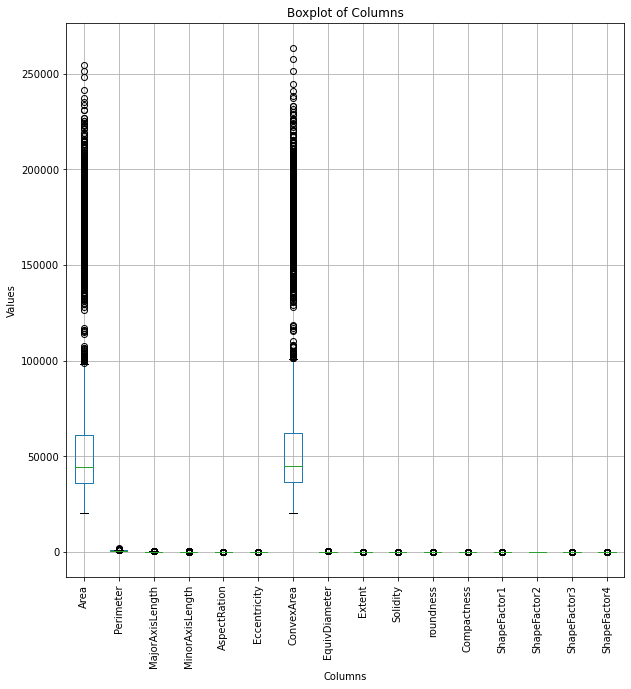

In [19]:
# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

2 Columns are having outliers : 'Area', 'ConvexArea'

There is a large number of outliers present in the data. If I use the IQR method, a significant amount of data would be lost. So, I have decided to use the Z-score method.

# Adjust figure size based on the number of columns
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Checking & Identifying and Treating Outliers: Z-Score Method 

In [20]:
#create a variable for all interger and float variables

numerical_columns = df.select_dtypes(include=['number', 'float']).columns

#calculate Z-score of all values of all variables and a new dataframe of it

z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = np.abs((df[column] - df[column].mean()) / df[column].std())

z_scores.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  0.838769   1.139621         1.301928         0.632088      1.565305   
1  0.827235   1.010491         1.391118         0.435742      1.972387   
2  0.805257   1.075263         1.247761         0.586753      1.514249   
3  0.783891   0.973858         1.274194         0.440579      1.742896   
4  0.779400   1.093780         1.375699         0.268271      2.121456   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      2.182752    0.839458       1.060452  0.287971  0.366463   1.420294   
1      3.685368    0.824145       1.041371  0.697572  0.465869   0.224978   
2      2.042153    0.806788       1.005319  0.577937  0.517595   1.248933   
3      2.740094    0.772142       0.970650  0.671277  2.248609   0.509569   
4      4.535656    0.782428       0.963409  0.475458  0.804575   1.872365   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.838560      0.681892      2.398191      1.924740      0.838648  
1     2.497530      0.369538      3.097357      2.691347      0.771113  
2     1.763988      0.604351      2.231003      1.840082      0.917384  
3     2.082134      0.403239      2.511165      2.204225      0.202365  
4     2.768496      0.120211      3.267554      3.016222      0.940371

variable for all interger and float variables

calculate Z-score of all values of all variables and a new dataframe

In [21]:
#Setting a threshold of 3 means that any value outside the range of -3 to +3 standard deviations is considered as outlier

threshold = 3
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]
outlier_rows

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1      0.827235   1.010491         1.391118         0.435742      1.972387   
4      0.779400   1.093780         1.375699         0.268271      2.121456   
11     0.747045   1.007976         1.275030         0.311609      1.889579   
14     0.744765   0.996115         1.256608         0.336777      1.827542   
18     0.740886   1.007473         1.252141         0.329164      1.827655   
...         ...        ...              ...              ...           ...   
12058  0.688832   0.661641         0.888469         0.624734      0.744225   
12116  0.679884   0.305484         0.520292         1.085360      0.866300   
12121  0.679442   0.505361         0.819222         0.695093      0.496899   
12132  0.677843   0.486732         0.806224         0.741276      0.396717   
13234  0.495041   0.272861         0.614593         0.409816      0.523394   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
1          3.685368    0.824145       1.041371  0.697572  0.465869   0.224978   
4          4.535656    0.782428       0.963409  0.475458  0.804575   1.872365   
11         3.306122    0.747547       0.911704  0.746800  0.254131   1.422747   
14         3.052445    0.747011       0.908091  0.643328  0.603872   1.329306   
18         3.052887    0.743024       0.901953  0.418738  0.577970   1.511178   
...             ...         ...            ...       ...       ...        ...   
12058      0.557532    0.670749       0.820630  1.833358  3.277548   1.055108   
12116      0.868974    0.651348       0.806844  0.247261  5.155219   3.483356   
12121      0.240100    0.640491       0.806164  0.755123  7.011199   2.150389   
12132      0.125642    0.661031       0.803706  0.686835  3.017606   2.266259   
13234      0.271634    0.475401       0.533419  0.155862  3.115862   1.867613   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
1         2.497530      0.369538      3.097357      2.691347      0.771113  
4         2.768496      0.120211      3.267554      3.016222      0.940371  
11        2.357505      0.184830      2.711715      2.525667      0.819282  
14        2.259311      0.216853      2.599243      2.410378      0.982435  
18        2.259617      0.205740      2.589563      2.410736      0.986004  
...            ...           ...           ...           ...           ...  
12058     0.624542      0.767406      0.920888      0.599497      2.580525  
12116     0.893408      1.560936      0.224445      0.898716      0.356757  
12121     0.355606      0.871561      0.685150      0.321195      1.980777  
12132     0.305553      0.891891      0.642693      0.270010      0.116644  
13234     0.461485      0.334896      0.503400      0.430101      0.599346  

[1129 rows x 16 columns]

In [22]:
#dropping outliers

df = df.drop(outlier_rows.index)

In [23]:
df.shape

(12414, 17)

Rows: 12414

Columns : 17

Approx 8.34% is lost in outliers removal. Approx 9% data is lost till now after removing duplicates and outliers.

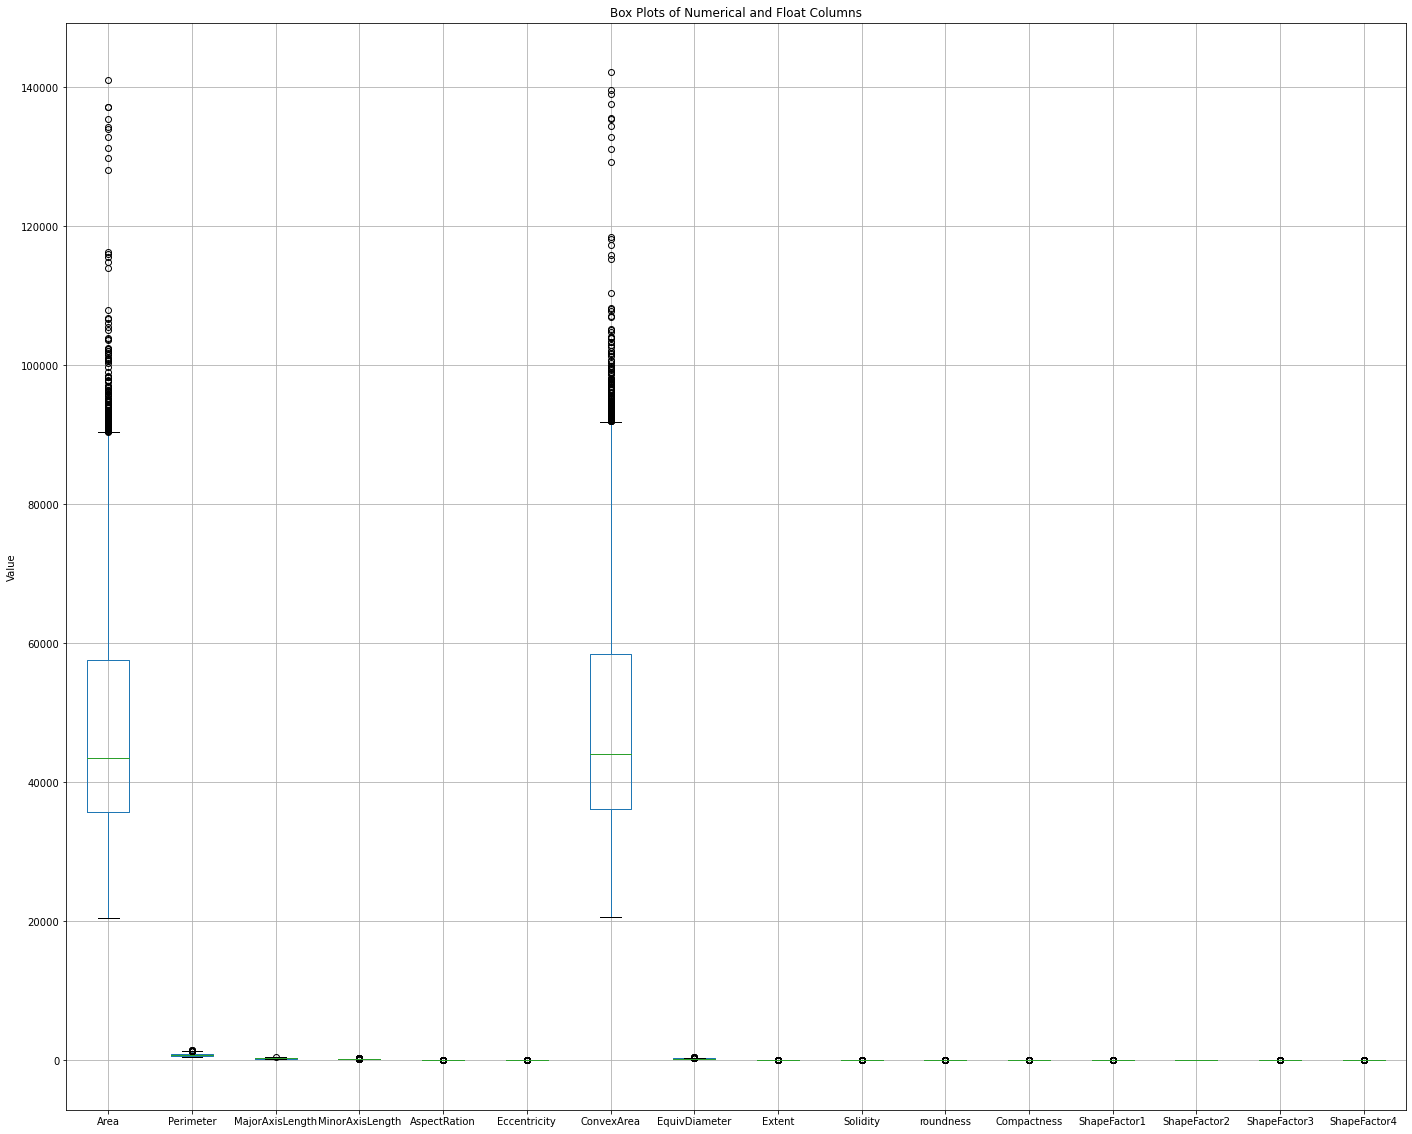

In [24]:
#  All the outliers are removed

plt.figure(figsize=(24,20)) #(width,height)
df[numerical_columns].boxplot()
plt.title('Box Plots of Numerical and Float Columns')
plt.ylabel('Value')
plt.show()

All the outliers are removed successfully.

In [25]:
### Data is cleaned now. So, I make a copy of it.

df_cleaned = df.copy()

### Feature Encoding Techniques 

In [26]:
# Taget Variable
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Class'], dtype='object')

Only 1 variable has to be encoded which is 'Class' (Taget Variable)

In [27]:
# apply df.replace method on 'Class' variable
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

I decide to apply df.replace method on 'Class' variable because this variable contains 7 categories

In [28]:
category_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}

df['Class'] = df['Class'].replace(category_mapping)

In [29]:
df['Class'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [30]:
#check data types of all variables to confrim that all variables are in 'int' or 'float' 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             12414 non-null  int64  
 1   Perimeter        12414 non-null  float64
 2   MajorAxisLength  12414 non-null  float64
 3   MinorAxisLength  12414 non-null  float64
 4   AspectRation     12414 non-null  float64
 5   Eccentricity     12414 non-null  float64
 6   ConvexArea       12414 non-null  int64  
 7   EquivDiameter    12414 non-null  float64
 8   Extent           12414 non-null  float64
 9   Solidity         12414 non-null  float64
 10  roundness        12414 non-null  float64
 11  Compactness      12414 non-null  float64
 12  ShapeFactor1     12414 non-null  float64
 13  ShapeFactor2     12414 non-null  float64
 14  ShapeFactor3     12414 non-null  float64
 15  ShapeFactor4     12414 non-null  float64
 16  Class            12414 non-null  int64  
dtypes: float64(1

Data types of all variables are fine.

### Checking Distribution of data 

In [31]:
df.shape

(12414, 17)

Rows: 12414

Columns : 17

In [32]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 12414
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 14


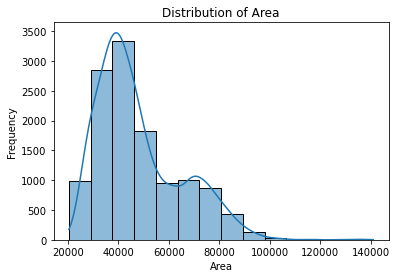

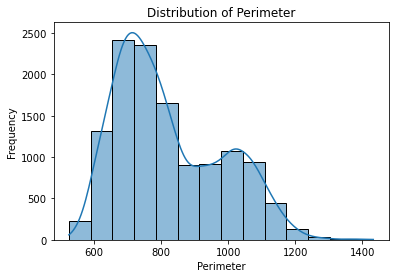

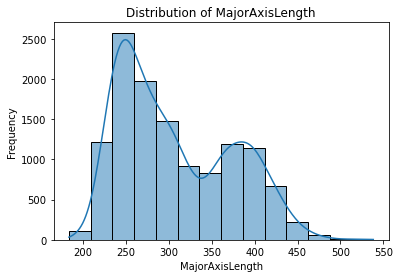

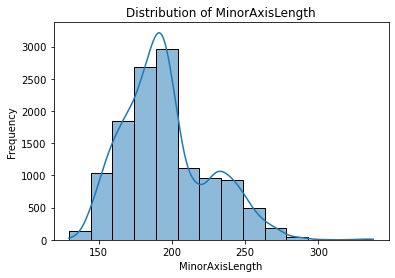

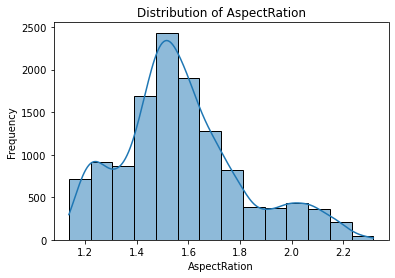

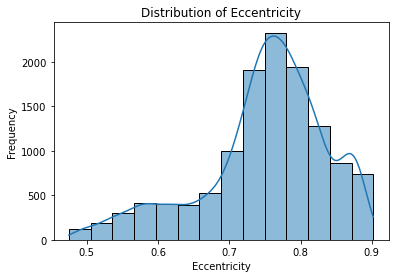

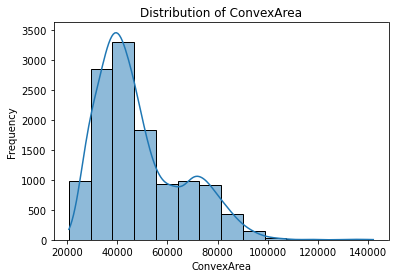

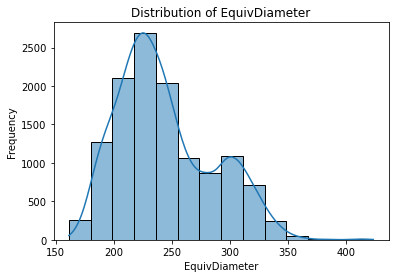

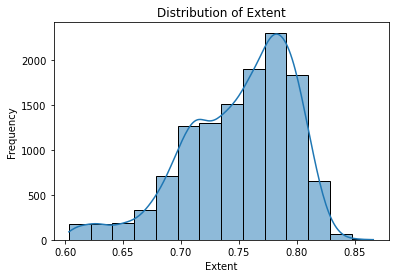

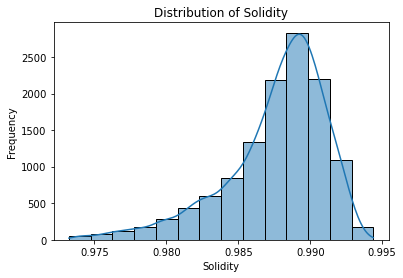

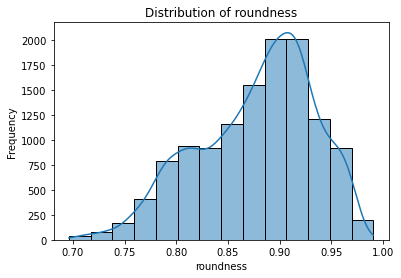

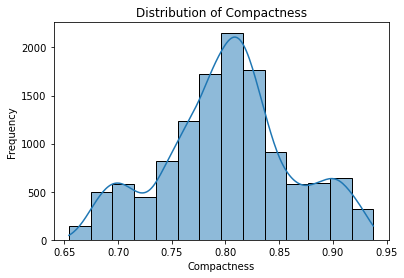

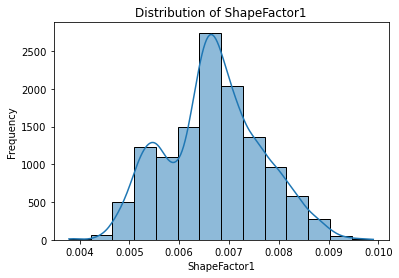

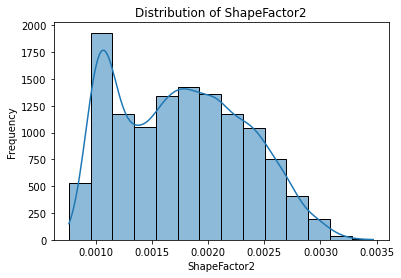

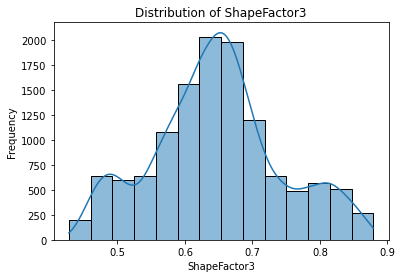

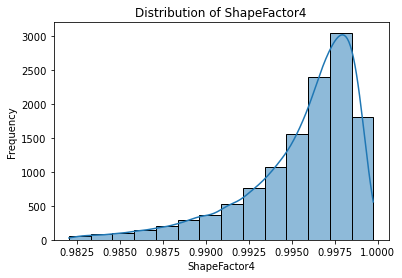

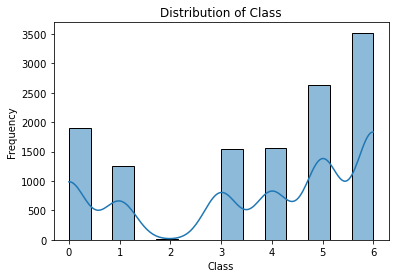

In [33]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=14, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [34]:
# check skewness of all continuous variables
df[continuous_vars].skew()

Area               0.940250
Perimeter          0.602878
MajorAxisLength    0.519943
MinorAxisLength    0.663292
AspectRation       0.626851
Eccentricity      -0.834302
ConvexArea         0.942741
EquivDiameter      0.611550
Extent            -0.743348
Solidity          -1.164965
roundness         -0.495015
Compactness       -0.038839
ShapeFactor1       0.073565
ShapeFactor2       0.218911
ShapeFactor3       0.152033
ShapeFactor4      -1.456584
Class             -0.615489
dtype: float64

Variables that are Approximately Symmetric (skewness between -0.5 and 0.5):

  * MajorAxisLength (0.519943)

  *ShapeFactor1 (0.073565)

  *ShapeFactor3 (0.152033)

 Variables that are moderately skewed (skewness between 0.5 to 1 or -0.5 to -1):

  *Perimeter (0.602878)

  *AspectRatio (0.626851)

  *Eccentricity (-0.834302)

  *EquivDiameter (0.611550)

  *Compactness (-0.038839)

  *ShapeFactor2 (0.218911)

 Variables that are highly skewed (skewness greater than 1 or less than -1)

  *Area (0.940250)

  *MinorAxisLength (0.663292)

  *ConvexArea (0.942741)

  *Extent (-0.743348)

  *Solidity (-1.164965)

  *Roundness (-0.495015)

  *ShapeFactor4 (-1.456584)

  *Class (-0.615489)

Most of the variables exhibit moderate to high skewness, indicating a departure from a normal distribution. However, since this is a classification problem, the skewness of the variables does not necessarily require transformation.

### Check colinearity between variables to avoid model from overfitting in the Data. 

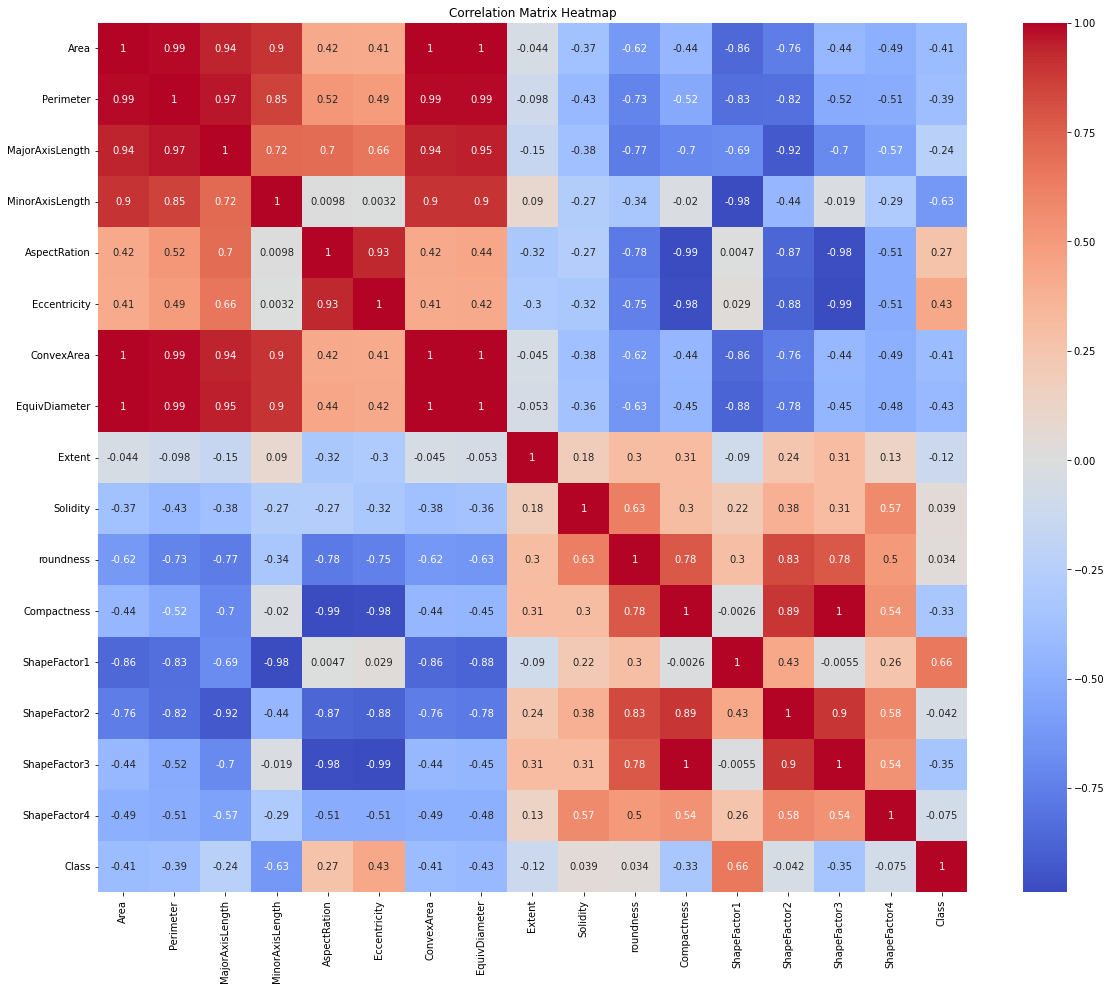

In [35]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(20,16)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Colinearity between variables

In [36]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

1) Columns: Compactness and ShapeFactor3 are highly correlated with a correlation of 0.9988181540999298
----------------------------------------------------------------------------------------------------
2) Columns: ConvexArea and EquivDiameter are highly correlated with a correlation of 0.9955390863211337
----------------------------------------------------------------------------------------------------
3) Columns: Compactness and Eccentricity are highly correlated with a correlation of -0.975741115098165
----------------------------------------------------------------------------------------------------
4) Columns: MajorAxisLength and ShapeFactor2 are highly correlated with a correlation of -0.9192344710800371
----------------------------------------------------------------------------------------------------
5) Columns: Area and MinorAxisLength are highly correlated with a correlation of 0.9004068775680103
---------------------------------------------------------------------------

I decide to drop these variables because they have lowest correlation with Target Variable ("Class").

* Perimeter

* MajorAxisLength

* EquivDiameter

* AspectRation

* Area

* Compactness

* ShapeFactor3

* ConvexArea

* MinorAxisLength

In [37]:
#Drop highly correlated variables

df.drop(['Perimeter', 'MajorAxisLength', 'EquivDiameter', 'AspectRation', 'Compactness', 'Area', 'ShapeFactor3', 
         'ConvexArea', 'MinorAxisLength'], axis=1, inplace=True)

In [38]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

Correlated variables dropped successfully

In [39]:
df.columns

Index(['Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1',
       'ShapeFactor2', 'ShapeFactor4', 'Class'],
      dtype='object')

### Diving data into train and test set 

In [40]:
x = df.drop("Class",axis=1)
y = df['Class']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [42]:
X_train.shape, y_train.shape

((8689, 7), (8689,))

In [43]:
X_test.shape, y_test.shape

((3725, 7), (3725,))

### Data Feature Scaling 

In [44]:
df.head()

Eccentricity    Extent  Solidity  roundness  ShapeFactor1  ShapeFactor2  \
0      0.549812  0.763923  0.988856   0.958027      0.007332      0.003147   
2      0.562727  0.778113  0.989559   0.947849      0.007244      0.003048   
3      0.498616  0.782681  0.976696   0.903936      0.007017      0.003215   
5      0.520401  0.775688  0.989510   0.943852      0.007020      0.003153   
6      0.489478  0.762402  0.984081   0.853080      0.006925      0.003242   

   ShapeFactor4  Class  
0      0.998724      0  
2      0.999066      0  
3      0.994199      0  
5      0.999236      0  
6      0.999049      0

In [45]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 3).any() or (df[column] < -3).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than +3 or less than -3:")
print(columns_needs_to_be_scaled)

Columns with values greater than +3 or less than -3:
['Class']


In [46]:
columns_to_check = df.columns
columns_needs_to_be_scaled = []

for column in columns_to_check:
    if (df[column] > 1).any() or (df[column] < 0).any():
        columns_needs_to_be_scaled.append(column)

print("Columns with values greater than +3 or less than -3:")
print(columns_needs_to_be_scaled)

Columns with values greater than +3 or less than -3:
['Class']


There are no variables that require scaling in the dataset. All variables, except for the "Class" variable, are already within the range of 0-1. The target variable does not need scaling, so it is left as is.

### Check for the class imbalance in Data

In [47]:
class_counts = df['Class'].value_counts()
class_counts

6    3520
5    2623
0    1896
4    1562
3    1543
1    1259
2      11
Name: Class, dtype: int64

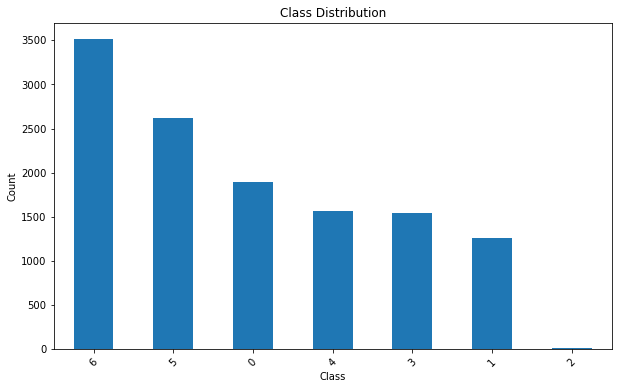

In [48]:
plt.figure(figsize=(10, 6)) 
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

There is a major problem of class imabalace.

### Handling Class Imbalance 

I have decided to apply only oversampling techniques because undersampling techniques lead to a loss of data. I will evaluate the results of these techniques on the random forest model and select the one that provides the best outcome.

### SMOTE (Synthetic Minority Over-sampling Technique 

In [49]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [50]:
#checking results of Smote

y_train_resampled.value_counts()

5    2503
1    2503
4    2503
6    2503
0    2503
3    2503
2    2503
Name: Class, dtype: int64

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2503
           1       1.00      1.00      1.00      2503
           2       1.00      1.00      1.00      2503
           3       1.00      1.00      1.00      2503
           4       1.00      1.00      1.00      2503
           5       1.00      1.00      1.00      2503
           6       1.00      1.00      1.00      2503

    accuracy                           1.00     17521
   macro avg       1.00      1.00      1.00     17521
weighted avg       1.00      1.00      1.00     17521

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [52]:
y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       559
           1       0.92      0.95      0.94       387
           2       0.50      1.00      0.67         1
           3       0.96      0.95      0.95       476
           4       0.96      0.96      0.96       501
           5       0.86      0.88      0.87       784
           6       0.92      0.90      0.91      1017

    accuracy                           0.92      3725
   macro avg       0.87      0.94      0.89      3725
weighted avg       0.92      0.92      0.92      3725

Accuracy: 0.9224161073825503
Balanced Accuracy: 0.9406505531565073
Precision: 0.9228895543176782
Recall: 0.9224161073825503
F1-score: 0.9225429815005837


### ADASYN (Adaptive Synthetic Sampling)

In [53]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [54]:
#checking results of SmoteTomek

y_train_resampled.value_counts()

1    2567
2    2506
6    2503
3    2476
4    2465
0    2461
5    2295
Name: Class, dtype: int64

In [55]:
rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
recall = recall_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)
f1 = f1_score(y_train_resampled, y_train_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      1.00      1.00      2567
           2       1.00      1.00      1.00      2506
           3       1.00      1.00      1.00      2476
           4       1.00      1.00      1.00      2465
           5       1.00      1.00      1.00      2295
           6       1.00      1.00      1.00      2503

    accuracy                           1.00     17273
   macro avg       1.00      1.00      1.00     17273
weighted avg       1.00      1.00      1.00     17273

Accuracy: 1.0
Balanced Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [56]:
y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       559
           1       0.91      0.95      0.93       387
           2       0.50      1.00      0.67         1
           3       0.95      0.93      0.94       476
           4       0.94      0.96      0.95       501
           5       0.87      0.86      0.87       784
           6       0.92      0.90      0.91      1017

    accuracy                           0.92      3725
   macro avg       0.86      0.94      0.89      3725
weighted avg       0.92      0.92      0.92      3725

Accuracy: 0.916241610738255
Balanced Accuracy: 0.93647674525212
Precision: 0.9162208867583495
Recall: 0.916241610738255
F1-score: 0.9160068486230364


Both SMOTE and ADASYN oversampling techniques achieved similar accuracy scores on the test data. SMOTE resulted in an accuracy of 0.9224, while ADASYN achieved an accuracy of 0.9162. Since accuracy is important in problem statement, it appears that SMOTE has a slightly higher accuracy on the test data compared to ADASYN.

In [57]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [58]:
y_train_resampled.value_counts()

5    2503
1    2503
4    2503
6    2503
0    2503
3    2503
2    2503
Name: Class, dtype: int64

In [59]:
X_train_resampled.shape, y_train_resampled.shape

((17521, 7), (17521,))

### Feature Selection using Random Forest Feature Importance Method 

In [60]:
#building random forest model for feature selection using X_train_resampled and y_train_resampled

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

Feature  Importance
0  ShapeFactor1    0.339255
1  Eccentricity    0.205589
2  ShapeFactor2    0.176098
3     roundness    0.138000
4  ShapeFactor4    0.071907
5      Solidity    0.046856
6        Extent    0.022296

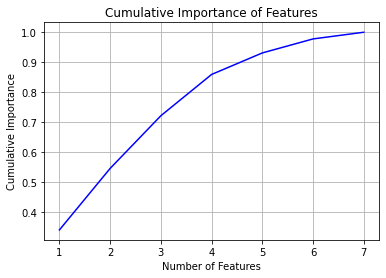

In [61]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

All features are important for model building

### Check multi-colinearity between variables to avoid model from overfitting. 

In [62]:
#checking multicolinearity of X_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

Variable            VIF
2      Solidity  197810.365425
6  ShapeFactor4  190689.148119
0  Eccentricity    3812.593601
3     roundness    1428.884958
5  ShapeFactor2     708.048315
4  ShapeFactor1     558.134965
1        Extent     306.614829

I have already removed correlated variables, but the remaining variables still contain multicollinearity. If I were to drop variables based on their VIF value, there would be no variables left for model building. Therefore, I have decided to continue the model building process without removing the multicollinear variables. If the model overfits or underfits, I will apply PCA.

### Model Building 

In [63]:
#importing algorithms and time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import time

In [64]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_resampled, y_train_resampled)
    y_train_pred = algorithm.predict(X_train_resampled)

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.728611   0.719692  0.728611  0.720430   
1      DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000   
2        KNeighborsClassifier  0.898065   0.896117  0.898065  0.895951   
3                  GaussianNB  0.920952   0.921782  0.920952  0.921115   
4          AdaBoostClassifier  0.834541   0.852369  0.834541  0.826781   
5  GradientBoostingClassifier  0.969294   0.969473  0.969294  0.969365   
6      RandomForestClassifier  1.000000   1.000000  1.000000  1.000000   
7               XGBClassifier  0.999829   0.999829  0.999829  0.999829   
8                         SVC  0.741510   0.745399  0.741510  0.740249   

   Balanced Accuracy  Building Time (s)  
0           0.728611           6.102077  
1           1.000000           0.297829  
2           0.898065           0.718046  
3           0.920952           0.048971  
4           0.834541           2.424721  
5           0.969294          70.728258  
6           1.000000           3.480911  
7           0.999829          17.240266  
8           0.741510          63.085529

In [65]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
    

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.689128   0.731225  0.689128  0.702422   
1      DecisionTreeClassifier  0.881342   0.881103  0.881342  0.881016   
2        KNeighborsClassifier  0.716779   0.734833  0.716779  0.722647   
3                  GaussianNB  0.904966   0.905253  0.904966  0.904841   
4          AdaBoostClassifier  0.808591   0.819106  0.808591  0.799033   
5  GradientBoostingClassifier  0.917584   0.917881  0.917584  0.917657   
6      RandomForestClassifier  0.922416   0.922890  0.922416  0.922543   
7               XGBClassifier  0.914631   0.915150  0.914631  0.914811   
8                         SVC  0.693154   0.750443  0.693154  0.717590   

   Balanced Accuracy  
0           0.618724  
1           0.905213  
2           0.786315  
3           0.926015  
4           0.817510  
5           0.935755  
6           0.940651  
7           0.932512  
8           0.765858

On the training set Random Forest, XG Boost and Gradient Boost have highest accuracy and balanced accuracy, but random forest overfits.

On the test set Random Forest, Gradient Boost and XG Boost have the highest accuracy and balanced accuracy.

I choose XG Boost for further analysis because it doesn't overfits and perform better on training and test data as compare to others.

In [66]:
#Make XG Boost Seprately

xgb_classifier = XGBClassifier(random_state=42)

xgb_classifier = xgb_classifier.fit(X_train_resampled, y_train_resampled)

xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Hyperparameter Tunning (XG Boost) 

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune and their respective values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [68]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict the target values for the test data using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the performance on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

# Print the evaluation results and best hyperparameters
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(test_classification_rep)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Test Accuracy: 0.916241610738255
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       559
           1       0.91      0.95      0.93       387
           2       1.00      1.00      1.00         1
           3       0.95      0.94      0.95       476
           4       0.96      0.94      0.95       501
           5       0.85      0.88      0.86       784
           6       0.91      0.90      0.91      1017

    accuracy                           0.92      3725
   macro avg       0.93      0.93      0.93      3725
weighted avg       0.92      0.92      0.92      3725



fter hypermeter tunning the accuracy is remain same or we can say accuracy is slightly better without hyperparameter tunning. So, I select XG Boost without hyperparameter tunning.

### Model Evaulation (XG Boost)


### Cross Validation 

In [69]:
#cross validation of accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.9532097  0.94977169 0.95861872 0.96803653 0.97203196]

Mean Accuracy Score: 0.9603337209075098


### Train & Test Data Metrics

In [70]:
# Predict on the train data
y_train_pred = xgb_classifier.predict(X_train_resampled)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred, average='macro')
train_recall = recall_score(y_train_resampled, y_train_pred, average='macro')
train_f1_score = f1_score(y_train_resampled, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Balanced Accuracy': [train_balanced_accuracy, test_balanced_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

Dataset  Accuracy  Balanced Accuracy  Precision    Recall  F1-score
0   Train  0.999829           0.999829   0.999829  0.999829  0.999829
1    Test  0.914631           0.932512   0.861429  0.932512  0.885005

### Confusion Matrix 

In [71]:
from sklearn.metrics import confusion_matrix

# Predict on the training set
y_train_pred = xgb_classifier.predict(X_train_resampled)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Define the category labels and their corresponding numbers
labels = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
label_numbers = [0, 1, 2, 3, 4, 5, 6]

# Calculate the confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train_resampled, y_train_pred, labels=label_numbers)

# Calculate the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred, labels=label_numbers)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a DataFrame for the confusion matrix (training set)
confusion_matrix_df_train = pd.DataFrame(train_confusion_matrix_percent, columns=labels, index=labels)

# Display the confusion matrix DataFrame for the training set
print("Training Set Confusion Matrix:")
confusion_matrix_df_train

Training Set Confusion Matrix:


SEKER   BARBUNYA     BOMBAY       CALI      HOROZ       SIRA  \
SEKER     14.285714   0.000000   0.000000   0.000000   0.000000   0.000000   
BARBUNYA   0.000000  14.285714   0.000000   0.000000   0.000000   0.000000   
BOMBAY     0.000000   0.000000  14.285714   0.000000   0.000000   0.000000   
CALI       0.000000   0.000000   0.000000  14.285714   0.000000   0.000000   
HOROZ      0.000000   0.000000   0.000000   0.000000  14.285714   0.000000   
SIRA       0.000000   0.000000   0.000000   0.000000   0.000000  14.280007   
DERMASON   0.000000   0.000000   0.000000   0.000000   0.000000   0.011415   

           DERMASON  
SEKER      0.000000  
BARBUNYA   0.000000  
BOMBAY     0.000000  
CALI       0.000000  
HOROZ      0.000000  
SIRA       0.005707  
DERMASON  14.274299

In [72]:
# Create a DataFrame for the confusion matrix (test set)
confusion_matrix_df_test = pd.DataFrame(test_confusion_matrix_percent, columns=labels, index=labels)

# Display the confusion matrix DataFrame for the test set
print("Test Set Confusion Matrix:")
confusion_matrix_df_test

Test Set Confusion Matrix:


SEKER  BARBUNYA    BOMBAY       CALI      HOROZ       SIRA  \
SEKER     13.986577  0.214765  0.000000   0.000000   0.000000   0.402685   
BARBUNYA   0.026846  9.798658  0.026846   0.375839   0.053691   0.107383   
BOMBAY     0.000000  0.000000  0.026846   0.000000   0.000000   0.000000   
CALI       0.026846  0.563758  0.000000  12.000000   0.107383   0.080537   
HOROZ      0.000000  0.053691  0.000000   0.268456  12.617450   0.375839   
SIRA       0.268456  0.053691  0.000000   0.107383   0.375839  18.281879   
DERMASON   0.402685  0.000000  0.000000   0.000000   0.026846   2.120805   

           DERMASON  
SEKER      0.402685  
BARBUNYA   0.000000  
BOMBAY     0.000000  
CALI       0.000000  
HOROZ      0.134228  
SIRA       1.959732  
DERMASON  24.751678

### ROC-AUC Curve

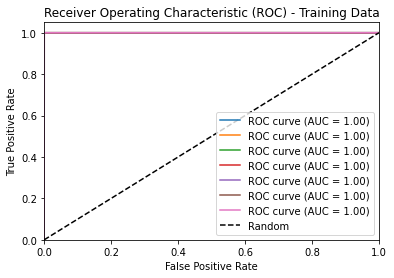

In [73]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert the training labels to binary format
y_train_bin = label_binarize(y_train_resampled, classes=[0, 1, 2, 3, 4, 5, 6])

# Compute the predicted probabilities for the training data
y_train_pred_prob = xgb_classifier.predict_proba(X_train_resampled)

# Compute the false positive rate (FPR) and true positive rate (TPR) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_idx in range(len(labels)):
    fpr[class_idx], tpr[class_idx], _ = roc_curve(y_train_bin[:, class_idx], y_train_pred_prob[:, class_idx])
    roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Plot the ROC curve for each class
plt.figure()
for class_idx in range(len(labels)):
    plt.plot(fpr[class_idx], tpr[class_idx], label='ROC curve (AUC = %0.2f)' % roc_auc[class_idx])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Training Data')
plt.legend(loc='lower right')
plt.show()

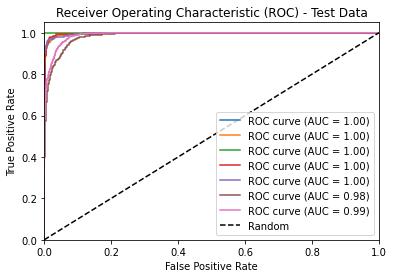

In [74]:
# Convert the test labels to binary format
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])

# Compute the predicted probabilities for the test data
y_test_pred_prob = xgb_classifier.predict_proba(X_test)

# Compute the false positive rate (FPR) and true positive rate (TPR) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for class_idx in range(len(labels)):
    fpr[class_idx], tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], y_test_pred_prob[:, class_idx])
    roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Plot the ROC curve for each class
plt.figure()
for class_idx in range(len(labels)):
    plt.plot(fpr[class_idx], tpr[class_idx], label='ROC curve (AUC = %0.2f)' % roc_auc[class_idx])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Data')
plt.legend(loc='lower right')
plt.show()

### Important features in Model Building 

In [75]:
feature_importance_df

Feature  Importance
0  ShapeFactor1    0.339255
1  Eccentricity    0.205589
2  ShapeFactor2    0.176098
3     roundness    0.138000
4  ShapeFactor4    0.071907
5      Solidity    0.046856
6        Extent    0.022296

These are the feature on which model is build. "ShapeFactor1" & "Eccentricity" are the most important features as they contain approx 53% of information gain."

### Model Building with PCA

I found that many features are correlated and after removing features still all features contains multi-colinearity. So, I decide to apply PCA to remove colinearity and multi-colinearity between variables.

In [76]:
df_cleaned

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
5      30279    634.927       212.560556       181.510182      1.171067   
6      30477    670.033       211.050155       184.039050      1.146768   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
5          0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6          0.489478       30970     196.988633  0.762402  0.984081   0.853080   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
5         0.923726      0.007020      0.003153      0.853270      0.999236   
6         0.933374      0.006925      0.003242      0.871186      0.999049   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
2         SEKER  
3         SEKER  
5         SEKER  
6         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[12414 rows x 17 columns]

It is generally recommended to remove outliers before applying PCA. Outliers can have a significant impact on the principal components and can distort the results of PCA. Hence, I saved a copy of data after removing outliers on which I have used to perform PCA

In [77]:
#Feature Encoding for PCA

category_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}

df_cleaned['Class'] = df_cleaned['Class'].replace(category_mapping)

In [78]:
df_cleaned.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      0  
2     0.908774      0.007244      0.003048      0.825871      0.999066      0  
3     0.928329      0.007017      0.003215      0.861794      0.994199      0  
5     0.923726      0.007020      0.003153      0.853270      0.999236      0  
6     0.933374      0.006925      0.003242      0.871186      0.999049      0

In [79]:
# Splitting the dataset into features (X) and target variable (y)
X = df_cleaned.drop('Class', axis=1)  # Features
y = df_cleaned['Class']  # Target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (8689, 16) (8689,)
Test set shape: (3725, 16) (3725,)


In [80]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [81]:
#checking results of Smote

y_train_resampled.value_counts()

5    2503
1    2503
4    2503
6    2503
0    2503
3    2503
2    2503
Name: Class, dtype: int64

In [82]:
X_train_resampled.shape, y_train_resampled.shape

((17521, 16), (17521,))

In [83]:
X_test.shape, y_test.shape

((3725, 16), (3725,))

In [84]:
#Feature Scaling for PCA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

In [85]:
# Convert the scaled data back to a dataframe

X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)

X_train_resampled_scaled.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.762090  -0.849191        -0.862188        -0.700807     -0.479308   
1 -0.159009   0.175479        -0.049916        -0.093085      0.040699   
2 -0.710517  -0.607217        -0.224600        -1.188729      2.085631   
3 -0.998601  -1.189736        -1.135679        -1.099887     -0.318424   
4 -1.023785  -1.168762        -1.105355        -1.206946     -0.014377   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -0.224239   -0.763601      -0.801779 -0.150872  0.275039   0.625641   
1      0.295385   -0.143456      -0.056018  0.139061 -2.400709  -1.781202   
2      1.420844   -0.709922      -0.731631 -3.002996 -0.196324  -1.013738   
3     -0.046485   -1.001008      -1.144402 -1.232948  0.613426   0.830640   
4      0.247280   -1.022724      -1.183217  1.238482 -0.367992   0.171774   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.403248      0.686176      0.649520      0.369994      0.440955  
1    -0.132640     -0.141800     -0.257266     -0.169121      0.936048  
2    -1.808444      1.593765     -0.733937     -1.718729      0.032828  
3     0.235713      1.392588      0.896867      0.199181      0.831087  
4    -0.092733      1.628653      0.691193     -0.129701      0.244523

Some features are in the range of 0-1 but I applied standard scaler on all variables because PCA assumes that the features are normally distributed and have a mean of 0 and a standard deviation of 1. If some of the features are not normally distributed or have different scales, then PCA may not be able to effectively reduce the dimensionality of the data.

In [86]:
# Apply PCA

from sklearn.decomposition import PCA


pca = PCA(random_state=42) 
X_train_pca = pca.fit(X_train_resampled)

In [87]:
# Get the explained variance ratio for all PCs
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each PC
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:f}")

PC1: 0.999983
PC2: 0.000015
PC3: 0.000001
PC4: 0.000000
PC5: 0.000000
PC6: 0.000000
PC7: 0.000000
PC8: 0.000000
PC9: 0.000000
PC10: 0.000000
PC11: 0.000000
PC12: 0.000000
PC13: 0.000000
PC14: 0.000000
PC15: 0.000000
PC16: 0.000000


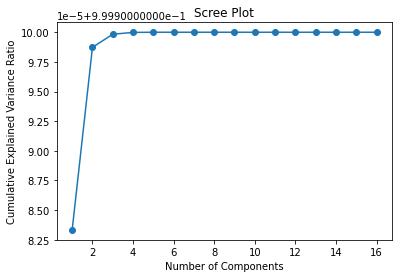

In [88]:
# Plot the scree plot

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

3 PC's contains all 100% variance of data. So, I decide to build model by taking 3 PC's.

In [89]:
pca = PCA(random_state=42, n_components=3)

X_train_pca = pca.fit_transform(X_train_resampled)

X_test_pca = pca.transform(X_test)

In [90]:
X_train_pca.shape, X_test_pca.shape

((17521, 3), (3725, 3))

In [91]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data with PCA
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_pca, y_train_resampled)
    y_train_pred = algorithm.predict(X_train_pca)

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred, average='weighted')
    recall = recall_score(y_train_resampled, y_train_pred, average='weighted')
    f1 = f1_score(y_train_resampled, y_train_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.649449   0.682035  0.649449  0.612610   
1      DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000   
2        KNeighborsClassifier  0.881913   0.882672  0.881913  0.882019   
3                  GaussianNB  0.775070   0.776465  0.775070  0.773509   
4          AdaBoostClassifier  0.525370   0.370476  0.525370  0.404165   
5  GradientBoostingClassifier  0.895154   0.895359  0.895154  0.895170   
6      RandomForestClassifier  1.000000   1.000000  1.000000  1.000000   
7               XGBClassifier  0.973346   0.973454  0.973346  0.973342   
8                         SVC  0.636779   0.635077  0.636779  0.628233   

   Balanced Accuracy  Building Time (s)  
0           0.649449           0.595658  
1           1.000000           0.177898  
2           0.881913           0.672774  
3           0.775070           0.053948  
4           0.525370           1.615425  
5           0.895154          34.134611  
6           1.000000           2.135910  
7           0.973346           9.572907  
8           0.636779          49.483126

Random Forest Overfits and XG Boost has the highest accuracy on training set.

In [92]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.587651   0.666476  0.587651  0.546386   
1      DecisionTreeClassifier  0.783893   0.788083  0.783893  0.785656   
2        KNeighborsClassifier  0.671678   0.678754  0.671678  0.674489   
3                  GaussianNB  0.736107   0.745607  0.736107  0.738061   
4          AdaBoostClassifier  0.430872   0.240083  0.430872  0.294259   
5  GradientBoostingClassifier  0.843490   0.847301  0.843490  0.844923   
6      RandomForestClassifier  0.846443   0.848964  0.846443  0.847434   
7               XGBClassifier  0.834899   0.837789  0.834899  0.836094   
8                         SVC  0.617181   0.629000  0.617181  0.617466   

   Balanced Accuracy  
0           0.639146  
1           0.798545  
2           0.698427  
3           0.761558  
4           0.524197  
5           0.853445  
6           0.855234  
7           0.845882  
8           0.642170

RandomForestClassifier, GradientBoostingClassifier and XGBClassifier has the hightest accuracy on test data.

I decide to choose XG Boost model without PCA because it provides better result than all models with PCA.

### Save the model to a file 

In [93]:
import joblib

model = xgb_classifier

joblib.dump(xgb_classifier, 'Turkish Bean Variety Classifier.pkl')

['Turkish Bean Variety Classifier.pkl']

### Report 

#### EDA 

* The dataset consists of 13,611 rows and 17 columns. The column names are: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class'].

* All variables in the dataset have the correct data types assigned to them.

* The dataset does not contain any null values, ensuring that all data is complete.

* Several pairs of variables in the dataset exhibit high correlation.

* After identifying and removing 68 duplicate rows, approximately 0.49% of the data was eliminated, resulting in a cleaner dataset.

* A thorough check of the unique values in each variable was performed to identify any suspicious values or typos. Fortunately, no such values were found in the dataset.

* After confirming the cleanliness of the data, a copy of the dataset was created to preserve the original state.

* Outliers were detected using the IQR method, and it was observed that the columns 'Area' and 'ConvexArea' contained outliers.

* Since removing these outliers would result in a significant loss of data, an alternative approach was used to handle the outliers. The Z-score method was applied to treat the outliers in the dataset.

* After removing the outliers, approximately 8.34% of the data was lost, resulting in a dataset with a reduced number of extreme values.

#### EATURE ENGINEERING 

* I began by performing feature encoding and found that the target variable "Class" was the only variable in categorical form. I replaced the categories using the df.replace() function and mapped them as follows: 'SEKER': 0, 'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'HOROZ': 4, 'SIRA': 5, 'DERMASON': 6.

* Next, I examined the distribution of the data and observed the following results for variables with skewness values:

Approximately Symmetric Variables (skewness between -0.5 and 0.5):

* MajorAxisLength (0.519943)

* ShapeFactor1 (0.073565)

* ShapeFactor3 (0.152033)

Moderately Skewed Variables (skewness between 0.5 and 1 or -0.5 and -1):

Perimeter (0.602878)

AspectRatio (0.626851)

Eccentricity (-0.834302)

EquivDiameter (0.611550)

Compactness (-0.038839)

ShapeFactor2 (0.218911)

Highly Skewed Variables (skewness greater than 1 or less than -1):

Area (0.940250)

MinorAxisLength (0.663292)

ConvexArea (0.942741)

Extent (-0.743348)

Solidity (-1.164965)

Roundness (-0.495015)

ShapeFactor4 (-1.456584)

Class (-0.615489)

Most of the variables are not normally distributed, but since it is a classification problem, no transformation is necessary.

* I also investigated the correlation between variables and identified 21 pairs of highly correlated variables. Based on the lowest correlation with the target variable ("Class"), I decided to drop the following variables:
['Perimeter', 'MajorAxisLength', 'EquivDiameter', 'AspectRation', 'Area', 'Compactness', 'ShapeFactor3', 'ConvexArea', 'MinorAxisLength']

After dropping these variables, I was left with a reduced dataset containing 8 variables, including the target variable.

* After dropping these variables, I divided the data into a training set and a test set in a 70:30 ratio.

* Next, I checked for the need for feature scaling and determined that none of the features required scaling.

* Subsequently, I examined the class imbalance in the dataset and found a significant imbalance.

* To address the class imbalance, I applied oversampling techniques using SMOTE and ADASYN. I opted not to use undersampling techniques as they would result in the loss of a significant amount of data.

* I evaluated the performance of SMOTE and ADASYN by building a base model using random forest and analyzing various evaluation metrics on both the training and test sets. Based on the results, I found that SMOTE performed better than ADASYN, so I proceeded with SMOTE for further analysis.

* I then performed feature selection using the random forest feature importance method and discovered that all features were important.

* Following that, I assessed the Variance Inflation Factor (VIF) and observed that all variables had high VIF values. Considering that dropping variables individually would leave no variables for model building, I decided to retain all the variables and proceeded with model building. If the model shows signs of overfitting or underfitting, I will utilize PCA to address multicollinearity.

### MODEL BUILDING 

* I have tried multiple algorithms such as Logistic Regression, Decision Tree Classifier, KNN Classifier, Support Vector Classifier (SVC), Gaussian Naive Bayes, Ada Boost Classifier, Gradient Boosting Classifier, RandomForestClassifier, and XGBClassifier on the training data. The results are as follows:

#### Training Data Result 

In [94]:
df_train = pd.DataFrame(results_train)
df_train

Algorithm  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.649449   0.682035  0.649449  0.612610   
1      DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000   
2        KNeighborsClassifier  0.881913   0.882672  0.881913  0.882019   
3                  GaussianNB  0.775070   0.776465  0.775070  0.773509   
4          AdaBoostClassifier  0.525370   0.370476  0.525370  0.404165   
5  GradientBoostingClassifier  0.895154   0.895359  0.895154  0.895170   
6      RandomForestClassifier  1.000000   1.000000  1.000000  1.000000   
7               XGBClassifier  0.973346   0.973454  0.973346  0.973342   
8                         SVC  0.636779   0.635077  0.636779  0.628233   

   Balanced Accuracy  Building Time (s)  
0           0.649449           0.595658  
1           1.000000           0.177898  
2           0.881913           0.672774  
3           0.775070           0.053948  
4           0.525370           1.615425  
5           0.895154          34.134611  
6           1.000000           2.135910  
7           0.973346           9.572907  
8           0.636779          49.483126

In [95]:
# MODEL BUILDING
I have tried multiple algorithms such as Logistic Regression, Decision Tree Classifier, KNN Classifier, Support Vector Classifier (SVC), Gaussian Naive Bayes, Ada Boost Classifier, Gradient Boosting Classifier, RandomForestClassifier, and XGBClassifier on the training data. The results are as follows:
Training Data Result

Algorithm	Accuracy	Precision	Recall	F1-score	Balanced Accuracy	Building Time (s)
LogisticRegression	0.728611	0.719692	0.728611	0.720430	0.728611	4.305557
DecisionTreeClassifier	1.000000	1.000000	1.000000	1.000000	1.000000	0.203090
KNeighborsClassifier	0.898065	0.896117	0.898065	0.895951	0.898065	0.561598
GaussianNB	0.920952	0.921782	0.920952	0.921115	0.920952	0.015581
AdaBoostClassifier	0.834541	0.852369	0.834541	0.826781	0.834541	1.337142
GradientBoostingClassifier	0.96924	0.969473	0.969294	0.969365	0.969294	29.370274
RandomForestClassifier	1.000000	1.000000	1.000000	1.000000	1.000000	0.749819
XGBClassifier	0.999829	0.999829	0.999829	0.999829	0.999829	5.498693
SVC	0.741510	0.745399	0.741510	0.740249	0.741510	32.688252
On the training set, Random Forest, XG Boost, and Gradient Boost have the highest accuracy and balanced accuracy. However, Random Forest appears to overfit the data.

Next, I evaluated the algorithms on the test set, and the results are as follows:

Test Data Result

Algorithm	Accuracy	Precision	Recall	F1-score	Balanced Accuracy
LogisticRegression	0.689128	0.731225	0.689128	0.702422	0.618724
DecisionTreeClassifier	0.881342	0.881103	0.881342	0.881016	0.905213
KNeighborsClassifier	0.716779	0.734833	0.716779	0.722647	0.786315
GaussianNB	0.904966	0.905253	0.904966	0.904841	0.926015
AdaBoostClassifier	0.808591	0.819106	0.808591	0.799033	0.817510
GradientBoostingClassifier	0.917584	0.917881	0.917584	0.917657	0.935755
RandomForestClassifier	0.922416	0.922890	0.922416	0.922543	0.940651
XGBClassifier	0.914631	0.915150	0.914631	0.914811	0.932512
SVC	0.693154	0.750443	0.693154	0.717590	0.765858
On the test set, Random Forest, Gradient Boost, and XG Boost have the highest accuracy and balanced accuracy.

Based on these results, I choose XG Boost for further analysis as it does not overfit and performs better on both the training and test data.

I performed hyperparameter tuning, accuracy is not incresed. Therefore, I select the XG Boost model without hyperparameter tuning.

Next, I applied cross-validation to increase accuracy. The cross-validation scores (accuracy) are as follows:

[0.9532097, 0.94977169, 0.95861872, 0.96803653, 0.97203196].

The mean accuracy score is 0.9603337209075098.

Then, I evaluated the XG Boost model on the train and test sets, and the results are as follows:
Dataset	Accuracy	Balanced Accuracy	Precision	Recall	F1-score
Train	0.999829	0.999829	0.999829	0.999829	0.999829
Test	0.914631	0.932512	0.861429	0.932512	0.885005
Furthermore, I checked the confusion matrix for both the train and test sets:
Confusion Matrix of Train Set

SEKER	BARBUNYA	BOMBAY	CALI	HOROZ	SIRA	DERMASON
SEKER	14.285714	0.000000	0.000000	0.000000	0.000000	0.000000	0.000000
BARBUNYA	0.000000	14.285714	0.000000	0.000000	0.000000	0.000000	0.000000
BOMBAY	0.000000	0.000000	14.285714	0.000000	0.000000	0.000000	0.000000
CALI	0.000000	0.000000	0.000000	14.285714	0.000000	0.000000	0.000000
HOROZ	0.000000	0.000000	0.000000	0.000000	14.285714	0.000000	0.000000
SIRA	0.000000	0.000000	0.000000	0.000000	0.000000	14.280007	0.005707
DERMASON	0.000000	0.000000	0.000000	0.000000	0.000000	0.011415	14.274299
Confusion Matrix of Test Set

SEKER	BARBUNYA	BOMBAY	CALI	HOROZ	SIRA	DERMASON
SEKER	13.986577	0.214765	0.000000	0.000000	0.000000	0.402685	0.402685
BARBUNYA	0.026846	9.798658	0.026846	0.375839	0.053691	0.107383	0.000000
BOMBAY	0.000000	0.000000	0.026846	0.000000	0.000000	0.000000	0.000000
CALI	0.026846	0.563758	0.000000	12.000000	0.107383	0.080537	0.000000
HOROZ	0.000000	0.053691	0.000000	0.268456	12.617450	0.375839	0.134228
SIRA	0.268456	0.053691	0.000000	0.107383	0.375839	18.281879	1.959732
DERMASON	0.402685	0.000000	0.000000	0.000000	0.026846	2.120805	24.751678
I also checked the ROC-AUC curve and found that the mean AUC on the training set is 1.0, indicating excellent performance. The mean AUC on the test set is 0.9957, which is also very high.

Finally, I analyzed the important features in the model, and the top features based on their importance are as follows:

Feature	Importance
ShapeFactor1	0.339255
Eccentricity	0.205589
ShapeFactor2	0.176098
roundness	0.138000
ShapeFactor4	0.071907
Solidity	0.046856
Extent	0.022296
These features were used to build the model, with "ShapeFactor1" and "Eccentricity" being the most important, accounting for approximately 53% of the information gain.

Furthermore, I found that many features are correlated, and even after removing some features, multi-collinearity between variables remained. Therefore, I decided to apply Principal Component Analysis (PCA) to remove colinearity and multi-collinearity.

Additionally, I applied standard scaling to all variables, as PCA assumes that the features are normally distributed with a mean of 0 and a standard deviation of 1. This step ensures that PCA can effectively reduce the dimensionality of the data.During PCA, I found that only three principal components (PCs) capture 100% of the variance in the data.During PCA, I found that only three principal components (PCs) capture 100% of the variance in the data.

During PCA, I found that only three principal components (PCs) capture 100% of the variance in the data.

Next, I applied various algorithms to these three principal components, and the results are as follows:

PCA result on the Training Set

Algorithm	Accuracy	Precision	Recall	F1-score	Balanced Accuracy	Building Time (s)
LogisticRegression	0.649449	0.682035	0.649449	0.612610	0.649449	0.971483
DecisionTreeClassifier	1.000000	1.000000	1.000000	1.000000	1.000000	0.103513
KNeighborsClassifier	0.881913	0.882672	0.881913	0.882019	0.881913	0.508087
GaussianNB	0.775070	0.776465	0.775070	0.773509	0.775070	0.031244
AdaBoostClassifier	0.525370	0.370476	0.525370	0.404165	0.525370	0.917904
GradientBoostingClassifier	0.895154	0.895359	0.895154	0.895170	0.895154	16.007691
RandomForestClassifier	1.000000	1.000000	1.000000	1.000000	1.000000	0.688190
XGBClassifier	0.973346	0.973454	0.973346	0.973342	0.973346	6.020092
SVC 0.636779	0.635077	0.636779	0.628233	0.636779	30.236159	
Random Forest Classifier overfits the data, while XG Boost has the highest accuracy on the training set.
PCA result of the Test Set

Algorithm	Accuracy	Precision	Recall	F1-score	Balanced Accuracy
LogisticRegression	0.587651	0.666476	0.587651	0.546386	0.639146
DecisionTreeClassifier	0.783893	0.788083	0.783893	0.785656	0.798545
KNeighborsClassifier	0.671678	0.678754	0.671678	0.674489	0.698427
GaussianNB	0.736107	0.745607	0.736107	0.738061	0.761558
AdaBoostClassifier	0.430872	0.240083	0.430872	0.294259	0.524197
GradientBoostingClassifier	0.843490	0.847301	0.843490	0.844923	0.853445
RandomForestClassifier	0.846443	0.848964	0.846443	0.847434	0.855234
XGBClassifier	0.834899	0.837789	0.834899	0.836094	0.845882
SVC 0.617181	0.629000	0.617181	0.617466	0.642170	
Random Forest Classifier, Gradient Boosting Classifier, and XG Boost Classifier have the highest accuracy on the test set.

Based on these results, I decided to choose the XG Boost model without PCA because it provides better result than all models with PCA.

Lastly, I saved the XG Boost model without PCA for future use.

SyntaxError: invalid syntax (3234444968.py, line 2)